In [1]:
import pandas as pd
import datetime
import calendar
import os
import statistics

import numpy as np
from plotnine import ggplot, aes, geom_line,facet_grid

#measles_epidemic_dataset_USA = pd.read_excel()

In [2]:
measles_epidemic_dataset = pd.read_csv("measles_Original.csv")
measles_out = pd.read_csv("measles2.csv")
california_measles_1927_1967 = pd.read_csv('California_data.csv')
measles_out.keys()
california_measles_epidemics = pd.read_csv('California_measles_epidemics.csv')
measles_epidemic_stages = pd.read_csv('epidemic stages.csv')
#first_quater = pd.read_csv('First_quater_inferential.csv')

In [ ]:
first_quater

In [ ]:
measles_epidemic_dataset4 = pd.DataFrame(columns= ['epi_week', 'state', 'loc', 'loc_type', 'disease', 'cases',
       'incidence_per_100000','Year','Week'])

In [ ]:
for i in range(len(measles_epidemic_dataset)):
    year = str(measles_epidemic_dataset['epi_week'][i])
    week = str(measles_epidemic_dataset['epi_week'][i])
    measles_out['Year'][i]=int(year[0:4])
    measles_out['Week'][i]=int(week[4:])

In [ ]:
measles_out.to_csv('Processed_measles_data.csv')

In [ ]:
measles_epidemic_dataset['cases'].describe()



In [ ]:
california_measles_1927_1967.keys()

In [ ]:
california_measles_1927_1967['cases'].describe()

In [ ]:
california_measles_1929 =[california_measles_1927_1967['cases'][i]  for i in range(len(california_measles_1927_1967)) 
                          if california_measles_1927_1967['Year'][i] == 1929 ]
incidence_1929 = [california_measles_1927_1967['incidence_per_100000'][i]  for i in range(len(california_measles_1927_1967)) 
                          if california_measles_1927_1967['Year'][i] == 1929 ]
california_measles_1930 = [california_measles_1927_1967['cases'][i]  for i in range(len(california_measles_1927_1967)) 
                          if california_measles_1927_1967['Year'][i] == 1930 ]
incidence_1928 = [california_measles_1927_1967['incidence_per_100000'][i]  for i in range(len(california_measles_1927_1967)) 
                          if california_measles_1927_1967['Year'][i] == 1930 ]

In [ ]:
plateau_years = [1928, 1929, 1932, 1937, 1941, 1947, 1950, 1963, 1965,1966]
incidence_mean_list=[]
for j in range(len(plateau_years)):
    plateau_incidence= [california_measles_1927_1967['incidence_per_100000'][i]  for i in range(len(california_measles_1927_1967)) 
                          if california_measles_1927_1967['Year'][i] == plateau_years[j]  ]
    plateau_incidence = statistics.mean(plateau_incidence)
    incidence_mean_list.append(plateau_incidence)

In [ ]:
statistics.mean(incidence_mean_list)

In [ ]:
'{0}'.format(678)

In [ ]:
incidence_1929 = pd.DataFrame(incidence_1929)
incidence_1929.describe()

In [ ]:
california_measles_1930.describe()

In [ ]:
california_measles_1927_1967['incidence_per_100000'].describe()[1]

In [ ]:
california_measles_epidemics['cases'].describe()

In [ ]:
california_measles_epidemics_1930=[california_measles_epidemics['cases'][i]
                                   for i in range(len(california_measles_epidemics)) 
                                   if california_measles_epidemics['Year'][i] == 1930]

california_measles_epidemics_1930 = pd.DataFrame(california_measles_epidemics_1930)
california_measles_epidemics_1930.describe()

In [ ]:
california_measles_epidemics

In [ ]:
# computing copy california_measles_epidemics to measles_epidemic_stages files

for j in range(len(california_measles_epidemics)):
    if j==0:
        measles_epidemic_stages.at[0,'Year'] = california_measles_epidemics.iloc[0,1]
        measles_epidemic_stages.at[0,'Week'] = california_measles_epidemics.iloc[0,2]
        measles_epidemic_stages.at[0,'cases'] = california_measles_epidemics.iloc[0,3]
        measles_epidemic_stages.at[0,'incidence_per_100000'] = california_measles_epidemics.iloc[0,4]
        measles_epidemic_stages.at[0,'CCC'] = california_measles_epidemics.iloc[0,3]
     
    else:
        measles_epidemic_stages.at[j,'Year'] = california_measles_epidemics.iloc[j,1]
        measles_epidemic_stages.at[j,'Week'] = california_measles_epidemics.iloc[j,2]
        measles_epidemic_stages.at[j,'cases'] = california_measles_epidemics.iloc[j,3]
        measles_epidemic_stages.at[j,'incidence_per_100000'] = california_measles_epidemics.iloc[j,4]
        
        
    

In [ ]:
# computing weekly cumulative per Year
for i in range(len(measles_epidemic_stages)):
    if measles_epidemic_stages.at[i,'Week']==1: 
            measles_epidemic_stages.at[i,'CCC'] = measles_epidemic_stages.at[i,'cases'] 
    else:
        measles_epidemic_stages.at[i,'CCC'] = measles_epidemic_stages.at[i,'cases'] + measles_epidemic_stages.at[i-1,'CCC']
        

In [ ]:
measles_epidemic_stages

In [ ]:
# Extracting first time caese
fisrt_time_cases = [measles_epidemic_stages.iloc[i,3] for i in range(len(measles_epidemic_stages)) if measles_epidemic_stages.iloc[i,1] == 1 ]
len(fisrt_time_cases)

In [ ]:
unique_yr =measles_epidemic_stages['Year'].unique()
len(unique_yr)

In [ ]:
weeks =measles_epidemic_stages['Week'].unique()
weeks

In [ ]:
measles_epidemic_stages.keys()

In [ ]:

# Identify the epidemy stages per year
def get_stages_values(yr):
    getter =[]
    for  l in range(len(measles_epidemic_stages)):
        if  measles_epidemic_stages.loc[l,'Year'] == yr :
            getter.append(measles_epidemic_stages.loc[l,'cases'])
            peak_value = max(getter)
            half_peak = peak_value/2
            post_peak = peak_value/10
            
    return peak_value,half_peak,post_peak

def get_peak_time(pick):
    for  l in range(len(measles_epidemic_stages)):
        if measles_epidemic_stages.loc[l,'cases'] == pick:
            pick_time = measles_epidemic_stages.loc[l,'Week']
    
    return pick_time
    
            
def annotate_stages(yr,pv,hp,popk,p_time):
    for  l in range(len(measles_epidemic_stages)):
        if  measles_epidemic_stages.loc[l,'Year'] == yr and measles_epidemic_stages.loc[l,'CCC']< 1000 and measles_epidemic_stages.loc[l,'Week']<p_time  :
            measles_epidemic_stages.at[l,'epi_stages'] = 'Initial'
            
        elif measles_epidemic_stages.loc[l,'Year'] == yr and measles_epidemic_stages.loc[l,'CCC']>= 1000 and measles_epidemic_stages.loc[l,'cases']< hp and measles_epidemic_stages.loc[l,'Week']<p_time :
            measles_epidemic_stages.at[l,'epi_stages'] = 'Pre-peak'
            
        elif measles_epidemic_stages.loc[l,'Year'] == yr and measles_epidemic_stages.loc[l,'cases']>= hp and measles_epidemic_stages.loc[l,'cases']<= pv  :
            measles_epidemic_stages.at[l,'epi_stages'] = 'Peak'
            
        elif measles_epidemic_stages.loc[l,'Year'] == yr and measles_epidemic_stages.loc[l,'cases']< pv and measles_epidemic_stages.loc[l,'cases']>popk and measles_epidemic_stages.loc[l,'Week']>p_time   :
            measles_epidemic_stages.at[l,'epi_stages'] = 'Post_peak'
        
        elif measles_epidemic_stages.loc[l,'Year'] == yr and measles_epidemic_stages.loc[l,'cases']< pv and measles_epidemic_stages.loc[l,'cases']<popk and measles_epidemic_stages.loc[l,'Week']>p_time   :
            measles_epidemic_stages.at[l,'epi_stages'] = 'Receding'
            


In [ ]:
# Anotate epidemy stage in the dataset per year
for i in range(len(unique_yr)):
    yr= unique_yr[i]
    pv,hp,popk =  get_stages_values(yr)
    p_time = get_peak_time(pv)
    annotate_stages(yr,pv,hp,popk,p_time)



In [ ]:
measles_epidemic_stages.to_csv('epidemic stages.csv')

In [ ]:
yrr = first_quater.keys()
yrr[0]

In [ ]:
# first quater outbreak
for yr in yrr:
    j=0
    for  l in range(len(measles_epidemic_stages)):
        if yr == 'Week':
            pass

        elif measles_epidemic_stages.loc[l,'Week']<=13 and measles_epidemic_stages.loc[l,'Year'] == int(yr) :
            
            first_quater.at[j,yr] = measles_epidemic_stages.loc[l,'cases']   
            j=j+1

In [ ]:
first_quater_distribution = pd.read_csv('First_quater_distribution.csv')
second_quater_distribution = pd.read_csv('Second_quater_distribution.csv')
second_quater_inferential = pd.read_csv('Second_quater_Inferential.csv')
third_quater_distribution = pd.read_csv('Third_quater_distribution.csv')
third_quater_inferential = pd.read_csv('Third_quater_inferential.csv')
fourth_quater_distribution = pd.read_csv('Fourth_quater_distribution.csv')
fourth_quater_inferential = pd.read_csv('Fourth_quater_inferential.csv')

In [ ]:
j=0
for  l in range(len(measles_epidemic_stages)):
    if measles_epidemic_stages.loc[l,'Week']<=13 :
        first_quater_distribution.at[j,'Week'] = measles_epidemic_stages.loc[l,'Week']
        first_quater_distribution.at[j,'cases'] = measles_epidemic_stages.loc[l,'cases'] 
        j+=1
            

In [ ]:
first_quater_distribution

In [ ]:
first_quater.to_csv('First_quater_inferential.csv')

In [ ]:
first_quater_distribution.to_csv('First_quater_distribution.csv')

In [ ]:
# Second quater outbreak
for yr in yrr:
    j=0
    for  l in range(len(measles_epidemic_stages)):
        if yr == 'Week':
            pass

        elif measles_epidemic_stages.loc[l,'Week']>13 and measles_epidemic_stages.loc[l,'Week']<28 and measles_epidemic_stages.loc[l,'Year'] == int(yr) :
            second_quater_inferential.at[j,'Week'] = measles_epidemic_stages.loc[l,'Week']
            second_quater_inferential.at[j,yr] = measles_epidemic_stages.loc[l,'cases']   
            j=j+1


In [ ]:
j=0
for  l in range(len(measles_epidemic_stages)):
    if measles_epidemic_stages.loc[l,'Week']>13 and measles_epidemic_stages.loc[l,'Week']<28 :
        second_quater_distribution.at[j,'Week'] = measles_epidemic_stages.loc[l,'Week']
        second_quater_distribution.at[j,'cases'] = measles_epidemic_stages.loc[l,'cases'] 
        j+=1

In [ ]:
second_quater_distribution.to_csv('Second_quater_distribution.csv')
second_quater_inferential.to_csv('Second_quater_Inferential.csv')

In [ ]:
# Third quater outbreak
for yr in yrr:
    j=0
    for  l in range(len(measles_epidemic_stages)):
        if  yr == 'Week':
            pass

        elif measles_epidemic_stages.loc[l,'Week']>27 and measles_epidemic_stages.loc[l,'Week']<42 and measles_epidemic_stages.loc[l,'Year'] == int(yr) :
            third_quater_inferential.at[j,'Week'] = measles_epidemic_stages.loc[l,'Week']
            third_quater_inferential.at[j,yr] = measles_epidemic_stages.loc[l,'cases']   
            j=j+1
            

j=0
for  l in range(len(measles_epidemic_stages)):
    if measles_epidemic_stages.loc[l,'Week']>27 and measles_epidemic_stages.loc[l,'Week']<42 :
        third_quater_distribution.at[j,'Week'] = measles_epidemic_stages.loc[l,'Week']
        third_quater_distribution.at[j,'cases'] = measles_epidemic_stages.loc[l,'cases'] 
        j+=1

In [ ]:
third_quater_distribution.to_csv('Third_quater_distribution.csv')
third_quater_inferential.to_csv('Third_quater_inferential.csv')

In [ ]:
# Fourth quater outbreak
for yr in yrr:
    j=0
    for  l in range(len(measles_epidemic_stages)):
        if  yr == 'Week':
            pass

        elif measles_epidemic_stages.loc[l,'Week']>41  and measles_epidemic_stages.loc[l,'Year'] == int(yr) :
            fourth_quater_inferential.at[j,'Week'] = measles_epidemic_stages.loc[l,'Week']
            fourth_quater_inferential.at[j,yr] = measles_epidemic_stages.loc[l,'cases']   
            j=j+1
            

j=0
for  l in range(len(measles_epidemic_stages)):
    if measles_epidemic_stages.loc[l,'Week']>41  :
        fourth_quater_distribution.at[j,'Week'] = measles_epidemic_stages.loc[l,'Week']
        fourth_quater_distribution.at[j,'cases'] = measles_epidemic_stages.loc[l,'cases'] 
        j+=1


In [ ]:
fourth_quater_distribution.to_csv('Fourth_quater_distribution.csv')
fourth_quater_inferential.to_csv('Fourth_quater_inferential.csv')

In [3]:
from numpy import array
# Univariate Time Series Data Preparation
def split_function(measles_seq, input_time_steps,output_time_steps):
    time_series_inputSeq = list()
    time_series_outpuSeq = list()
    for eachSeq_index in range(len(measles_seq)):
        end_of_timeSteps = eachSeq_index  + input_time_steps
        if end_of_timeSteps > len(measles_seq) - 1 :
            break
        inputSeq = measles_seq[eachSeq_index : end_of_timeSteps]
        outpuSeq = measles_seq[end_of_timeSteps]
        time_series_inputSeq.append(inputSeq)
        time_series_outpuSeq.append(outpuSeq)
        #print(inputSeq,outpuSeq)
        #print('\n')
    return array(time_series_inputSeq), array(time_series_outpuSeq)

In [4]:
#Normalize data
mn=measles_epidemic_stages['cases'].mean()
sd=measles_epidemic_stages['cases'].std()
measles_epidemic_stages_normalize = (measles_epidemic_stages['cases']-mn)/sd
measles_epidemic_stages_normalize

0      -0.643225
1      -0.384034
2      -0.336908
3      -0.201422
4       0.030280
          ...   
1452   -0.725695
1453   -0.712931
1454   -0.661879
1455   -0.692314
1456   -0.672678
Name: cases, Length: 1457, dtype: float64

In [4]:
# Split Normalized Data into Training and Test Data
measles_epidemy_training = list()
measles_epidemy_testing = list()
measles_epidemy_val = list()
measles_one_year_training =list()
for i in range(len(measles_epidemic_stages)):
    if measles_epidemic_stages.loc[i,'Year'] < 1957:
        measles_epidemy_training.append(measles_epidemic_stages_normalize.loc[i])
    elif measles_epidemic_stages.loc[i,'Year'] >= 1957 and measles_epidemic_stages.loc[i,'Year']<=1962  :
        measles_epidemy_val.append(measles_epidemic_stages_normalize.loc[i])
    elif measles_epidemic_stages.loc[i,'Year'] == 1964:
        measles_epidemy_testing.append(measles_epidemic_stages_normalize.loc[i])

In [34]:
# Define the input Dimension for the Lstm Model
Training_inpt_normalize,Training_ouput_normalize = split_function( measles_epidemy_training, 5,1)
testing_inpt_normalize,testing_ouput_normalize = split_function( measles_epidemy_testing, 5,1)
val_input_normalize,val_ouput_normalize= split_function( measles_epidemy_val, 5,1)
n_features = 1
Training_inpt_normalize = Training_inpt_normalize.reshape((Training_inpt_normalize.shape[0],Training_inpt_normalize.shape[1],n_features))
testing_inpt_normalize = testing_inpt_normalize.reshape(testing_inpt_normalize.shape[0],testing_inpt_normalize.shape[1],n_features)
val_input_normalize =val_input_normalize.reshape(val_input_normalize.shape[0],val_input_normalize.shape[1],n_features)


In [9]:
%reload_ext tensorboard

In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.callbacks import TensorBoard
from tensorboard.plugins.hparams import api as HP
from keras.layers import Flatten
from keras.layers import TimeDistributed
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D


In [169]:
callbacks=TensorBoard(log_dir='logs\\norm', histogram_freq=1)

In [6]:
import keras_tuner

In [37]:
#Single-layered Gradient Based LSTM Auto keras Tuned
def create_model(hp):
    model = Sequential()
    model.add(LSTM(hp.Int('units',min_value=10,max_value=150,step=10), activation= hp.Choice('activation',['relu','tanh']), input_shape=(Training_inpt_normalize.shape[1],n_features), dropout=hp.Choice('dropout',values=[0.1,0.3])))
    model.add(Dense(1))
    model.compile(optimizer= tf.keras.optimizers.Adam(hp.Choice('learning_rate',values=[1e-2,1e-4])), loss= 'mean_squared_error',metrics=['RootMeanSquaredError'],) 
    return model   

In [38]:
#Checking out the search space of the single layer
tuner = keras_tuner.RandomSearch(create_model,objective= keras_tuner.Objective("val_root_mean_squared_error", direction="min"), overwrite=True,
                                 max_trials=5, executions_per_trial=1, directory='logs',project_name='auto_kerastunning_singlelayer_200epchs')
tuner.search_space_summary()

Search space summary
Default search space size: 4
units (Int)
{'default': None, 'conditions': [], 'min_value': 10, 'max_value': 150, 'step': 10, 'sampling': None}
activation (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'tanh'], 'ordered': False}
dropout (Choice)
{'default': 0.1, 'conditions': [], 'values': [0.1, 0.3], 'ordered': True}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.0001], 'ordered': True}


In [15]:
! powershell "echo 'checking for existing tensorboard processes'"
! powershell "ps | Where-Object {$_.ProcessName -eq 'tensorboard'}"

! powershell "ps | Where-Object {$_.ProcessName -eq 'tensorboard'}| %{kill $_}"

! powershell "echo 'cleaning tensorboard temp dir'"
! powershell "rm $env:TEMP\.tensorboard-info\*"

! powershell "ps | Where-Object {$_.ProcessName -eq 'tensorboard'}"

checking for existing tensorboard processes
cleaning tensorboard temp dir


In [39]:
#Seraching for best fit
tuner.search(Training_inpt_normalize,Training_ouput_normalize,epochs=300,validation_data=(val_input_normalize,val_ouput_normalize))

Trial 5 Complete [00h 02m 42s]
val_root_mean_squared_error: 0.2369263768196106

Best val_root_mean_squared_error So Far: 0.23394638299942017
Total elapsed time: 00h 17m 09s
INFO:tensorflow:Oracle triggered exit


In [45]:
#Seraching for best fit
measles_timeseries_model = tuner.get_best_models()[0]

In [43]:
best_hp=tuner.get_best_hyperparameters()[0]
best_hp.values

{'units': 30, 'activation': 'relu', 'dropout': 0.1, 'learning_rate': 0.0001}

In [ ]:
%tensorboard  --logdir='logs\\norm' --port 5000

In [40]:
# validation split at 600 epochs
tuner.results_summary()

Results summary
Results in logs\auto_kerastunning_singlelayer_200epchs
Showing 10 best trials
Trial summary
Hyperparameters:
units: 30
activation: relu
dropout: 0.1
learning_rate: 0.0001
Score: 0.23394638299942017
Trial summary
Hyperparameters:
units: 140
activation: relu
dropout: 0.1
learning_rate: 0.01
Score: 0.23585785925388336
Trial summary
Hyperparameters:
units: 150
activation: tanh
dropout: 0.1
learning_rate: 0.01
Score: 0.2359997183084488
Trial summary
Hyperparameters:
units: 30
activation: tanh
dropout: 0.1
learning_rate: 0.0001
Score: 0.2369263768196106
Trial summary
Hyperparameters:
units: 50
activation: tanh
dropout: 0.3
learning_rate: 0.0001
Score: 0.2607641816139221


[-0.518538032428581, -0.42428669144658754, -0.28389146477549315, -0.22498437666174723, -0.2057516]
1/1 [==============================] - 0s 35ms/step
[-0.42428669144658754, -0.28389146477549315, -0.22498437666174723, -0.2057516, -0.15716016]
1/1 [==============================] - 0s 40ms/step
[-0.28389146477549315, -0.22498437666174723, -0.2057516, -0.15716016, -0.12406833]
1/1 [==============================] - 0s 42ms/step
[-0.22498437666174723, -0.2057516, -0.15716016, -0.12406833, -0.10306581]
1/1 [==============================] - 0s 54ms/step
[-0.2057516, -0.15716016, -0.12406833, -0.10306581, -0.07729884]
1/1 [==============================] - 0s 45ms/step
[-0.15716016, -0.12406833, -0.10306581, -0.07729884, -0.053238295]
1/1 [==============================] - 0s 45ms/step
[-0.12406833, -0.10306581, -0.07729884, -0.053238295, -0.03280274]
1/1 [==============================] - 0s 49ms/step
[-0.10306581, -0.07729884, -0.053238295, -0.03280274, -0.012207292]
1/1 [================

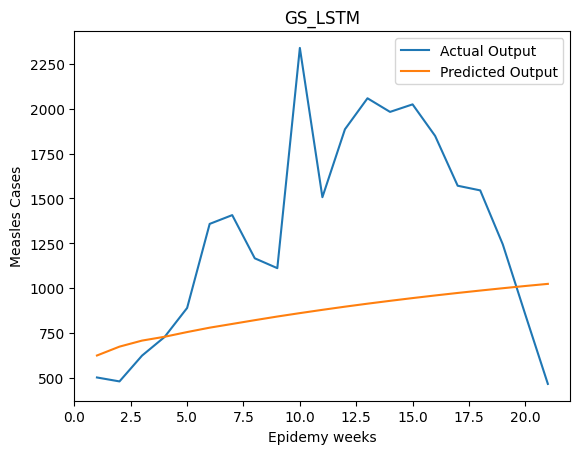

In [46]:

# Extract Predicted Vaalue for gradient Base LSTM for Longterm visuals
import matplotlib.pyplot as plt
x_input = testing_inpt_normalize[0]
temp_input = list(x_input.ravel())

lst_output = []
i = 0
while i < 21:
    if len(temp_input) > 5:
        print(temp_input[1:])
        x_input = array(temp_input[1:])
        x_input= x_input = x_input.reshape((1,x_input.shape[0],n_features))
        yhat = measles_timeseries_model.predict(x_input, verbose=1)
        
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        lst_output.append(yhat[0][0])
        i += 1
    else:
        x_input= x_input = x_input.reshape((1,x_input.shape[0],n_features))
        yhat = measles_timeseries_model.predict(x_input, verbose=0)
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i += 1

test_data = np.array(testing_ouput_normalize[:21])
Actual_data = test_data * sd + mn
predict_data = np.array(lst_output) * sd + mn

print("Actual output: ", Actual_data)
print("Predicted output: ", predict_data)
epi_weeks= np.arange(1,22)

plt.plot(epi_weeks,Actual_data, label='Actual Output')
plt.plot(epi_weeks,predict_data, label='Predicted Output')
plt.xlabel('Epidemy weeks')
plt.ylabel('Measles Cases')
plt.title("GS_LSTM")
plt.legend()
plt.show()


In [21]:
test_data = pd.read_csv('test_epidemic_stages.csv')
test_data_20weeks=test_data[:21]
test_data_20weeks['GS_LSTM']=  predict_data
test_data_20weeks['cases']= Actual_data
test_data_20weeks

C:\Users\ADEBAYO\AppData\Local\Temp\ipykernel_16716\1903582806.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\ADEBAYO\AppData\Local\Temp\ipykernel_16716\1903582806.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Year,Week,cases,incidence_per_100000,CCC,epi_stages,GS_LSTM
0,1964,1,501.0,0.92,167,Initial,491.881592
1,1964,2,479.0,1.68,472,Initial,577.724548
2,1964,3,623.0,2.21,873,Initial,628.934143
3,1964,4,727.0,3.00,1417,Pre-peak,659.983154
4,1964,5,889.0,3.33,2021,Pre-peak,716.803711
5,1964,6,1358.0,2.76,2522,Pre-peak,804.161316
6,1964,7,1407.0,2.64,3001,Pre-peak,884.275513
7,1964,8,1166.0,3.43,3624,Pre-peak,976.059692
8,1964,9,1111.0,4.01,4351,Pre-peak,1070.107910
9,1964,10,2340.0,4.90,5240,Pre-peak,1147.095703


Trial 3 Complete [00h 02m 28s]
val_mae: 0.16157211363315582

Best val_mae So Far: 0.1471877545118332
Total elapsed time: 00h 10m 16s
INFO:tensorflow:Oracle triggered exit
Results summary
Results in logs\auto_kerastunning_singlelayer_200epchs
Showing 10 best trials
Trial summary
Hyperparameters:
units: 130
activation: tanh
dropout: 0.3
learning_rate: 0.01
Score: 0.1471877545118332
Trial summary
Hyperparameters:
units: 110
activation: relu
dropout: 0.3
learning_rate: 0.0001
Score: 0.15729962289333344
Trial summary
Hyperparameters:
units: 70
activation: tanh
dropout: 0.3
learning_rate: 0.0001
Score: 0.16157211363315582
[-0.518538032428581, -0.42428669144658754, -0.28389146477549315, -0.22498437666174723, -0.32610821125701106, -0.3477074768987179, -0.2063304654257277, -0.23255947]
1/1 [==============================] - 0s 19ms/step
[-0.42428669144658754, -0.28389146477549315, -0.22498437666174723, -0.32610821125701106, -0.3477074768987179, -0.2063304654257277, -0.23255947, -0.20365751]
1/1

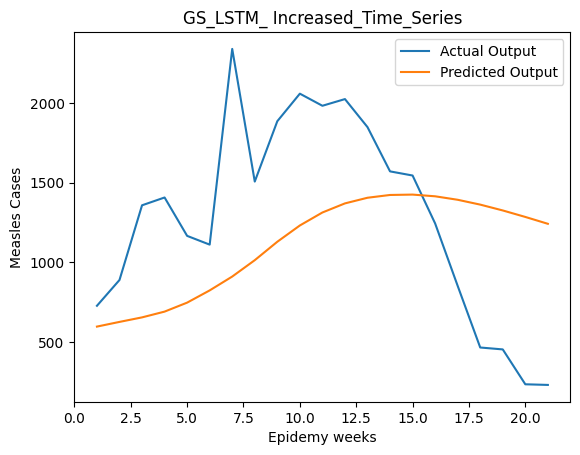

In [54]:
#Inncrease Input series time steps for GS_LSTM
import keras_tuner
Training_inpt_normalize,Training_ouput_normalize = split_function( measles_epidemy_training, 8,3)
testing_inpt_normalize,testing_ouput_normalize = split_function( measles_epidemy_testing, 8,3)
val_input_normalize,val_ouput_normalize= split_function( measles_epidemy_val, 8,1)
n_features = 1
Training_inpt_normalize = Training_inpt_normalize.reshape((Training_inpt_normalize.shape[0],Training_inpt_normalize.shape[1],n_features))
testing_inpt_normalize = testing_inpt_normalize.reshape(testing_inpt_normalize.shape[0],testing_inpt_normalize.shape[1],n_features)
val_input_normalize =val_input_normalize.reshape(val_input_normalize.shape[0],val_input_normalize.shape[1],n_features)
def create_model(hp):
    model = Sequential()
    model.add(LSTM(hp.Int('units',min_value=10,max_value=150,step=10), activation= hp.Choice('activation',['relu','tanh']), input_shape=(Training_inpt_normalize.shape[1],n_features), dropout=hp.Choice('dropout',values=[0.1,0.3])))
    model.add(Dense(1))
    model.compile(optimizer= tf.keras.optimizers.Adam(hp.Choice('learning_rate',values=[1e-2,1e-4])), loss= 'mean_squared_error',metrics=['mae'],) 
    return model 
#Checking out the search space of the single layer
tuner = keras_tuner.RandomSearch(create_model,objective= keras_tuner.Objective("val_mae", direction="min"), overwrite=True,
                                 max_trials=3, executions_per_trial=1, directory='logs',project_name='auto_kerastunning_singlelayer_200epchs')
tuner.search_space_summary()
#Seraching for best fit
tuner.search(Training_inpt_normalize,Training_ouput_normalize,epochs=200,validation_data=(val_input_normalize,val_ouput_normalize))
#Seraching for best fit
measles_timeseries_model = tuner.get_best_models()[0]
# validation split at 600 epochs
tuner.results_summary()
# Extract Predicted Vaalue for gradient Base LSTM for Longterm visuals
import matplotlib.pyplot as plt
x_input = testing_inpt_normalize[0]
temp_input = list(x_input.ravel())

lst_output = []
i = 0
while i < 21:
    if len(temp_input) > 8:
        print(temp_input[1:])
        x_input = array(temp_input[1:])
        x_input= x_input = x_input.reshape((1,x_input.shape[0],n_features))
        yhat = measles_timeseries_model.predict(x_input, verbose=1)
        
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        lst_output.append(yhat[0][0])
        i += 1
    else:
        x_input= x_input = x_input.reshape((1,x_input.shape[0],n_features))
        yhat = measles_timeseries_model.predict(x_input, verbose=0)
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i += 1

test_data = np.array(testing_ouput_normalize[:21])
Actual_data = test_data * sd + mn
predict_data = np.array(lst_output) * sd + mn

print("Actual output: ", Actual_data)
print("Predicted output: ", predict_data)
epi_weeks= np.arange(1,22)

plt.plot(epi_weeks,Actual_data, label='Actual Output')
plt.plot(epi_weeks,predict_data, label='Predicted Output')
plt.xlabel('Epidemy weeks')
plt.ylabel('Measles Cases')
plt.title("GS_LSTM_ Increased_Time_Series")
plt.legend()
plt.show()

In [131]:
#Sadddle Bifurcated GS_LSTM
import keras_tuner
def saddle_bifurcation(x):
    return tf.square(x)- 2.5
Training_inpt_normalize,Training_ouput_normalize = split_function( measles_epidemy_training, 8,3)
testing_inpt_normalize,testing_ouput_normalize = split_function( measles_epidemy_testing, 8,3)
val_input_normalize,val_ouput_normalize= split_function( measles_epidemy_val, 8,1)
n_features = 1
Training_inpt_normalize = Training_inpt_normalize.reshape((Training_inpt_normalize.shape[0],Training_inpt_normalize.shape[1],n_features))
testing_inpt_normalize = testing_inpt_normalize.reshape(testing_inpt_normalize.shape[0],testing_inpt_normalize.shape[1],n_features)
val_input_normalize =val_input_normalize.reshape(val_input_normalize.shape[0],val_input_normalize.shape[1],n_features)
def create_model(hp):
    model = Sequential()
    model.add(LSTM(hp.Int('units',min_value=10,max_value=150,step=10), activation= saddle_bifurcation, input_shape=(Training_inpt_normalize.shape[1],n_features), dropout=hp.Choice('dropout',values=[0.1,0.3])))
    model.add(Dense(1))
    model.compile(optimizer= tf.keras.optimizers.Adam(hp.Choice('learning_rate',values=[1e-2,1e-4])), loss= 'mean_squared_error',metrics=['RootMeanSquaredError'],) 
    return model 
#Checking out the search space of the single layer
tuner = keras_tuner.RandomSearch(create_model,objective= keras_tuner.Objective("val_root_mean_squared_error", direction="min"), overwrite=True,
                                 max_trials=3, executions_per_trial=1, directory='logs',project_name='auto_kerastunning_singlelayer_200epchs')
tuner.search_space_summary()
#Seraching for best fit
tuner.search(Training_inpt_normalize,Training_ouput_normalize,epochs=3000,validation_data=(val_input_normalize,val_ouput_normalize))
#Seraching for best fit
measles_timeseries_model = tuner.get_best_models()[0]
# validation split at 600 epochs
tuner.results_summary()
# Extract Predicted Vaalue for gradient Base LSTM for Longterm visuals
import matplotlib.pyplot as plt
x_input = testing_inpt_normalize[0]
temp_input = list(x_input.ravel())

lst_output = []
i = 0
while i < 21:
    if len(temp_input) > 8:
        print(temp_input[1:])
        x_input = array(temp_input[1:])
        x_input= x_input = x_input.reshape((1,x_input.shape[0],n_features))
        yhat = measles_timeseries_model.predict(x_input, verbose=1)
        
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        lst_output.append(yhat[0][0])
        i += 1
    else:
        x_input= x_input = x_input.reshape((1,x_input.shape[0],n_features))
        yhat = measles_timeseries_model.predict(x_input, verbose=0)
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i += 1

test_data = np.array(testing_ouput_normalize[:21])
Actual_data = test_data * sd + mn
predict_data = np.array(lst_output) * sd + mn

print("Actual output: ", Actual_data)
print("Predicted output: ", predict_data)
epi_weeks= np.arange(1,22)

plt.plot(epi_weeks,Actual_data, label='Actual Output')
plt.plot(epi_weeks,predict_data, label='Predicted Output')
plt.xlabel('Epidemy weeks')
plt.ylabel('Measles Cases')
plt.title("Saddle_Bifurcated_GS_LSTM")
plt.legend()
plt.show()

Search space summary
Default search space size: 3
units (Int)
{'default': None, 'conditions': [], 'min_value': 10, 'max_value': 150, 'step': 10, 'sampling': None}
dropout (Choice)
{'default': 0.1, 'conditions': [], 'values': [0.1, 0.3], 'ordered': True}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.0001], 'ordered': True}

Search: Running Trial #1

Value             |Best Value So Far |Hyperparameter
60                |?                 |units
0.3               |?                 |dropout
0.0001            |?                 |learning_rate

Epoch 1/3000
35/35 [==============================] - 2s 20ms/step - loss: nan - root_mean_squared_error: nan - val_loss: nan - val_root_mean_squared_error: nan
Epoch 2/3000
35/35 [==============================] - 0s 11ms/step - loss: nan - root_mean_squared_error: nan - val_loss: nan - val_root_mean_squared_error: nan
Epoch 3/3000
35/35 [==============================] - 0s 13ms/step - loss: nan - root_mean_squared_

KeyboardInterrupt: 

Trial 3 Complete [00h 05m 09s]
val_mae: 0.1339772641658783

Best val_mae So Far: 0.13203778862953186
Total elapsed time: 00h 11m 57s
INFO:tensorflow:Oracle triggered exit
Results summary
Results in logs\auto_kerastunning_singlelayer_200epchs
Showing 10 best trials
Trial summary
Hyperparameters:
units: 80
dropout: 0.1
learning_rate: 0.01
Score: 0.13203778862953186
Trial summary
Hyperparameters:
units: 120
dropout: 0.1
learning_rate: 0.01
Score: 0.1339772641658783
Trial summary
Hyperparameters:
units: 80
dropout: 0.3
learning_rate: 0.01
Score: 0.15884627401828766
[-0.518538032428581, -0.42428669144658754, -0.28389146477549315, -0.22498437666174723, -0.32610821125701106, -0.3477074768987179, -0.2063304654257277, -0.23126964]
1/1 [==============================] - 0s 30ms/step
[-0.42428669144658754, -0.28389146477549315, -0.22498437666174723, -0.32610821125701106, -0.3477074768987179, -0.2063304654257277, -0.23126964, -0.22982629]
1/1 [==============================] - 0s 47ms/step
[-0.283

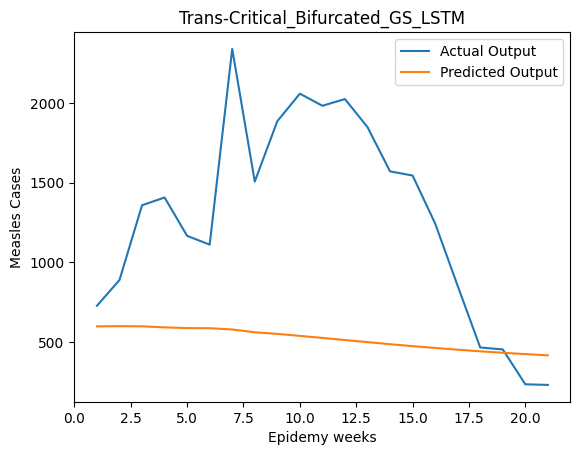

In [93]:
#Transcritical Bifurcated GS_LSTM
import keras_tuner
def Transcritical_bifurcation(x):
    return tf.keras.activations.sigmoid(0.5-x)
Training_inpt_normalize,Training_ouput_normalize = split_function( measles_epidemy_training, 8,3)
testing_inpt_normalize,testing_ouput_normalize = split_function( measles_epidemy_testing, 8,3)
val_input_normalize,val_ouput_normalize= split_function( measles_epidemy_val, 8,1)
n_features = 1
Training_inpt_normalize = Training_inpt_normalize.reshape((Training_inpt_normalize.shape[0],Training_inpt_normalize.shape[1],n_features))
testing_inpt_normalize = testing_inpt_normalize.reshape(testing_inpt_normalize.shape[0],testing_inpt_normalize.shape[1],n_features)
val_input_normalize =val_input_normalize.reshape(val_input_normalize.shape[0],val_input_normalize.shape[1],n_features)
def create_model(hp):
    model = Sequential()
    model.add(LSTM(hp.Int('units',min_value=10,max_value=150,step=10), activation= Transcritical_bifurcation, input_shape=(Training_inpt_normalize.shape[1],n_features), dropout=hp.Choice('dropout',values=[0.1,0.3])))
    model.add(Dense(1))
    model.compile(optimizer= tf.keras.optimizers.Adam(hp.Choice('learning_rate',values=[1e-2,1e-4])), loss= 'mean_squared_error',metrics=['mae'],) 
    return model 
#Checking out the search space of the single layer
tuner = keras_tuner.RandomSearch(create_model,objective= keras_tuner.Objective("val_mae", direction="min"), overwrite=True,
                                 max_trials=3, executions_per_trial=1, directory='logs',project_name='auto_kerastunning_singlelayer_200epchs')
tuner.search_space_summary()
#Seraching for best fit
tuner.search(Training_inpt_normalize,Training_ouput_normalize,epochs=200,validation_data=(val_input_normalize,val_ouput_normalize))
#Seraching for best fit
measles_timeseries_model = tuner.get_best_models()[0]
# validation split at 600 epochs
tuner.results_summary()
# Extract Predicted Vaalue for gradient Base LSTM for Longterm visuals
import matplotlib.pyplot as plt
x_input = testing_inpt_normalize[0]
temp_input = list(x_input.ravel())

lst_output = []
i = 0
while i < 21:
    if len(temp_input) > 8:
        print(temp_input[1:])
        x_input = array(temp_input[1:])
        x_input= x_input = x_input.reshape((1,x_input.shape[0],n_features))
        yhat = measles_timeseries_model.predict(x_input, verbose=1)
        
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        lst_output.append(yhat[0][0])
        i += 1
    else:
        x_input= x_input = x_input.reshape((1,x_input.shape[0],n_features))
        yhat = measles_timeseries_model.predict(x_input, verbose=0)
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i += 1

test_data = np.array(testing_ouput_normalize[:21])
Actual_data = test_data * sd + mn
predict_data = np.array(lst_output) * sd + mn

print("Actual output: ", Actual_data)
print("Predicted output: ", predict_data)
epi_weeks= np.arange(1,22)

plt.plot(epi_weeks,Actual_data, label='Actual Output')
plt.plot(epi_weeks,predict_data, label='Predicted Output')
plt.xlabel('Epidemy weeks')
plt.ylabel('Measles Cases')
plt.title("Trans-Critical_Bifurcated_GS_LSTM")
plt.legend()
plt.show()

In [134]:
#Pitchfork Bifurcation GS_LSTM
import keras_tuner
Training_inpt_normalize,Training_ouput_normalize = split_function( measles_epidemy_training, 8,3)
testing_inpt_normalize,testing_ouput_normalize = split_function( measles_epidemy_testing,8 ,3)
val_input_normalize,val_ouput_normalize= split_function( measles_epidemy_val, 8,1)
n_features = 1
Training_inpt_normalize = Training_inpt_normalize.reshape((Training_inpt_normalize.shape[0],Training_inpt_normalize.shape[1],n_features))
testing_inpt_normalize = testing_inpt_normalize.reshape(testing_inpt_normalize.shape[0],testing_inpt_normalize.shape[1],n_features)
val_input_normalize =val_input_normalize.reshape(val_input_normalize.shape[0],val_input_normalize.shape[1],n_features)
def Pitchfork_bifurcation(x):
    return tf.math.pow(x,3) - 2*x
def create_model(hp):
    model = Sequential()
    model.add(LSTM(hp.Int('units',min_value=10,max_value=150,step=10), activation= Pitchfork_bifurcation, input_shape=(Training_inpt_normalize.shape[1],n_features), dropout=hp.Choice('dropout',values=[0.1,0.3])))
    model.add(Dense(1))
    model.compile(optimizer= tf.keras.optimizers.Adam(hp.Choice('learning_rate',values=[1e-2,1e-4])), loss= 'mean_squared_error',metrics=['mae'],) 
    return model 
#Checking out the search space of the single layer
tuner = keras_tuner.RandomSearch(create_model,objective= keras_tuner.Objective("val_mae", direction="min"), overwrite=True,
                                 max_trials=3, executions_per_trial=1, directory='logs',project_name='auto_kerastunning_singlelayer_200epchs')
tuner.search_space_summary()
#Seraching for best fit
tuner.search(Training_inpt_normalize,Training_ouput_normalize,epochs=700,validation_data=(val_input_normalize,val_ouput_normalize))
#Seraching for best fit
measles_timeseries_model = tuner.get_best_models()[0]
# validation split at 600 epochs
tuner.results_summary()
# Extract Predicted Vaalue for gradient Base LSTM for Longterm visuals
import matplotlib.pyplot as plt
x_input = testing_inpt_normalize[0]
temp_input = list(x_input.ravel())

lst_output = []
i = 0
while i < 21:
    if len(temp_input) > 8:
        print(temp_input[1:])
        x_input = array(temp_input[1:])
        x_input= x_input = x_input.reshape((1,x_input.shape[0],n_features))
        yhat = measles_timeseries_model.predict(x_input, verbose=1)
        
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        lst_output.append(yhat[0][0])
        i += 1
    else:
        x_input= x_input = x_input.reshape((1,x_input.shape[0],n_features))
        yhat = measles_timeseries_model.predict(x_input, verbose=0)
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i += 1

test_data = np.array(testing_ouput_normalize[:21])
Actual_data = test_data * sd + mn
predict_data = np.array(lst_output) * sd + mn

print("Actual output: ", Actual_data)
print("Predicted output: ", predict_data)
epi_weeks= np.arange(1,22)

plt.plot(epi_weeks,Actual_data, label='Actual Output')
plt.plot(epi_weeks,predict_data, label='Predicted Output')
plt.xlabel('Epidemy weeks')
plt.ylabel('Measles Cases')
plt.title("Pitchfork_Bifurcated_GS_LSTM")
plt.legend()
plt.show()

Search space summary
Default search space size: 3
units (Int)
{'default': None, 'conditions': [], 'min_value': 10, 'max_value': 150, 'step': 10, 'sampling': None}
dropout (Choice)
{'default': 0.1, 'conditions': [], 'values': [0.1, 0.3], 'ordered': True}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.0001], 'ordered': True}

Search: Running Trial #1

Value             |Best Value So Far |Hyperparameter
90                |?                 |units
0.3               |?                 |dropout
0.01              |?                 |learning_rate

Epoch 1/700
35/35 [==============================] - 3s 29ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 2/700
35/35 [==============================] - 1s 24ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 3/700
35/35 [==============================] - 1s 24ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 4/700
35/35 [==============================] - 1s 23ms/

KeyboardInterrupt: 

In [55]:
#Multi-layered LSTM Auto keras Tuned
def create_multiLayered_model(hp):
    model = Sequential()
    model.add(LSTM(hp.Int('units',min_value=10,max_value=150,step=10),return_sequences=True,  activation= hp.Choice('activation',['relu','tanh']), input_shape=(Training_inpt_normalize.shape[1],n_features), dropout=0.1))
    for i in range(hp.Int('layers',2,5)):
        i=i+1
        model.add(LSTM(hp.Int('units_'+ str(i),min_value=10,max_value=100,step=10),return_sequences=True, activation=hp.Choice('activation',['relu','tanh']),dropout=hp.Choice('dropout',values=[0.1,0.25])))
        
    model.add(Dense(1))
    model.compile(optimizer= tf.keras.optimizers.Adam(hp.Choice('learning_rate',values=[1e-2,1e-4])), loss= 'mean_squared_error',metrics=['RootMeanSquaredError'],) 
    return model   
tuner = keras_tuner.RandomSearch(create_multiLayered_model,objective= keras_tuner.Objective("val_root_mean_squared_error", direction="min"),
                                 max_trials=3, executions_per_trial=1, directory='logs',project_name='turner')
tuner.search_space_summary()
tuner.search(Training_inpt_normalize,Training_ouput_normalize,epochs=200,validation_data=(val_input_normalize,val_ouput_normalize))
#%tensorboard  --logdir='logs\\adam' --port 5000
#Multi-layer at 600 epochs
tuner.results_summary()

Trial 3 Complete [00h 05m 16s]
val_root_mean_squared_error: 0.7222214937210083

Best val_root_mean_squared_error So Far: 0.7207732200622559
Total elapsed time: 01h 53m 55s
INFO:tensorflow:Oracle triggered exit
Results summary
Results in logs\turner
Showing 10 best trials
Trial summary
Hyperparameters:
units: 70
activation: tanh
layers: 3
units_1: 70
dropout: 0.25
units_2: 90
learning_rate: 0.0001
units_3: 10
Score: 0.7207732200622559
Trial summary
Hyperparameters:
units: 120
activation: relu
layers: 3
units_1: 80
dropout: 0.25
units_2: 10
learning_rate: 0.0001
units_3: 90
Score: 0.7222214937210083
Trial summary
Hyperparameters:
units: 80
activation: relu
layers: 3
units_1: 50
dropout: 0.1
units_2: 80
learning_rate: 0.01
units_3: 20
Score: 0.725134015083313


In [15]:
! powershell "ps | Where-Object {$_.ProcessName -eq 'tensorboard'}"

! powershell "ps | Where-Object {$_.ProcessName -eq 'tensorboard'}| %{kill $_}"

! powershell "echo 'cleaning tensorboard temp dir'"
! powershell "rm $env:TEMP\.tensorboard-info\*"



checking for existing tensorboard processes
cleaning tensorboard temp dir


In [56]:
# CNN LSTM
Training_inpt_normalize,Training_ouput_normalize = split_function( measles_epidemy_training, 4,3)
testing_inpt_normalize,testing_ouput_normalize = split_function( measles_epidemy_testing, 4,3)
val_input_normalize,val_ouput_normalize= split_function( measles_epidemy_val, 4,1)
n_seq = 2
n_step= 2
n_features = 1
Training_inpt_normalize =Training_inpt_normalize.reshape((Training_inpt_normalize.shape[0],n_seq,n_step,n_features))
testing_inpt_normalize = testing_inpt_normalize.reshape((testing_inpt_normalize.shape[0],n_seq,n_step,n_features))
val_input_normalize= val_input_normalize.reshape((val_input_normalize.shape[0],n_seq,n_step,n_features))

Trial 5 Complete [00h 03m 25s]
val_root_mean_squared_error: 0.24330180883407593

Best val_root_mean_squared_error So Far: 0.23926207423210144
Total elapsed time: 00h 12m 06s
INFO:tensorflow:Oracle triggered exit
Results summary
Results in logs\auto_keras_tunning_cnnlstm
Showing 10 best trials
Trial summary
Hyperparameters:
filters: 110
activation: relu
units: 50
learning_rate: 0.01
Score: 0.23926207423210144
Trial summary
Hyperparameters:
filters: 58
activation: relu
units: 40
learning_rate: 0.01
Score: 0.24020417034626007
Trial summary
Hyperparameters:
filters: 54
activation: tanh
units: 130
learning_rate: 0.0001
Score: 0.24183383584022522
Trial summary
Hyperparameters:
filters: 118
activation: tanh
units: 110
learning_rate: 0.01
Score: 0.242566779255867
Trial summary
Hyperparameters:
filters: 82
activation: tanh
units: 130
learning_rate: 0.01
Score: 0.24330180883407593
1/1 [==============================] - 0s 43ms/step
Actual output:  [ 604.  501.  479.  623.  727.  889. 1358. 1407.

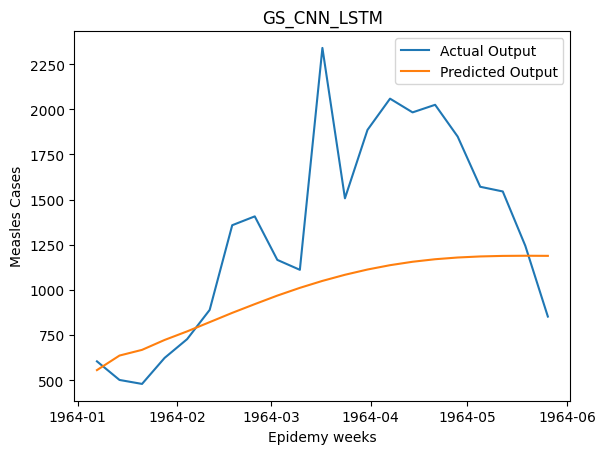

In [59]:
def cnn_lstm_model(hp):
    model = Sequential()
    model.add(TimeDistributed(Conv1D(hp.Int('filters',min_value=10,max_value=150,step=4), kernel_size=1, activation=hp.Choice('activation',['relu','tanh'])), input_shape=(None, n_step, n_features)))
    model.add(TimeDistributed(MaxPooling1D(pool_size=2)))
    model.add(TimeDistributed(Flatten()))
    model.add(LSTM(hp.Int('units',min_value=10,max_value=150,step=10), activation= hp.Choice('activation',['relu','tanh'])))
    model.add(Dense(1))
    model.compile(optimizer= tf.keras.optimizers.Adam(hp.Choice('learning_rate',values=[1e-2,1e-4])), loss= 'mean_squared_error',metrics=['RootMeanSquaredError'],) 
    return model
tuner = keras_tuner.RandomSearch(cnn_lstm_model,objective= keras_tuner.Objective("val_root_mean_squared_error", direction="min"), overwrite=True,
                                 max_trials=5, executions_per_trial=1, directory='logs',project_name='auto_keras_tunning_cnnlstm')
tuner.search_space_summary()
tuner.search(Training_inpt_normalize,Training_ouput_normalize,epochs=200,validation_data=(val_input_normalize,val_ouput_normalize))
tuner.results_summary()
#PLOT GS_CNN_LSTM
# Extract Predicted Vaalue for gradient Base LSTM for Longterm visuals
GS_CNN_LSTM =tuner.get_best_models()[0]
x_input = testing_inpt_normalize[0]
temp_input = list(x_input.ravel())

lst_output = []
i = 0
while i < 21:
    if len(temp_input) > 4:
        
        x_input = array(temp_input[1:])
        
        x_input = x_input.reshape((1,n_seq,n_step,n_features))
        yhat = GS_CNN_LSTM.predict(x_input, verbose=1)
        
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        lst_output.append(yhat[0][0])
        i += 1
    else:
        
        x_input = x_input.reshape((1,n_seq,n_step,n_features))
        yhat = GS_CNN_LSTM.predict(x_input, verbose=0)
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i += 1

test_data = np.array(testing_ouput_normalize[:21])
Actual_data = test_data * sd + mn
predict_data = np.array(lst_output) * sd + mn

print("Actual output: ", Actual_data)
print("Predicted output: ", predict_data)
epi_week = datetime.date(1963,12,31)
weekly = datetime.timedelta(days=7)
week_list=[]

for i in range(21):
    temp = epi_week + weekly
    week_list.append(temp)
    epi_week = temp

plt.plot(week_list,Actual_data, label='Actual Output')
plt.plot(week_list,predict_data, label='Predicted Output')
plt.xlabel('Epidemy weeks')
plt.ylabel('Measles Cases')
plt.title("GS_CNN_LSTM")
plt.legend()
plt.show()


In [20]:
! powershell "echo 'checking for existing tensorboard processes'"
! powershell "ps | Where-Object {$_.ProcessName -eq 'tensorboard'}"

! powershell "ps | Where-Object {$_.ProcessName -eq 'tensorboard'}| %{kill $_}"

! powershell "echo 'cleaning tensorboard temp dir'"
! powershell "rm $env:TEMP\.tensorboard-info\*"

! powershell "ps | Where-Object {$_.ProcessName -eq 'tensorboard'}"

checking for existing tensorboard processes

Handles  NPM(K)    PM(K)      WS(K)     CPU(s)     Id  SI ProcessName                                                  
-------  ------    -----      -----     ------     --  -- -----------                                                  
     58       5      648       3396       0.00  15532  31 tensorboard                                                  


cleaning tensorboard temp dir


In [21]:
%tensorboard  --logdir='logs\\norm' --port 5000

In [38]:
tuner.results_summary()

Results summary
Results in logs\auto_keras_tunning_cnnlstm
Showing 10 best trials
Trial summary
Hyperparameters:
filters: 130
activation: relu
units: 50
learning_rate: 0.0001
Score: 0.2184436395764351
Trial summary
Hyperparameters:
filters: 46
activation: relu
units: 150
learning_rate: 0.0001
Score: 0.21898151189088821
Trial summary
Hyperparameters:
filters: 82
activation: tanh
units: 140
learning_rate: 0.01
Score: 0.22322490811347961
Trial summary
Hyperparameters:
filters: 122
activation: tanh
units: 70
learning_rate: 0.0001
Score: 0.22437464445829391
Trial summary
Hyperparameters:
filters: 130
activation: tanh
units: 10
learning_rate: 0.01
Score: 0.22609982639551163


In [23]:
# Particle-Swarm Optimization
!pip install pyswarms

In [39]:
import pyswarms as ps

In [41]:
Training_inpt_normalize,Training_ouput_normalize = split_function( measles_epidemy_training, 5,1)
testing_inpt_normalize,testing_ouput_normalize = split_function( measles_epidemy_testing, 5,1)
val_input_normalize,val_ouput_normalize= split_function( measles_epidemy_val, 5,1)
n_features = 1
Training_inpt_normalize = Training_inpt_normalize.reshape((Training_inpt_normalize.shape[0],Training_inpt_normalize.shape[1],n_features))
testing_inpt_normalize = testing_inpt_normalize.reshape(testing_inpt_normalize.shape[0],testing_inpt_normalize.shape[1],n_features)
val_input_normalize =val_input_normalize.reshape(val_input_normalize.shape[0],val_input_normalize.shape[1],n_features)


In [72]:

def create_model():
    model = Sequential(name='pso_lstm')
    model.add(LSTM(110, activation= 'tanh', input_shape=(Training_inpt_normalize.shape[1],n_features)))
    model.add(Dense(1))
    model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=0.01), loss='mean_squared_error',metrics=['RootMeanSquaredError'],) 
    return model 

In [15]:
print("Model Name:", measles_timeseries_model.name)
history_callback=measles_timeseries_model.fit(Training_inpt_normalize,Training_ouput_normalize,validation_split=0.2,epochs=300,verbose=0)
score=measles_timeseries_model.evaluate(testing_inpt_normalize,testing_ouput_normalize)
print('Test Loss:',score[0])
print('Test Accuracy:',score[1])
#print('-----%s seconds------'%(time.time()-start_time))

Model Name: pso_lstm
2/2 [==============================] - 0s 8ms/step - loss: 0.1505 - root_mean_squared_error: 0.3880
Test Loss: 0.1505228728055954
Test Accuracy: 0.38797277212142944


In [18]:
def get_shape(model):
    weight_layer = model.get_weights()
    shapes = []
    for weights in  weight_layer:
        shapes.append(weights.shape)
        
    return shapes
print(get_shape(measles_timeseries_model))

[(1, 440), (110, 440), (440,), (110, 1), (1,)]


In [25]:
#get model structure
def get_shape(model):
    weight_layer = model.get_weights()
    shapes = []
    for weights in  weight_layer:
        shapes.append(weights.shape)
        
    return shapes

def set_shape(weights,shapes):
    new_weights = []
    index = 0
    for shape in shapes:
        if (len(shape)>1):
            n_nodes = np.prod(shape) + index
        else:
            n_nodes = shape[0] + index
        tmp = np.array(weights[index:n_nodes]).reshape(shape)
        new_weights.append(tmp)
        index = n_nodes
    return new_weights


def evaluate_lstm(W,shape, X_train=Training_inpt_normalize, Y_train=Training_ouput_normalize):
    results = []
    for weights in W:
        
        measles_timeseries_model.set_weights(set_shape(weights,shape))
        score = measles_timeseries_model.evaluate(X_train, Y_train, verbose=0)
        results.append(1-score[1])
    return results

shape = get_shape(measles_timeseries_model)

x_max = 1.0 * np.ones(242550)
x_min = -1.0 * x_max
bounds = (x_min, x_max)
options = {'c1': 1, 'c2': 2, 'w': 0.9}
optimizer = ps.single.GlobalBestPSO(n_particles=60, dimensions=242550, options=options, bounds=bounds)

cost, pos = optimizer.optimize(evaluate_lstm, 30, X_train=Training_inpt_normalize, Y_train=Training_ouput_normalize,shape=shape)
measles_timeseries_model.set_weights(set_shape(pos,shape))
score = measles_timeseries_model.evaluate(testing_inpt_normalize,testing_ouput_normalize)
print('Test loss:', score[0])
print('Test accuracy:', score[1])        
            
    


2023-03-15 03:37:25,388 - pyswarms.single.global_best - INFO - Optimize for 30 iters with {'c1': 1, 'c2': 2, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████████████████████████████████████████████████████████|30/30, best_cost=-4.38
2023-03-15 04:26:51,229 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -4.377275466918945, best pos: [0.56281045 0.38671881 0.72058611 ... 0.75446857 0.1850534  0.52875705]


2/2 [==============================] - 1s 575ms/step - loss: 30.5003 - root_mean_squared_error: 5.5227
Test loss: 30.50026512145996
Test accuracy: 5.522704601287842


2023-05-01 13:28:16,347 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 2, 'w': 0.9}
pyswarms.single.global_best:   0%|                                                                               |0/100

2/2 [==============================] - 0s 7ms/step - loss: 0.0590 - root_mean_squared_error: 0.2428


pyswarms.single.global_best:   1%|▌                                                             |1/100, best_cost=-.243

2/2 [==============================] - 0s 9ms/step - loss: 0.0689 - root_mean_squared_error: 0.2624


pyswarms.single.global_best:   2%|█▏                                                            |2/100, best_cost=-.262

2/2 [==============================] - 0s 11ms/step - loss: 0.0643 - root_mean_squared_error: 0.2535


pyswarms.single.global_best:   3%|█▊                                                            |3/100, best_cost=-.262

2/2 [==============================] - 0s 9ms/step - loss: 0.0693 - root_mean_squared_error: 0.2632


pyswarms.single.global_best:   4%|██▍                                                           |4/100, best_cost=-.263

2/2 [==============================] - 0s 6ms/step - loss: 0.0619 - root_mean_squared_error: 0.2489


pyswarms.single.global_best:   5%|███                                                           |5/100, best_cost=-.263

2/2 [==============================] - 0s 11ms/step - loss: 0.0633 - root_mean_squared_error: 0.2515


pyswarms.single.global_best:   6%|███▋                                                          |6/100, best_cost=-.263

2/2 [==============================] - 0s 8ms/step - loss: 0.0653 - root_mean_squared_error: 0.2555


pyswarms.single.global_best:   7%|████▎                                                         |7/100, best_cost=-.263

2/2 [==============================] - 0s 10ms/step - loss: 0.0604 - root_mean_squared_error: 0.2458


pyswarms.single.global_best:   8%|████▉                                                         |8/100, best_cost=-.263

2/2 [==============================] - 0s 8ms/step - loss: 0.0661 - root_mean_squared_error: 0.2571


pyswarms.single.global_best:   9%|█████▌                                                        |9/100, best_cost=-.263

2/2 [==============================] - 0s 9ms/step - loss: 0.0633 - root_mean_squared_error: 0.2515


pyswarms.single.global_best:  10%|██████                                                       |10/100, best_cost=-.263

2/2 [==============================] - 0s 6ms/step - loss: 0.0600 - root_mean_squared_error: 0.2450


pyswarms.single.global_best:  11%|██████▋                                                      |11/100, best_cost=-.263

2/2 [==============================] - 0s 6ms/step - loss: 0.0595 - root_mean_squared_error: 0.2440


pyswarms.single.global_best:  12%|███████▎                                                     |12/100, best_cost=-.263

2/2 [==============================] - 0s 6ms/step - loss: 0.0642 - root_mean_squared_error: 0.2533


pyswarms.single.global_best:  13%|███████▉                                                     |13/100, best_cost=-.263

2/2 [==============================] - 0s 5ms/step - loss: 0.0626 - root_mean_squared_error: 0.2503


pyswarms.single.global_best:  14%|████████▌                                                    |14/100, best_cost=-.263

2/2 [==============================] - 0s 6ms/step - loss: 0.0608 - root_mean_squared_error: 0.2465


pyswarms.single.global_best:  15%|█████████▏                                                   |15/100, best_cost=-.263

2/2 [==============================] - 0s 9ms/step - loss: 0.0653 - root_mean_squared_error: 0.2555


pyswarms.single.global_best:  16%|█████████▊                                                   |16/100, best_cost=-.263

2/2 [==============================] - 0s 7ms/step - loss: 0.0595 - root_mean_squared_error: 0.2440


pyswarms.single.global_best:  17%|██████████▎                                                  |17/100, best_cost=-.263

2/2 [==============================] - 0s 10ms/step - loss: 0.0610 - root_mean_squared_error: 0.2471


pyswarms.single.global_best:  18%|██████████▉                                                  |18/100, best_cost=-.263

2/2 [==============================] - 0s 5ms/step - loss: 0.0666 - root_mean_squared_error: 0.2580


pyswarms.single.global_best:  19%|███████████▌                                                 |19/100, best_cost=-.263

2/2 [==============================] - 0s 5ms/step - loss: 0.0615 - root_mean_squared_error: 0.2479


pyswarms.single.global_best:  20%|████████████▏                                                |20/100, best_cost=-.263

2/2 [==============================] - 0s 10ms/step - loss: 0.0616 - root_mean_squared_error: 0.2482


pyswarms.single.global_best:  21%|████████████▊                                                |21/100, best_cost=-.263

2/2 [==============================] - 0s 7ms/step - loss: 0.0604 - root_mean_squared_error: 0.2458


pyswarms.single.global_best:  22%|█████████████▍                                               |22/100, best_cost=-.263

2/2 [==============================] - 0s 6ms/step - loss: 0.0688 - root_mean_squared_error: 0.2622


pyswarms.single.global_best:  23%|██████████████                                               |23/100, best_cost=-.263

2/2 [==============================] - 0s 7ms/step - loss: 0.0742 - root_mean_squared_error: 0.2724


pyswarms.single.global_best:  24%|██████████████▋                                              |24/100, best_cost=-.272

2/2 [==============================] - 0s 6ms/step - loss: 0.0658 - root_mean_squared_error: 0.2566


pyswarms.single.global_best:  25%|███████████████▎                                             |25/100, best_cost=-.272

2/2 [==============================] - 0s 5ms/step - loss: 0.0605 - root_mean_squared_error: 0.2459


pyswarms.single.global_best:  26%|███████████████▊                                             |26/100, best_cost=-.272

2/2 [==============================] - 0s 10ms/step - loss: 0.0677 - root_mean_squared_error: 0.2602


pyswarms.single.global_best:  27%|████████████████▍                                            |27/100, best_cost=-.272

2/2 [==============================] - 0s 8ms/step - loss: 0.0618 - root_mean_squared_error: 0.2487


pyswarms.single.global_best:  28%|█████████████████                                            |28/100, best_cost=-.272

2/2 [==============================] - 0s 11ms/step - loss: 0.0648 - root_mean_squared_error: 0.2546


pyswarms.single.global_best:  29%|█████████████████▋                                           |29/100, best_cost=-.272

2/2 [==============================] - 0s 5ms/step - loss: 0.0640 - root_mean_squared_error: 0.2531


pyswarms.single.global_best:  30%|██████████████████▎                                          |30/100, best_cost=-.272

2/2 [==============================] - 0s 7ms/step - loss: 0.0644 - root_mean_squared_error: 0.2538


pyswarms.single.global_best:  31%|██████████████████▉                                          |31/100, best_cost=-.272

2/2 [==============================] - 0s 6ms/step - loss: 0.0600 - root_mean_squared_error: 0.2450


pyswarms.single.global_best:  32%|███████████████████▌                                         |32/100, best_cost=-.272

2/2 [==============================] - 0s 7ms/step - loss: 0.0673 - root_mean_squared_error: 0.2595


pyswarms.single.global_best:  33%|████████████████████▏                                        |33/100, best_cost=-.272

2/2 [==============================] - 0s 8ms/step - loss: 0.0636 - root_mean_squared_error: 0.2523


pyswarms.single.global_best:  34%|████████████████████▋                                        |34/100, best_cost=-.272

2/2 [==============================] - 0s 11ms/step - loss: 0.0595 - root_mean_squared_error: 0.2440


pyswarms.single.global_best:  35%|█████████████████████▎                                       |35/100, best_cost=-.272

2/2 [==============================] - 0s 9ms/step - loss: 0.0669 - root_mean_squared_error: 0.2586


pyswarms.single.global_best:  36%|█████████████████████▉                                       |36/100, best_cost=-.272

2/2 [==============================] - 0s 9ms/step - loss: 0.0613 - root_mean_squared_error: 0.2477


pyswarms.single.global_best:  37%|██████████████████████▌                                      |37/100, best_cost=-.272

2/2 [==============================] - 0s 9ms/step - loss: 0.0650 - root_mean_squared_error: 0.2550


pyswarms.single.global_best:  38%|███████████████████████▏                                     |38/100, best_cost=-.272

2/2 [==============================] - 0s 9ms/step - loss: 0.0642 - root_mean_squared_error: 0.2535


pyswarms.single.global_best:  39%|███████████████████████▊                                     |39/100, best_cost=-.272

2/2 [==============================] - 0s 7ms/step - loss: 0.0596 - root_mean_squared_error: 0.2441


pyswarms.single.global_best:  40%|████████████████████████▍                                    |40/100, best_cost=-.272

2/2 [==============================] - 0s 9ms/step - loss: 0.0602 - root_mean_squared_error: 0.2455


pyswarms.single.global_best:  41%|█████████████████████████                                    |41/100, best_cost=-.272

2/2 [==============================] - 0s 10ms/step - loss: 0.0653 - root_mean_squared_error: 0.2555


pyswarms.single.global_best:  42%|█████████████████████████▌                                   |42/100, best_cost=-.272

2/2 [==============================] - 0s 6ms/step - loss: 0.0657 - root_mean_squared_error: 0.2563


pyswarms.single.global_best:  43%|██████████████████████████▏                                  |43/100, best_cost=-.272

2/2 [==============================] - 0s 4ms/step - loss: 0.0629 - root_mean_squared_error: 0.2508


pyswarms.single.global_best:  44%|██████████████████████████▊                                  |44/100, best_cost=-.272

2/2 [==============================] - 0s 11ms/step - loss: 0.0606 - root_mean_squared_error: 0.2463


pyswarms.single.global_best:  45%|███████████████████████████▍                                 |45/100, best_cost=-.272

2/2 [==============================] - 0s 9ms/step - loss: 0.0644 - root_mean_squared_error: 0.2538


pyswarms.single.global_best:  46%|████████████████████████████                                 |46/100, best_cost=-.272

2/2 [==============================] - 0s 11ms/step - loss: 0.0640 - root_mean_squared_error: 0.2531


pyswarms.single.global_best:  47%|████████████████████████████▋                                |47/100, best_cost=-.272

2/2 [==============================] - 0s 9ms/step - loss: 0.0661 - root_mean_squared_error: 0.2570


pyswarms.single.global_best:  48%|█████████████████████████████▎                               |48/100, best_cost=-.272

2/2 [==============================] - 0s 9ms/step - loss: 0.0591 - root_mean_squared_error: 0.2431


pyswarms.single.global_best:  49%|█████████████████████████████▉                               |49/100, best_cost=-.272

2/2 [==============================] - 0s 9ms/step - loss: 0.0612 - root_mean_squared_error: 0.2474


pyswarms.single.global_best:  50%|██████████████████████████████▌                              |50/100, best_cost=-.272

2/2 [==============================] - 0s 7ms/step - loss: 0.0625 - root_mean_squared_error: 0.2500


pyswarms.single.global_best:  51%|███████████████████████████████                              |51/100, best_cost=-.272

2/2 [==============================] - 0s 8ms/step - loss: 0.0680 - root_mean_squared_error: 0.2608


pyswarms.single.global_best:  52%|███████████████████████████████▋                             |52/100, best_cost=-.272

2/2 [==============================] - 0s 9ms/step - loss: 0.0642 - root_mean_squared_error: 0.2533


pyswarms.single.global_best:  53%|████████████████████████████████▎                            |53/100, best_cost=-.272

2/2 [==============================] - 0s 9ms/step - loss: 0.0589 - root_mean_squared_error: 0.2428


pyswarms.single.global_best:  54%|████████████████████████████████▉                            |54/100, best_cost=-.272

2/2 [==============================] - 0s 7ms/step - loss: 0.0643 - root_mean_squared_error: 0.2536


pyswarms.single.global_best:  55%|█████████████████████████████████▌                           |55/100, best_cost=-.272

2/2 [==============================] - 0s 9ms/step - loss: 0.0643 - root_mean_squared_error: 0.2537


pyswarms.single.global_best:  56%|██████████████████████████████████▏                          |56/100, best_cost=-.272

2/2 [==============================] - 0s 7ms/step - loss: 0.0641 - root_mean_squared_error: 0.2532


pyswarms.single.global_best:  57%|██████████████████████████████████▊                          |57/100, best_cost=-.272

2/2 [==============================] - 0s 5ms/step - loss: 0.0643 - root_mean_squared_error: 0.2535


pyswarms.single.global_best:  58%|███████████████████████████████████▍                         |58/100, best_cost=-.272

2/2 [==============================] - 0s 4ms/step - loss: 0.0656 - root_mean_squared_error: 0.2562


pyswarms.single.global_best:  59%|███████████████████████████████████▉                         |59/100, best_cost=-.272

2/2 [==============================] - 0s 8ms/step - loss: 0.0670 - root_mean_squared_error: 0.2589


pyswarms.single.global_best:  60%|████████████████████████████████████▌                        |60/100, best_cost=-.272

2/2 [==============================] - 0s 11ms/step - loss: 0.0593 - root_mean_squared_error: 0.2435


pyswarms.single.global_best:  61%|█████████████████████████████████████▏                       |61/100, best_cost=-.272

2/2 [==============================] - 0s 8ms/step - loss: 0.0616 - root_mean_squared_error: 0.2482


pyswarms.single.global_best:  62%|█████████████████████████████████████▊                       |62/100, best_cost=-.272

2/2 [==============================] - 0s 7ms/step - loss: 0.0594 - root_mean_squared_error: 0.2438


pyswarms.single.global_best:  63%|██████████████████████████████████████▍                      |63/100, best_cost=-.272

2/2 [==============================] - 0s 9ms/step - loss: 0.0676 - root_mean_squared_error: 0.2601


pyswarms.single.global_best:  64%|███████████████████████████████████████                      |64/100, best_cost=-.272

2/2 [==============================] - 0s 10ms/step - loss: 0.0643 - root_mean_squared_error: 0.2537


pyswarms.single.global_best:  65%|███████████████████████████████████████▋                     |65/100, best_cost=-.272

2/2 [==============================] - 0s 8ms/step - loss: 0.0614 - root_mean_squared_error: 0.2479


pyswarms.single.global_best:  66%|████████████████████████████████████████▎                    |66/100, best_cost=-.272

2/2 [==============================] - 0s 9ms/step - loss: 0.0650 - root_mean_squared_error: 0.2550


pyswarms.single.global_best:  67%|████████████████████████████████████████▊                    |67/100, best_cost=-.272

2/2 [==============================] - 0s 5ms/step - loss: 0.0616 - root_mean_squared_error: 0.2481


pyswarms.single.global_best:  68%|█████████████████████████████████████████▍                   |68/100, best_cost=-.272

2/2 [==============================] - 0s 11ms/step - loss: 0.0618 - root_mean_squared_error: 0.2485


pyswarms.single.global_best:  69%|██████████████████████████████████████████                   |69/100, best_cost=-.272

2/2 [==============================] - 0s 9ms/step - loss: 0.0602 - root_mean_squared_error: 0.2454


pyswarms.single.global_best:  70%|██████████████████████████████████████████▋                  |70/100, best_cost=-.272

2/2 [==============================] - 0s 7ms/step - loss: 0.0595 - root_mean_squared_error: 0.2439


pyswarms.single.global_best:  71%|███████████████████████████████████████████▎                 |71/100, best_cost=-.272

2/2 [==============================] - 0s 6ms/step - loss: 0.0617 - root_mean_squared_error: 0.2483


pyswarms.single.global_best:  72%|███████████████████████████████████████████▉                 |72/100, best_cost=-.272

2/2 [==============================] - 0s 9ms/step - loss: 0.0623 - root_mean_squared_error: 0.2497


pyswarms.single.global_best:  73%|████████████████████████████████████████████▌                |73/100, best_cost=-.272

2/2 [==============================] - 0s 6ms/step - loss: 0.0703 - root_mean_squared_error: 0.2650


pyswarms.single.global_best:  74%|█████████████████████████████████████████████▏               |74/100, best_cost=-.272

2/2 [==============================] - 0s 5ms/step - loss: 0.0676 - root_mean_squared_error: 0.2599


pyswarms.single.global_best:  75%|█████████████████████████████████████████████▊               |75/100, best_cost=-.272

2/2 [==============================] - 0s 10ms/step - loss: 0.0626 - root_mean_squared_error: 0.2503


pyswarms.single.global_best:  76%|██████████████████████████████████████████████▎              |76/100, best_cost=-.272

2/2 [==============================] - 0s 6ms/step - loss: 0.0607 - root_mean_squared_error: 0.2464


pyswarms.single.global_best:  77%|██████████████████████████████████████████████▉              |77/100, best_cost=-.272

2/2 [==============================] - 0s 7ms/step - loss: 0.0631 - root_mean_squared_error: 0.2511


pyswarms.single.global_best:  78%|███████████████████████████████████████████████▌             |78/100, best_cost=-.272

2/2 [==============================] - 0s 5ms/step - loss: 0.0666 - root_mean_squared_error: 0.2580


pyswarms.single.global_best:  79%|████████████████████████████████████████████████▏            |79/100, best_cost=-.272

2/2 [==============================] - 0s 6ms/step - loss: 0.0667 - root_mean_squared_error: 0.2582


pyswarms.single.global_best:  80%|████████████████████████████████████████████████▊            |80/100, best_cost=-.272

2/2 [==============================] - 0s 5ms/step - loss: 0.0698 - root_mean_squared_error: 0.2642


pyswarms.single.global_best:  81%|█████████████████████████████████████████████████▍           |81/100, best_cost=-.272

2/2 [==============================] - 0s 8ms/step - loss: 0.0655 - root_mean_squared_error: 0.2560


pyswarms.single.global_best:  82%|██████████████████████████████████████████████████           |82/100, best_cost=-.272

2/2 [==============================] - 0s 7ms/step - loss: 0.0669 - root_mean_squared_error: 0.2587


pyswarms.single.global_best:  83%|██████████████████████████████████████████████████▋          |83/100, best_cost=-.272

2/2 [==============================] - 0s 9ms/step - loss: 0.0642 - root_mean_squared_error: 0.2535


pyswarms.single.global_best:  84%|███████████████████████████████████████████████████▏         |84/100, best_cost=-.272

2/2 [==============================] - 0s 5ms/step - loss: 0.0688 - root_mean_squared_error: 0.2623


pyswarms.single.global_best:  85%|███████████████████████████████████████████████████▊         |85/100, best_cost=-.272

2/2 [==============================] - 0s 21ms/step - loss: 0.0640 - root_mean_squared_error: 0.2529


pyswarms.single.global_best:  86%|████████████████████████████████████████████████████▍        |86/100, best_cost=-.272

2/2 [==============================] - 0s 4ms/step - loss: 0.0694 - root_mean_squared_error: 0.2634


pyswarms.single.global_best:  87%|█████████████████████████████████████████████████████        |87/100, best_cost=-.272

2/2 [==============================] - 0s 5ms/step - loss: 0.0646 - root_mean_squared_error: 0.2542


pyswarms.single.global_best:  88%|█████████████████████████████████████████████████████▋       |88/100, best_cost=-.272

2/2 [==============================] - 0s 6ms/step - loss: 0.0611 - root_mean_squared_error: 0.2471


pyswarms.single.global_best:  89%|██████████████████████████████████████████████████████▎      |89/100, best_cost=-.272

2/2 [==============================] - 0s 7ms/step - loss: 0.0648 - root_mean_squared_error: 0.2546


pyswarms.single.global_best:  90%|██████████████████████████████████████████████████████▉      |90/100, best_cost=-.272

2/2 [==============================] - 0s 8ms/step - loss: 0.0628 - root_mean_squared_error: 0.2507


pyswarms.single.global_best:  91%|███████████████████████████████████████████████████████▌     |91/100, best_cost=-.272

2/2 [==============================] - 0s 9ms/step - loss: 0.0651 - root_mean_squared_error: 0.2552


pyswarms.single.global_best:  92%|████████████████████████████████████████████████████████     |92/100, best_cost=-.272

2/2 [==============================] - 0s 6ms/step - loss: 0.0602 - root_mean_squared_error: 0.2454


pyswarms.single.global_best:  93%|████████████████████████████████████████████████████████▋    |93/100, best_cost=-.272

2/2 [==============================] - 0s 8ms/step - loss: 0.0641 - root_mean_squared_error: 0.2532


pyswarms.single.global_best:  94%|█████████████████████████████████████████████████████████▎   |94/100, best_cost=-.272

2/2 [==============================] - 0s 5ms/step - loss: 0.0602 - root_mean_squared_error: 0.2454


pyswarms.single.global_best:  95%|█████████████████████████████████████████████████████████▉   |95/100, best_cost=-.272

2/2 [==============================] - 0s 6ms/step - loss: 0.0660 - root_mean_squared_error: 0.2570


pyswarms.single.global_best:  96%|██████████████████████████████████████████████████████████▌  |96/100, best_cost=-.272

2/2 [==============================] - 0s 7ms/step - loss: 0.0602 - root_mean_squared_error: 0.2453


pyswarms.single.global_best:  97%|███████████████████████████████████████████████████████████▏ |97/100, best_cost=-.272

2/2 [==============================] - 0s 6ms/step - loss: 0.0682 - root_mean_squared_error: 0.2612


pyswarms.single.global_best:  98%|███████████████████████████████████████████████████████████▊ |98/100, best_cost=-.272

2/2 [==============================] - 0s 7ms/step - loss: 0.0622 - root_mean_squared_error: 0.2494


pyswarms.single.global_best:  99%|████████████████████████████████████████████████████████████▍|99/100, best_cost=-.272

2/2 [==============================] - 0s 9ms/step - loss: 0.0639 - root_mean_squared_error: 0.2528


pyswarms.single.global_best: 100%|████████████████████████████████████████████████████████████|100/100, best_cost=-.272
2023-05-01 15:02:22,619 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.2723734974861145, best pos: [-5.63667676  1.55061635]


Best fitness: 0.2723734974861145


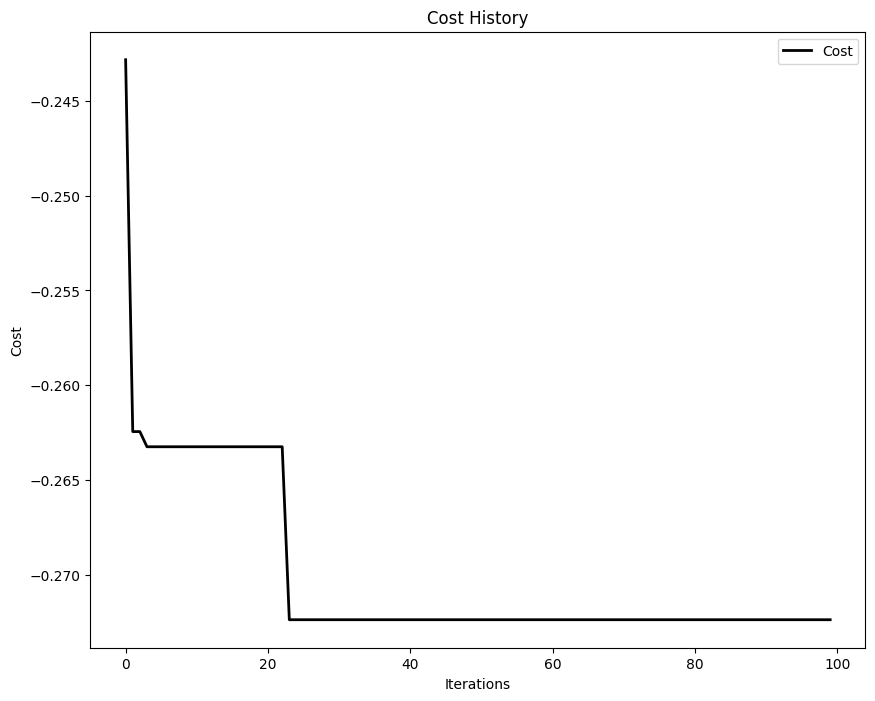

In [42]:
import numpy as np
# tesnorflow pso training
def fitness_fxn(params):
    model = Sequential([LSTM(int(params[0].any()), activation= 'tanh', input_shape=(Training_inpt_normalize.shape[1],n_features)), Dense(1)])
    model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=0.01), loss='mean_squared_error',metrics=['RootMeanSquaredError'],) 
    model.fit(Training_inpt_normalize,Training_ouput_normalize, epochs= 200, validation_data=(val_input_normalize,val_ouput_normalize), verbose=0)
    loss, accuracy=model.evaluate(testing_inpt_normalize,testing_ouput_normalize)
    return -accuracy

optimizer = ps.single.GlobalBestPSO(n_particles=400, dimensions=2, options={'c1': 2, 'c2': 2, 'w':0.9})
best_fitness, best_params = optimizer.optimize(fitness_fxn, iters=100)

print('Best fitness:', -best_fitness)
cost_history=optimizer.cost_history
# PSO graph
import numpy as np
import matplotlib.pyplot as plt
from pyswarms.utils.plotters import plot_cost_history, plot_contour, plot_surface

plot_cost_history(cost_history)
plt.show()

In [43]:
best_unit = best_params[0]
if int(best_params[0]) <=0:
    best_unit = 1
best_epoch = best_params[1]
Pso_Lstm_measles_model = Sequential([LSTM(int(best_unit), activation= 'tanh', input_shape=(Training_inpt_normalize.shape[1],n_features)), Dense(1)])
Pso_Lstm_measles_model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=0.01), loss='mean_squared_error',metrics=['RootMeanSquaredError'],) 
Pso_Lstm_measles_model.fit(Training_inpt_normalize,Training_ouput_normalize, epochs=200 ,validation_data=(val_input_normalize,val_ouput_normalize), verbose=0)
loss,accuracy=Pso_Lstm_measles_model.evaluate(testing_inpt_normalize,testing_ouput_normalize)
print("Loss:",loss)
print('Accuracy:',accuracy)

2/2 [==============================] - 0s 11ms/step - loss: 0.0603 - root_mean_squared_error: 0.2456
Loss: 0.06030198186635971
Accuracy: 0.24556462466716766


[-0.518538032428581, -0.42428669144658754, -0.28389146477549315, -0.22498437666174723, -0.25222868]
1/1 [==============================] - 0s 52ms/step
[-0.42428669144658754, -0.28389146477549315, -0.22498437666174723, -0.25222868, -0.25090924]
1/1 [==============================] - 0s 20ms/step
[-0.28389146477549315, -0.22498437666174723, -0.25222868, -0.25090924, -0.2431178]
1/1 [==============================] - 0s 21ms/step
[-0.22498437666174723, -0.25222868, -0.25090924, -0.2431178, -0.23697834]
1/1 [==============================] - 0s 21ms/step
[-0.25222868, -0.25090924, -0.2431178, -0.23697834, -0.23127565]
1/1 [==============================] - 0s 41ms/step
[-0.25090924, -0.2431178, -0.23697834, -0.23127565, -0.22573283]
1/1 [==============================] - 0s 36ms/step
[-0.2431178, -0.23697834, -0.23127565, -0.22573283, -0.2201823]
1/1 [==============================] - 0s 38ms/step
[-0.23697834, -0.23127565, -0.22573283, -0.2201823, -0.21464574]
1/1 [======================

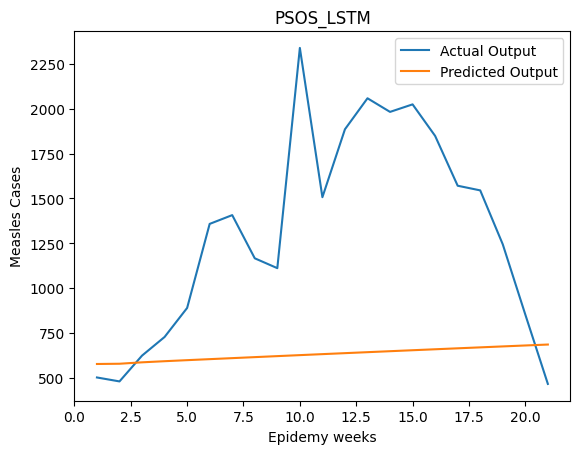

In [44]:
# Extract Predicted Vaalue for gradient Base LSTM for Longterm visuals

x_input = testing_inpt_normalize[0]
temp_input = list(x_input.ravel())

lst_output = []
i = 0
while i < 21:
    if len(temp_input) > 5:
        print(temp_input[1:])
        x_input = array(temp_input[1:])
        x_input= x_input = x_input.reshape((1,x_input.shape[0],n_features))
        yhat = Pso_Lstm_measles_model.predict(x_input, verbose=1)
        
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        lst_output.append(yhat[0][0])
        i += 1
    else:
        x_input= x_input = x_input.reshape((1,x_input.shape[0],n_features))
        yhat = Pso_Lstm_measles_model.predict(x_input, verbose=0)
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i += 1

test_data = np.array(testing_ouput_normalize[:21])
Actual_data = test_data * sd + mn
predict_data = np.array(lst_output) * sd + mn

print("Actual output: ", Actual_data)
print("Predicted output: ", predict_data)
epi_weeks= np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21],dtype=int)

plt.plot(epi_weeks,Actual_data, label='Actual Output')
plt.plot(epi_weeks,predict_data, label='Predicted Output')
plt.xlabel('Epidemy weeks')
plt.ylabel('Measles Cases')
plt.title("PSOS_LSTM")
plt.legend()
plt.show()


In [53]:
test_data_20weeks['PSOS_LSTM']=predict_data
test_data_20weeks

,Year,Week,cases,incidence_per_100000,CCC,epi_stages,GS_LSTM,PSOS_LSTM
0,1964,1,501.0,0.92,167,Initial,491.881592,693.560974
1,1964,2,479.0,1.68,472,Initial,577.724548,771.458496
2,1964,3,623.0,2.21,873,Initial,628.934143,860.247009
3,1964,4,727.0,3.00,1417,Pre-peak,659.983154,944.358826
4,1964,5,889.0,3.33,2021,Pre-peak,716.803711,1040.361572
5,1964,6,1358.0,2.76,2522,Pre-peak,804.161316,1137.686523
6,1964,7,1407.0,2.64,3001,Pre-peak,884.275513,1241.872925
7,1964,8,1166.0,3.43,3624,Pre-peak,976.059692,1347.506836
8,1964,9,1111.0,4.01,4351,Pre-peak,1070.107910,1454.683594
9,1964,10,2340.0,4.90,5240,Pre-peak,1147.095703,1554.809204


2023-05-01 15:40:48,155 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 2, 'w': 0.9}
pyswarms.single.global_best:   0%|                                                                               |0/100

2/2 [==============================] - 0s 10ms/step - loss: 0.0650 - root_mean_squared_error: 0.2549


pyswarms.single.global_best:   1%|▌                                                             |1/100, best_cost=-.255

2/2 [==============================] - 0s 265ms/step - loss: 0.0668 - root_mean_squared_error: 0.2584


pyswarms.single.global_best:   2%|█▏                                                            |2/100, best_cost=-.258

2/2 [==============================] - 0s 8ms/step - loss: 0.0697 - root_mean_squared_error: 0.2640


pyswarms.single.global_best:   3%|█▊                                                            |3/100, best_cost=-.264

2/2 [==============================] - 0s 11ms/step - loss: 0.0638 - root_mean_squared_error: 0.2525


pyswarms.single.global_best:   4%|██▍                                                           |4/100, best_cost=-.264

2/2 [==============================] - 0s 10ms/step - loss: 0.0660 - root_mean_squared_error: 0.2569


pyswarms.single.global_best:   5%|███                                                           |5/100, best_cost=-.264

2/2 [==============================] - 0s 9ms/step - loss: 0.0657 - root_mean_squared_error: 0.2563


pyswarms.single.global_best:   6%|███▋                                                          |6/100, best_cost=-.264

2/2 [==============================] - 0s 4ms/step - loss: 0.0632 - root_mean_squared_error: 0.2513


pyswarms.single.global_best:   7%|████▎                                                         |7/100, best_cost=-.264

2/2 [==============================] - 0s 9ms/step - loss: 0.0641 - root_mean_squared_error: 0.2532


pyswarms.single.global_best:   8%|████▉                                                         |8/100, best_cost=-.264

2/2 [==============================] - 0s 10ms/step - loss: 0.0722 - root_mean_squared_error: 0.2687


pyswarms.single.global_best:   9%|█████▌                                                        |9/100, best_cost=-.269

2/2 [==============================] - 0s 11ms/step - loss: 0.0647 - root_mean_squared_error: 0.2543


pyswarms.single.global_best:  10%|██████                                                       |10/100, best_cost=-.269

2/2 [==============================] - 0s 8ms/step - loss: 0.0655 - root_mean_squared_error: 0.2560


pyswarms.single.global_best:  11%|██████▋                                                      |11/100, best_cost=-.269

2/2 [==============================] - 0s 9ms/step - loss: 0.0669 - root_mean_squared_error: 0.2586


pyswarms.single.global_best:  12%|███████▎                                                     |12/100, best_cost=-.269

2/2 [==============================] - 0s 12ms/step - loss: 0.0658 - root_mean_squared_error: 0.2566


pyswarms.single.global_best:  13%|███████▉                                                     |13/100, best_cost=-.269

2/2 [==============================] - 0s 10ms/step - loss: 0.0691 - root_mean_squared_error: 0.2629


pyswarms.single.global_best:  14%|████████▌                                                    |14/100, best_cost=-.269

2/2 [==============================] - 0s 9ms/step - loss: 0.0679 - root_mean_squared_error: 0.2606


pyswarms.single.global_best:  15%|█████████▏                                                   |15/100, best_cost=-.269

2/2 [==============================] - 0s 14ms/step - loss: 0.0665 - root_mean_squared_error: 0.2579


pyswarms.single.global_best:  16%|█████████▊                                                   |16/100, best_cost=-.269

2/2 [==============================] - 0s 13ms/step - loss: 0.0659 - root_mean_squared_error: 0.2566


pyswarms.single.global_best:  17%|██████████▎                                                  |17/100, best_cost=-.269

2/2 [==============================] - 0s 11ms/step - loss: 0.0470 - root_mean_squared_error: 0.2168


pyswarms.single.global_best:  18%|██████████▉                                                  |18/100, best_cost=-.269

2/2 [==============================] - 0s 8ms/step - loss: 0.0727 - root_mean_squared_error: 0.2697


pyswarms.single.global_best:  19%|███████████▊                                                  |19/100, best_cost=-.27

2/2 [==============================] - 0s 10ms/step - loss: 0.0709 - root_mean_squared_error: 0.2664


pyswarms.single.global_best:  20%|████████████▍                                                 |20/100, best_cost=-.27

2/2 [==============================] - 0s 5ms/step - loss: 0.0647 - root_mean_squared_error: 0.2544


pyswarms.single.global_best:  21%|█████████████                                                 |21/100, best_cost=-.27

2/2 [==============================] - 0s 11ms/step - loss: 0.0673 - root_mean_squared_error: 0.2595


pyswarms.single.global_best:  22%|█████████████▋                                                |22/100, best_cost=-.27

2/2 [==============================] - 0s 10ms/step - loss: 0.0631 - root_mean_squared_error: 0.2512


pyswarms.single.global_best:  23%|██████████████▎                                               |23/100, best_cost=-.27

2/2 [==============================] - 0s 9ms/step - loss: 0.0664 - root_mean_squared_error: 0.2577


pyswarms.single.global_best:  24%|██████████████▉                                               |24/100, best_cost=-.27

2/2 [==============================] - 0s 5ms/step - loss: 0.0734 - root_mean_squared_error: 0.2710


pyswarms.single.global_best:  25%|███████████████▎                                             |25/100, best_cost=-.271

2/2 [==============================] - 0s 9ms/step - loss: 0.0616 - root_mean_squared_error: 0.2482


pyswarms.single.global_best:  26%|███████████████▊                                             |26/100, best_cost=-.271

2/2 [==============================] - 0s 10ms/step - loss: 0.0664 - root_mean_squared_error: 0.2576


pyswarms.single.global_best:  27%|████████████████▍                                            |27/100, best_cost=-.271

2/2 [==============================] - 0s 7ms/step - loss: 0.0640 - root_mean_squared_error: 0.2530


pyswarms.single.global_best:  28%|█████████████████                                            |28/100, best_cost=-.271

2/2 [==============================] - 0s 12ms/step - loss: 0.0633 - root_mean_squared_error: 0.2515


pyswarms.single.global_best:  29%|█████████████████▋                                           |29/100, best_cost=-.271

2/2 [==============================] - 0s 5ms/step - loss: 0.0733 - root_mean_squared_error: 0.2708


pyswarms.single.global_best:  30%|██████████████████▎                                          |30/100, best_cost=-.271

2/2 [==============================] - 0s 5ms/step - loss: 0.0628 - root_mean_squared_error: 0.2505


pyswarms.single.global_best:  31%|██████████████████▉                                          |31/100, best_cost=-.271

2/2 [==============================] - 0s 10ms/step - loss: 0.0701 - root_mean_squared_error: 0.2647


pyswarms.single.global_best:  32%|███████████████████▌                                         |32/100, best_cost=-.271

2/2 [==============================] - 0s 6ms/step - loss: 0.0672 - root_mean_squared_error: 0.2593


pyswarms.single.global_best:  33%|████████████████████▏                                        |33/100, best_cost=-.271

2/2 [==============================] - 0s 9ms/step - loss: 0.0660 - root_mean_squared_error: 0.2569


pyswarms.single.global_best:  34%|████████████████████▋                                        |34/100, best_cost=-.271

2/2 [==============================] - 0s 8ms/step - loss: 0.0676 - root_mean_squared_error: 0.2599


pyswarms.single.global_best:  35%|█████████████████████▎                                       |35/100, best_cost=-.271

2/2 [==============================] - 0s 6ms/step - loss: 0.0613 - root_mean_squared_error: 0.2475


pyswarms.single.global_best:  36%|█████████████████████▉                                       |36/100, best_cost=-.271

2/2 [==============================] - 0s 10ms/step - loss: 0.0637 - root_mean_squared_error: 0.2523


pyswarms.single.global_best:  37%|██████████████████████▌                                      |37/100, best_cost=-.271

2/2 [==============================] - 0s 9ms/step - loss: 0.0668 - root_mean_squared_error: 0.2585


pyswarms.single.global_best:  38%|███████████████████████▏                                     |38/100, best_cost=-.271

2/2 [==============================] - 0s 9ms/step - loss: 0.0665 - root_mean_squared_error: 0.2579


pyswarms.single.global_best:  39%|███████████████████████▊                                     |39/100, best_cost=-.271

2/2 [==============================] - 0s 7ms/step - loss: 0.0665 - root_mean_squared_error: 0.2579


pyswarms.single.global_best:  40%|████████████████████████▍                                    |40/100, best_cost=-.271

2/2 [==============================] - 0s 7ms/step - loss: 0.0661 - root_mean_squared_error: 0.2571


pyswarms.single.global_best:  41%|█████████████████████████                                    |41/100, best_cost=-.271

2/2 [==============================] - 0s 10ms/step - loss: 0.0716 - root_mean_squared_error: 0.2676


pyswarms.single.global_best:  42%|█████████████████████████▌                                   |42/100, best_cost=-.271

2/2 [==============================] - 0s 11ms/step - loss: 0.0657 - root_mean_squared_error: 0.2563


pyswarms.single.global_best:  43%|██████████████████████████▏                                  |43/100, best_cost=-.271

2/2 [==============================] - 0s 8ms/step - loss: 0.0723 - root_mean_squared_error: 0.2688


pyswarms.single.global_best:  44%|██████████████████████████▊                                  |44/100, best_cost=-.271

2/2 [==============================] - 0s 8ms/step - loss: 0.0674 - root_mean_squared_error: 0.2596


pyswarms.single.global_best:  45%|███████████████████████████▍                                 |45/100, best_cost=-.271

2/2 [==============================] - 0s 6ms/step - loss: 0.0650 - root_mean_squared_error: 0.2550


pyswarms.single.global_best:  46%|████████████████████████████                                 |46/100, best_cost=-.271

2/2 [==============================] - 0s 8ms/step - loss: 0.0621 - root_mean_squared_error: 0.2492


pyswarms.single.global_best:  47%|████████████████████████████▋                                |47/100, best_cost=-.271

2/2 [==============================] - 0s 6ms/step - loss: 0.0620 - root_mean_squared_error: 0.2489


pyswarms.single.global_best:  48%|█████████████████████████████▎                               |48/100, best_cost=-.271

2/2 [==============================] - 0s 10ms/step - loss: 0.0640 - root_mean_squared_error: 0.2530


pyswarms.single.global_best:  49%|█████████████████████████████▉                               |49/100, best_cost=-.271

2/2 [==============================] - 0s 7ms/step - loss: 0.0656 - root_mean_squared_error: 0.2561


pyswarms.single.global_best:  50%|██████████████████████████████▌                              |50/100, best_cost=-.271

2/2 [==============================] - 0s 8ms/step - loss: 0.0754 - root_mean_squared_error: 0.2746


pyswarms.single.global_best:  51%|███████████████████████████████                              |51/100, best_cost=-.275

2/2 [==============================] - 0s 9ms/step - loss: 0.0619 - root_mean_squared_error: 0.2488


pyswarms.single.global_best:  52%|███████████████████████████████▋                             |52/100, best_cost=-.275

2/2 [==============================] - 0s 10ms/step - loss: 0.0652 - root_mean_squared_error: 0.2554


pyswarms.single.global_best:  53%|████████████████████████████████▎                            |53/100, best_cost=-.275

2/2 [==============================] - 0s 5ms/step - loss: 0.0668 - root_mean_squared_error: 0.2584


pyswarms.single.global_best:  54%|████████████████████████████████▉                            |54/100, best_cost=-.275

2/2 [==============================] - 0s 10ms/step - loss: 0.0695 - root_mean_squared_error: 0.2635


pyswarms.single.global_best:  55%|█████████████████████████████████▌                           |55/100, best_cost=-.275

2/2 [==============================] - 0s 6ms/step - loss: 0.0653 - root_mean_squared_error: 0.2556


pyswarms.single.global_best:  56%|██████████████████████████████████▏                          |56/100, best_cost=-.275

2/2 [==============================] - 0s 7ms/step - loss: 0.0635 - root_mean_squared_error: 0.2521


pyswarms.single.global_best:  57%|██████████████████████████████████▊                          |57/100, best_cost=-.275

2/2 [==============================] - 0s 11ms/step - loss: 0.0674 - root_mean_squared_error: 0.2597


pyswarms.single.global_best:  58%|███████████████████████████████████▍                         |58/100, best_cost=-.275

2/2 [==============================] - 0s 12ms/step - loss: 0.0620 - root_mean_squared_error: 0.2491


pyswarms.single.global_best:  59%|███████████████████████████████████▉                         |59/100, best_cost=-.275

2/2 [==============================] - 0s 9ms/step - loss: 0.0720 - root_mean_squared_error: 0.2683


pyswarms.single.global_best:  60%|████████████████████████████████████▌                        |60/100, best_cost=-.275

2/2 [==============================] - 0s 7ms/step - loss: 0.0684 - root_mean_squared_error: 0.2616


pyswarms.single.global_best:  61%|█████████████████████████████████████▏                       |61/100, best_cost=-.275

2/2 [==============================] - 0s 9ms/step - loss: 0.0630 - root_mean_squared_error: 0.2510


pyswarms.single.global_best:  62%|█████████████████████████████████████▊                       |62/100, best_cost=-.275

2/2 [==============================] - 0s 11ms/step - loss: 0.0656 - root_mean_squared_error: 0.2561


pyswarms.single.global_best:  63%|██████████████████████████████████████▍                      |63/100, best_cost=-.275

2/2 [==============================] - 0s 12ms/step - loss: 0.0630 - root_mean_squared_error: 0.2509


pyswarms.single.global_best:  64%|███████████████████████████████████████                      |64/100, best_cost=-.275

2/2 [==============================] - 0s 8ms/step - loss: 0.0644 - root_mean_squared_error: 0.2538


pyswarms.single.global_best:  65%|███████████████████████████████████████▋                     |65/100, best_cost=-.275

2/2 [==============================] - 0s 9ms/step - loss: 0.0737 - root_mean_squared_error: 0.2715


pyswarms.single.global_best:  66%|████████████████████████████████████████▎                    |66/100, best_cost=-.275

2/2 [==============================] - 0s 5ms/step - loss: 0.0630 - root_mean_squared_error: 0.2510


pyswarms.single.global_best:  67%|████████████████████████████████████████▊                    |67/100, best_cost=-.275

2/2 [==============================] - 0s 8ms/step - loss: 0.0715 - root_mean_squared_error: 0.2674


pyswarms.single.global_best:  68%|█████████████████████████████████████████▍                   |68/100, best_cost=-.275

2/2 [==============================] - 0s 10ms/step - loss: 0.0631 - root_mean_squared_error: 0.2512


pyswarms.single.global_best:  69%|██████████████████████████████████████████                   |69/100, best_cost=-.275

2/2 [==============================] - 0s 9ms/step - loss: 0.0741 - root_mean_squared_error: 0.2722


pyswarms.single.global_best:  70%|██████████████████████████████████████████▋                  |70/100, best_cost=-.275

2/2 [==============================] - 0s 9ms/step - loss: 0.0666 - root_mean_squared_error: 0.2581


pyswarms.single.global_best:  71%|███████████████████████████████████████████▎                 |71/100, best_cost=-.275

2/2 [==============================] - 0s 8ms/step - loss: 0.0659 - root_mean_squared_error: 0.2566


pyswarms.single.global_best:  72%|███████████████████████████████████████████▉                 |72/100, best_cost=-.275

2/2 [==============================] - 0s 8ms/step - loss: 0.0683 - root_mean_squared_error: 0.2614


pyswarms.single.global_best:  73%|████████████████████████████████████████████▌                |73/100, best_cost=-.275

2/2 [==============================] - 0s 12ms/step - loss: 0.0831 - root_mean_squared_error: 0.2882


pyswarms.single.global_best:  74%|█████████████████████████████████████████████▏               |74/100, best_cost=-.288

2/2 [==============================] - 0s 10ms/step - loss: 0.0641 - root_mean_squared_error: 0.2533


pyswarms.single.global_best:  75%|█████████████████████████████████████████████▊               |75/100, best_cost=-.288

2/2 [==============================] - 0s 5ms/step - loss: 0.0602 - root_mean_squared_error: 0.2453


pyswarms.single.global_best:  76%|██████████████████████████████████████████████▎              |76/100, best_cost=-.288

2/2 [==============================] - 0s 12ms/step - loss: 0.0664 - root_mean_squared_error: 0.2576


pyswarms.single.global_best:  77%|██████████████████████████████████████████████▉              |77/100, best_cost=-.288

2/2 [==============================] - 0s 6ms/step - loss: 0.0652 - root_mean_squared_error: 0.2554


pyswarms.single.global_best:  78%|███████████████████████████████████████████████▌             |78/100, best_cost=-.288

2/2 [==============================] - 0s 10ms/step - loss: 0.0672 - root_mean_squared_error: 0.2592


pyswarms.single.global_best:  79%|████████████████████████████████████████████████▏            |79/100, best_cost=-.288

2/2 [==============================] - 0s 8ms/step - loss: 0.0662 - root_mean_squared_error: 0.2573


pyswarms.single.global_best:  80%|████████████████████████████████████████████████▊            |80/100, best_cost=-.288

2/2 [==============================] - 0s 7ms/step - loss: 0.0648 - root_mean_squared_error: 0.2546


pyswarms.single.global_best:  81%|█████████████████████████████████████████████████▍           |81/100, best_cost=-.288

2/2 [==============================] - 0s 10ms/step - loss: 0.0695 - root_mean_squared_error: 0.2637


pyswarms.single.global_best:  82%|██████████████████████████████████████████████████           |82/100, best_cost=-.288

2/2 [==============================] - 0s 10ms/step - loss: 0.0624 - root_mean_squared_error: 0.2497


pyswarms.single.global_best:  83%|██████████████████████████████████████████████████▋          |83/100, best_cost=-.288

2/2 [==============================] - 0s 8ms/step - loss: 0.0658 - root_mean_squared_error: 0.2566


pyswarms.single.global_best:  84%|███████████████████████████████████████████████████▏         |84/100, best_cost=-.288

2/2 [==============================] - 0s 6ms/step - loss: 0.0697 - root_mean_squared_error: 0.2639


pyswarms.single.global_best:  85%|███████████████████████████████████████████████████▊         |85/100, best_cost=-.288

2/2 [==============================] - 0s 11ms/step - loss: 0.0669 - root_mean_squared_error: 0.2587


pyswarms.single.global_best:  86%|████████████████████████████████████████████████████▍        |86/100, best_cost=-.288

2/2 [==============================] - 0s 12ms/step - loss: 0.0691 - root_mean_squared_error: 0.2629


pyswarms.single.global_best:  87%|█████████████████████████████████████████████████████        |87/100, best_cost=-.288

2/2 [==============================] - 0s 10ms/step - loss: 0.0660 - root_mean_squared_error: 0.2569


pyswarms.single.global_best:  88%|█████████████████████████████████████████████████████▋       |88/100, best_cost=-.288

2/2 [==============================] - 0s 6ms/step - loss: 0.0662 - root_mean_squared_error: 0.2572


pyswarms.single.global_best:  89%|██████████████████████████████████████████████████████▎      |89/100, best_cost=-.288

2/2 [==============================] - 0s 8ms/step - loss: 0.0648 - root_mean_squared_error: 0.2546


pyswarms.single.global_best:  90%|██████████████████████████████████████████████████████▉      |90/100, best_cost=-.288

2/2 [==============================] - 0s 10ms/step - loss: 0.0678 - root_mean_squared_error: 0.2604


pyswarms.single.global_best:  91%|███████████████████████████████████████████████████████▌     |91/100, best_cost=-.288

2/2 [==============================] - 0s 10ms/step - loss: 0.0625 - root_mean_squared_error: 0.2501


pyswarms.single.global_best:  92%|████████████████████████████████████████████████████████     |92/100, best_cost=-.288

2/2 [==============================] - 0s 11ms/step - loss: 0.0616 - root_mean_squared_error: 0.2483


pyswarms.single.global_best:  93%|████████████████████████████████████████████████████████▋    |93/100, best_cost=-.288

2/2 [==============================] - 0s 10ms/step - loss: 0.0624 - root_mean_squared_error: 0.2498


pyswarms.single.global_best:  94%|█████████████████████████████████████████████████████████▎   |94/100, best_cost=-.288

2/2 [==============================] - 0s 6ms/step - loss: 0.0606 - root_mean_squared_error: 0.2462


pyswarms.single.global_best:  95%|█████████████████████████████████████████████████████████▉   |95/100, best_cost=-.288

2/2 [==============================] - 0s 9ms/step - loss: 0.0630 - root_mean_squared_error: 0.2510


pyswarms.single.global_best:  96%|██████████████████████████████████████████████████████████▌  |96/100, best_cost=-.288

2/2 [==============================] - 0s 10ms/step - loss: 0.0671 - root_mean_squared_error: 0.2591


pyswarms.single.global_best:  97%|███████████████████████████████████████████████████████████▏ |97/100, best_cost=-.288

2/2 [==============================] - 0s 9ms/step - loss: 0.0634 - root_mean_squared_error: 0.2517


pyswarms.single.global_best:  98%|███████████████████████████████████████████████████████████▊ |98/100, best_cost=-.288

2/2 [==============================] - 0s 10ms/step - loss: 0.0705 - root_mean_squared_error: 0.2655


pyswarms.single.global_best:  99%|████████████████████████████████████████████████████████████▍|99/100, best_cost=-.288

2/2 [==============================] - 0s 9ms/step - loss: 0.0631 - root_mean_squared_error: 0.2512


pyswarms.single.global_best: 100%|████████████████████████████████████████████████████████████|100/100, best_cost=-.288
2023-05-01 17:34:46,547 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.28821346163749695, best pos: [-58.18484619   1.4123991 ]


Best fitness: 0.28821346163749695


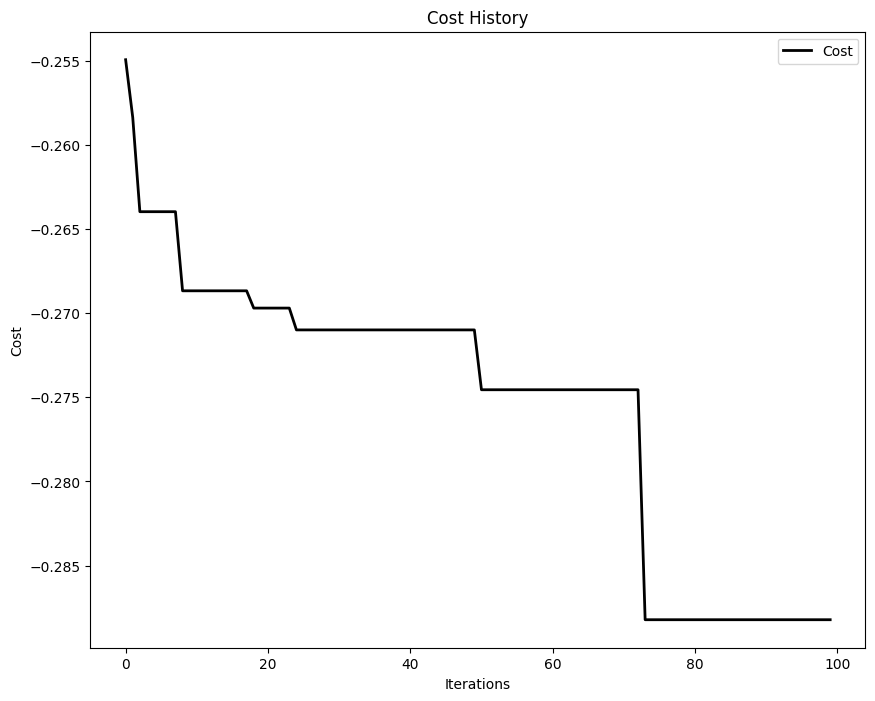

2/2 [==============================] - 0s 10ms/step - loss: 0.0636 - root_mean_squared_error: 0.2522
Loss: 0.06362738460302353
Accuracy: 0.2522446811199188
[-0.518538032428581, -0.42428669144658754, -0.28389146477549315, -0.22498437666174723, -0.32610821125701106, -0.3477074768987179, -0.2063304654257277, -0.23109178]
1/1 [==============================] - 0s 21ms/step
[-0.42428669144658754, -0.28389146477549315, -0.22498437666174723, -0.32610821125701106, -0.3477074768987179, -0.2063304654257277, -0.23109178, -0.22595277]
1/1 [==============================] - 0s 42ms/step
[-0.28389146477549315, -0.22498437666174723, -0.32610821125701106, -0.3477074768987179, -0.2063304654257277, -0.23109178, -0.22595277, -0.22141533]
1/1 [==============================] - 0s 41ms/step
[-0.22498437666174723, -0.32610821125701106, -0.3477074768987179, -0.2063304654257277, -0.23109178, -0.22595277, -0.22141533, -0.21683443]
1/1 [==============================] - 0s 20ms/step
[-0.32610821125701106, -0.34

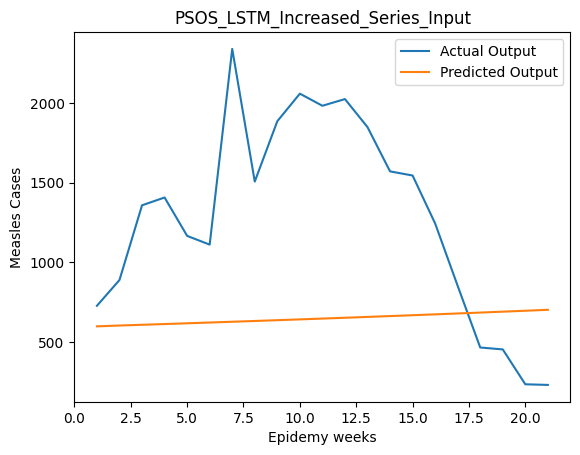

In [45]:
#Inncrease Input series time steps for psos
import keras_tuner
Training_inpt_normalize,Training_ouput_normalize = split_function( measles_epidemy_training, 8,3)
testing_inpt_normalize,testing_ouput_normalize = split_function( measles_epidemy_testing, 8,3)
val_input_normalize,val_ouput_normalize= split_function( measles_epidemy_val, 8,1)
n_features = 1
Training_inpt_normalize = Training_inpt_normalize.reshape((Training_inpt_normalize.shape[0],Training_inpt_normalize.shape[1],n_features))
testing_inpt_normalize = testing_inpt_normalize.reshape(testing_inpt_normalize.shape[0],testing_inpt_normalize.shape[1],n_features)
val_input_normalize =val_input_normalize.reshape(val_input_normalize.shape[0],val_input_normalize.shape[1],n_features)
import numpy as np
# tesnorflow pso training
def fitness_fxn(params):
    model = Sequential([LSTM(int(params[0].any()), activation= 'tanh', input_shape=(Training_inpt_normalize.shape[1],n_features)), Dense(1)])
    model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=0.01), loss='mean_squared_error',metrics=['RootMeanSquaredError'],) 
    model.fit(Training_inpt_normalize,Training_ouput_normalize, epochs= 200, validation_data=(val_input_normalize,val_ouput_normalize), verbose=0)
    loss, accuracy=model.evaluate(testing_inpt_normalize,testing_ouput_normalize)
    return -accuracy

optimizer = ps.single.GlobalBestPSO(n_particles=400, dimensions=2, options={'c1': 2, 'c2': 2, 'w':0.9})
best_fitness, best_params = optimizer.optimize(fitness_fxn, iters=100)

print('Best fitness:', -best_fitness)
cost_history=optimizer.cost_history
# PSO graph
import numpy as np
import matplotlib.pyplot as plt
from pyswarms.utils.plotters import plot_cost_history, plot_contour, plot_surface

plot_cost_history(cost_history)
plt.show()
#Run Model
best_unit = best_params[0]
if int(best_params[0]) <=0:
    best_unit = 1
best_epoch = best_params[1]
Pso_Lstm_measles_model = Sequential([LSTM(int(best_unit), activation= 'tanh', input_shape=(Training_inpt_normalize.shape[1],n_features)), Dense(1)])
Pso_Lstm_measles_model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=0.01), loss='mean_squared_error',metrics=['RootMeanSquaredError'],) 
Pso_Lstm_measles_model.fit(Training_inpt_normalize,Training_ouput_normalize, epochs=200 ,validation_data=(val_input_normalize,val_ouput_normalize), verbose=0)
loss,accuracy=Pso_Lstm_measles_model.evaluate(testing_inpt_normalize,testing_ouput_normalize)
print("Loss:",loss)
print('Accuracy:',accuracy)

# Extract Predicted Vaalue for gradient Base LSTM for Longterm visuals

x_input = testing_inpt_normalize[0]
temp_input = list(x_input.ravel())

lst_output = []
i = 0
while i < 21:
    if len(temp_input) > 8:
        print(temp_input[1:])
        x_input = array(temp_input[1:])
        x_input= x_input = x_input.reshape((1,x_input.shape[0],n_features))
        yhat = Pso_Lstm_measles_model.predict(x_input, verbose=1)
        
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        lst_output.append(yhat[0][0])
        i += 1
    else:
        x_input= x_input = x_input.reshape((1,x_input.shape[0],n_features))
        yhat = Pso_Lstm_measles_model.predict(x_input, verbose=0)
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i += 1

test_data = np.array(testing_ouput_normalize[:21])
Actual_data = test_data * sd + mn
predict_data = np.array(lst_output) * sd + mn

print("Actual output: ", Actual_data)
print("Predicted output: ", predict_data)
epi_weeks= np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21],dtype=int)

plt.plot(epi_weeks,Actual_data, label='Actual Output')
plt.plot(epi_weeks,predict_data, label='Predicted Output')
plt.xlabel('Epidemy weeks')
plt.ylabel('Measles Cases')
plt.title("PSOS_LSTM_Increased_Series_Input")
plt.legend()
plt.show()

2023-04-05 12:16:55,071 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 2, 'w': 0.9}
pyswarms.single.global_best:   0%|                                                             |0/100, best_cost=-1e+10

2/2 [==============================] - 0s 9ms/step - loss: 0.5399 - root_mean_squared_error: 0.7168


pyswarms.single.global_best:   4%|██▍                                                          |4/100, best_cost=-1e+10

2/2 [==============================] - 0s 6ms/step - loss: 0.5172 - root_mean_squared_error: 0.7077


pyswarms.single.global_best:  17%|██████████▏                                                 |17/100, best_cost=-1e+10

2/2 [==============================] - 0s 8ms/step - loss: 0.5177 - root_mean_squared_error: 0.7079


pyswarms.single.global_best:  21%|████████████▌                                               |21/100, best_cost=-1e+10

2/2 [==============================] - 0s 7ms/step - loss: 0.5111 - root_mean_squared_error: 0.7054


pyswarms.single.global_best:  25%|███████████████                                             |25/100, best_cost=-1e+10

2/2 [==============================] - 0s 27ms/step - loss: 0.5092 - root_mean_squared_error: 0.7045


pyswarms.single.global_best:  28%|████████████████▊                                           |28/100, best_cost=-1e+10

2/2 [==============================] - 0s 15ms/step - loss: 0.5064 - root_mean_squared_error: 0.7035


pyswarms.single.global_best:  29%|█████████████████▍                                          |29/100, best_cost=-1e+10

2/2 [==============================] - 0s 9ms/step - loss: 0.5147 - root_mean_squared_error: 0.7071


pyswarms.single.global_best:  32%|███████████████████▏                                        |32/100, best_cost=-1e+10

2/2 [==============================] - 0s 9ms/step - loss: 0.5120 - root_mean_squared_error: 0.7058


pyswarms.single.global_best:  33%|███████████████████▊                                        |33/100, best_cost=-1e+10

2/2 [==============================] - 0s 9ms/step - loss: 0.5101 - root_mean_squared_error: 0.7051


pyswarms.single.global_best:  36%|█████████████████████▌                                      |36/100, best_cost=-1e+10

2/2 [==============================] - 0s 6ms/step - loss: 0.5091 - root_mean_squared_error: 0.7048


pyswarms.single.global_best:  39%|███████████████████████▍                                    |39/100, best_cost=-1e+10

2/2 [==============================] - 0s 9ms/step - loss: 0.5095 - root_mean_squared_error: 0.7048


pyswarms.single.global_best:  40%|████████████████████████                                    |40/100, best_cost=-1e+10

2/2 [==============================] - 0s 6ms/step - loss: 0.5063 - root_mean_squared_error: 0.7035


pyswarms.single.global_best:  44%|██████████████████████████▍                                 |44/100, best_cost=-1e+10

2/2 [==============================] - 0s 6ms/step - loss: 0.5165 - root_mean_squared_error: 0.7075


pyswarms.single.global_best:  45%|███████████████████████████                                 |45/100, best_cost=-1e+10

2/2 [==============================] - 0s 11ms/step - loss: 0.5113 - root_mean_squared_error: 0.7056


pyswarms.single.global_best:  48%|████████████████████████████▊                               |48/100, best_cost=-1e+10

2/2 [==============================] - 0s 7ms/step - loss: 0.5109 - root_mean_squared_error: 0.7054


pyswarms.single.global_best:  49%|█████████████████████████████▍                              |49/100, best_cost=-1e+10

2/2 [==============================] - 0s 9ms/step - loss: 0.5131 - root_mean_squared_error: 0.7064


pyswarms.single.global_best:  52%|███████████████████████████████▏                            |52/100, best_cost=-1e+10

2/2 [==============================] - 0s 10ms/step - loss: 0.5098 - root_mean_squared_error: 0.7049


pyswarms.single.global_best:  53%|███████████████████████████████▊                            |53/100, best_cost=-1e+10

2/2 [==============================] - 0s 10ms/step - loss: 0.5096 - root_mean_squared_error: 0.7048


pyswarms.single.global_best:  56%|█████████████████████████████████▌                          |56/100, best_cost=-1e+10

2/2 [==============================] - 0s 9ms/step - loss: 0.5175 - root_mean_squared_error: 0.7080


pyswarms.single.global_best:  57%|██████████████████████████████████▏                         |57/100, best_cost=-1e+10

2/2 [==============================] - 0s 11ms/step - loss: 0.5108 - root_mean_squared_error: 0.7053


pyswarms.single.global_best:  59%|███████████████████████████████████▍                        |59/100, best_cost=-1e+10

2/2 [==============================] - 0s 8ms/step - loss: 0.5125 - root_mean_squared_error: 0.7062


pyswarms.single.global_best:  60%|████████████████████████████████████                        |60/100, best_cost=-1e+10

2/2 [==============================] - 0s 12ms/step - loss: 0.5115 - root_mean_squared_error: 0.7055


pyswarms.single.global_best:  63%|█████████████████████████████████████▊                      |63/100, best_cost=-1e+10

2/2 [==============================] - 0s 11ms/step - loss: 0.5067 - root_mean_squared_error: 0.7037


pyswarms.single.global_best:  64%|██████████████████████████████████████▍                     |64/100, best_cost=-1e+10

2/2 [==============================] - 0s 5ms/step - loss: 0.5089 - root_mean_squared_error: 0.7045


pyswarms.single.global_best:  66%|███████████████████████████████████████▌                    |66/100, best_cost=-1e+10

2/2 [==============================] - 0s 9ms/step - loss: 0.5079 - root_mean_squared_error: 0.7041


pyswarms.single.global_best:  67%|████████████████████████████████████████▏                   |67/100, best_cost=-1e+10

2/2 [==============================] - 0s 13ms/step - loss: 0.5090 - root_mean_squared_error: 0.7046


pyswarms.single.global_best:  72%|███████████████████████████████████████████▏                |72/100, best_cost=-1e+10

2/2 [==============================] - 0s 81ms/step - loss: 0.5101 - root_mean_squared_error: 0.7051


pyswarms.single.global_best:  73%|███████████████████████████████████████████▊                |73/100, best_cost=-1e+10

2/2 [==============================] - 0s 7ms/step - loss: 0.5082 - root_mean_squared_error: 0.7042


pyswarms.single.global_best:  75%|█████████████████████████████████████████████               |75/100, best_cost=-1e+10

2/2 [==============================] - 0s 9ms/step - loss: 0.5099 - root_mean_squared_error: 0.7049


pyswarms.single.global_best:  76%|█████████████████████████████████████████████▌              |76/100, best_cost=-1e+10

2/2 [==============================] - 0s 13ms/step - loss: 0.5047 - root_mean_squared_error: 0.7032


pyswarms.single.global_best:  80%|████████████████████████████████████████████████            |80/100, best_cost=-1e+10

2/2 [==============================] - 0s 148ms/step - loss: 0.5115 - root_mean_squared_error: 0.7055


pyswarms.single.global_best:  83%|█████████████████████████████████████████████████▊          |83/100, best_cost=-1e+10

2/2 [==============================] - 0s 13ms/step - loss: 0.5069 - root_mean_squared_error: 0.7039


pyswarms.single.global_best:  84%|██████████████████████████████████████████████████▍         |84/100, best_cost=-1e+10

2/2 [==============================] - 0s 13ms/step - loss: 0.5047 - root_mean_squared_error: 0.7030


pyswarms.single.global_best:  87%|████████████████████████████████████████████████████▏       |87/100, best_cost=-1e+10

2/2 [==============================] - 0s 15ms/step - loss: 0.5132 - root_mean_squared_error: 0.7061


pyswarms.single.global_best:  88%|████████████████████████████████████████████████████▊       |88/100, best_cost=-1e+10

2/2 [==============================] - 0s 10ms/step - loss: 0.5067 - root_mean_squared_error: 0.7038


pyswarms.single.global_best:  92%|███████████████████████████████████████████████████████▏    |92/100, best_cost=-1e+10

2/2 [==============================] - 0s 9ms/step - loss: 0.5106 - root_mean_squared_error: 0.7051


pyswarms.single.global_best:  93%|███████████████████████████████████████████████████████▊    |93/100, best_cost=-1e+10

2/2 [==============================] - 0s 14ms/step - loss: 0.5121 - root_mean_squared_error: 0.7057


pyswarms.single.global_best:  96%|█████████████████████████████████████████████████████████▌  |96/100, best_cost=-1e+10

2/2 [==============================] - 0s 37ms/step - loss: 0.5027 - root_mean_squared_error: 0.7023


pyswarms.single.global_best:  97%|██████████████████████████████████████████████████████████▏ |97/100, best_cost=-1e+10

2/2 [==============================] - 0s 21ms/step - loss: 0.5139 - root_mean_squared_error: 0.7064


pyswarms.single.global_best: 100%|███████████████████████████████████████████████████████████|100/100, best_cost=-1e+10
2023-04-05 14:36:44,115 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -10000000000.0, best pos: [0.08906468 0.75109403]


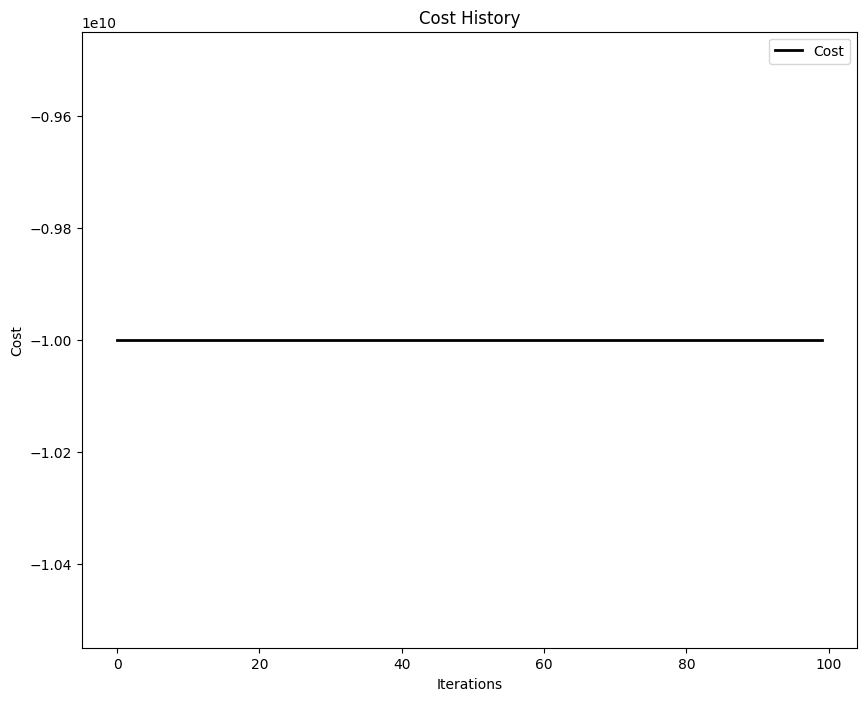

In [98]:
# PSO Trained Multi-layered LSTM 
def create_multiLayered_model(n_layers, n_units):
    
    model = Sequential()
    
    for i in range(n_layers.size-1):
        if i == 0:
            units = int(n_units[i])
        else:
            units = int(n_units[i-1])
            print('Unit',units)
        if len(n_units) < n_layers.size-1 or units <= 0 :
            return None
        model.add(LSTM(units,return_sequences=True,  activation='tanh', input_shape=(Training_inpt_normalize.shape[1],n_features)))
    model.add(Dense(1))
    model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=0.0001), loss='mean_squared_error',metrics=['RootMeanSquaredError'],) 
    return model
def fitness_fxn(params):
    if len(params) == 1:
        n_layers, n_units = params[0].astype(int), np.array([])
    else:
        n_layers, n_units = params[0].astype(int), np.ravel(params[1:])
    
    multi_layer_lstm = create_multiLayered_model(n_layers, n_units)
    if multi_layer_lstm is None:
        return -1e10
    history= multi_layer_lstm.fit(Training_inpt_normalize,Training_ouput_normalize, epochs=300 , validation_data=(val_input_normalize,val_ouput_normalize), verbose=0)
    loss,accuracy=multi_layer_lstm.evaluate(testing_inpt_normalize,testing_ouput_normalize)
    return -accuracy

search_space = {
    'n_layers': (1, 5),
    'n_units': ((2, 150),)*2
}

optimizer = ps.single.GlobalBestPSO(n_particles=2000, dimensions=2, options={'c1': 2, 'c2': 2, 'w':0.9})
best_fitness, *best_params = optimizer.optimize(fitness_fxn, iters=100)

cost_history=optimizer.cost_history
# PSO graph
import numpy as np
import matplotlib.pyplot as plt
from pyswarms.utils.plotters import plot_cost_history, plot_contour, plot_surface

plot_cost_history(cost_history)
plt.show()


In [99]:

layers, units = best_params[0].astype(int)
if layers <=0 :
    layers=1
if units<=0:
    units=1

print('l:', layers) 
print('u:', units)

l: 1
u: 1


In [100]:

model = Sequential()
model.add(LSTM(30,return_sequences=True,  activation='tanh', input_shape=(Training_inpt_normalize.shape[1],n_features)))
model.add(LSTM(units,return_sequences=True,  activation='tanh'))
model.add(Dense(1))        
    
model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=0.0001), loss='mean_squared_error',metrics=['RootMeanSquaredError'],) 
model.fit(Training_inpt_normalize,Training_ouput_normalize, epochs=100 , validation_split=0.2, verbose=0)
loss,accuracy=model.evaluate(testing_inpt_normalize,testing_ouput_normalize)
print("Loss:",loss)
print('Accuracy:',accuracy)

2/2 [==============================] - 0s 14ms/step - loss: 0.5140 - root_mean_squared_error: 0.7066
Loss: 0.5139599442481995
Accuracy: 0.7065757513046265


2023-04-06 18:23:21,397 - pyswarms.single.global_best - INFO - Optimize for 10 iters with {'c1': 2, 'c2': 2, 'w': 0.9}
pyswarms.single.global_best:   0%|                                                                                |0/10

2/2 [==============================] - 0s 8ms/step - loss: 0.5329 - root_mean_squared_error: 0.7300


pyswarms.single.global_best:  10%|██████▍                                                         |1/10, best_cost=-.73

2/2 [==============================] - 0s 7ms/step - loss: 0.0870 - root_mean_squared_error: 0.2949


pyswarms.single.global_best:  20%|████████████▊                                                   |2/10, best_cost=-.73

2/2 [==============================] - 0s 5ms/step - loss: 0.5292 - root_mean_squared_error: 0.7275


pyswarms.single.global_best:  30%|███████████████████▏                                            |3/10, best_cost=-.73

2/2 [==============================] - 0s 6ms/step - loss: 0.5350 - root_mean_squared_error: 0.7315


pyswarms.single.global_best:  40%|█████████████████████████▏                                     |4/10, best_cost=-.731

2/2 [==============================] - 0s 5ms/step - loss: 0.0725 - root_mean_squared_error: 0.2693


pyswarms.single.global_best:  50%|███████████████████████████████▌                               |5/10, best_cost=-.731

2/2 [==============================] - 0s 6ms/step - loss: 0.5320 - root_mean_squared_error: 0.7294


pyswarms.single.global_best:  60%|█████████████████████████████████████▊                         |6/10, best_cost=-.731

2/2 [==============================] - 0s 7ms/step - loss: 0.5257 - root_mean_squared_error: 0.7251


pyswarms.single.global_best:  70%|████████████████████████████████████████████                   |7/10, best_cost=-.731

2/2 [==============================] - 0s 7ms/step - loss: 0.5264 - root_mean_squared_error: 0.7255


pyswarms.single.global_best:  80%|██████████████████████████████████████████████████▍            |8/10, best_cost=-.731

2/2 [==============================] - 0s 7ms/step - loss: 0.5303 - root_mean_squared_error: 0.7282


pyswarms.single.global_best:  90%|████████████████████████████████████████████████████████▋      |9/10, best_cost=-.731

2/2 [==============================] - 0s 12ms/step - loss: 0.5287 - root_mean_squared_error: 0.7271


pyswarms.single.global_best: 100%|██████████████████████████████████████████████████████████████|10/10, best_cost=-.731
2023-04-06 18:28:43,410 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.7314519286155701, best pos: [0.13003167 0.50894684]


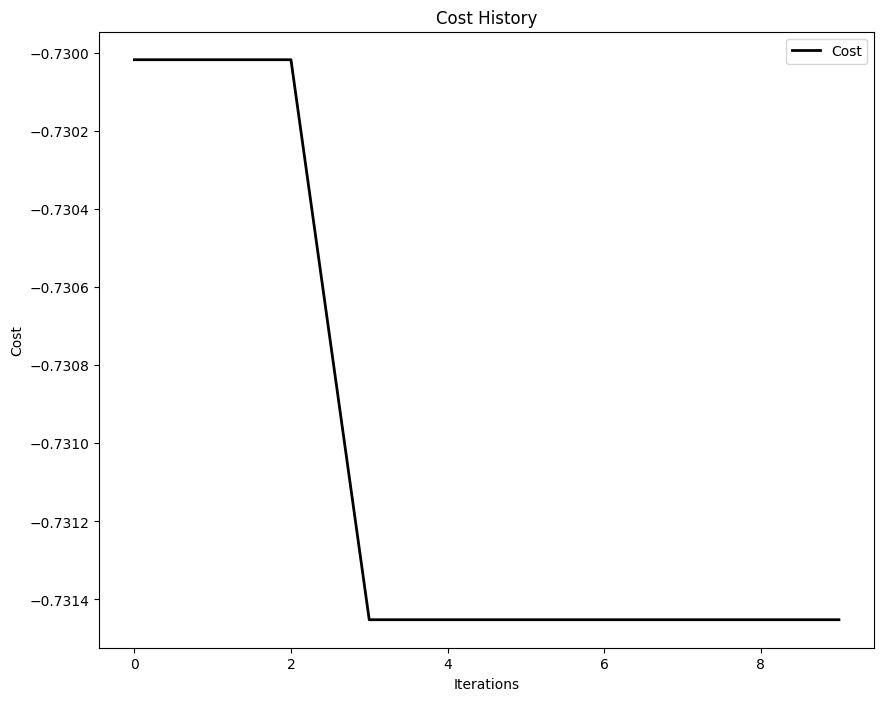

In [48]:
#PSO Trained Ensembled CNN-LSTM
n_seq = 2
n_step= 2
n_features = 1
Training_inpt_normalize =Training_inpt_normalize.reshape((Training_inpt_normalize.shape[0],n_seq,n_step,n_features))
testing_inpt_normalize = testing_inpt_normalize.reshape(testing_inpt_normalize.shape[0],n_seq,n_step,n_features)
def cnn_lstm_model(filters,units):
    
    model = Sequential()
    model.add(TimeDistributed(Conv1D(filters=filters, kernel_size=1, activation='relu', input_shape=(None, n_step, n_features))))
    model.add(TimeDistributed(MaxPooling1D(pool_size=2)))
    model.add(TimeDistributed(Flatten()))
    model.add(LSTM(units, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=0.001), loss= 'mean_squared_error',metrics=['RootMeanSquaredError'],) 
    return model
def fitness_fxn(params):
    filters,units = params[0].astype(int)
    if filters <= 0:
        filters=1
    if units<=0:
        units=1
    Pso_ensemble_lstm=cnn_lstm_model(filters,units)
    history= Pso_ensemble_lstm.fit(Training_inpt_normalize,Training_ouput_normalize, epochs=200 , validation_split=0.2, verbose=0)
    loss,accuracy=Pso_ensemble_lstm.evaluate(testing_inpt_normalize,testing_ouput_normalize)
    return -accuracy
search_space = {
    'filters': (1, 100),
    'n_units': (2, 150)
}

optimizer = ps.single.GlobalBestPSO(n_particles=500, dimensions=2, options={'c1': 2, 'c2': 2, 'w':0.9})
best_fitness, best_params = optimizer.optimize(fitness_fxn, iters=10)

cost_history=optimizer.cost_history
# PSO graph
import numpy as np
import matplotlib.pyplot as plt
from pyswarms.utils.plotters import plot_cost_history, plot_contour, plot_surface

plot_cost_history(cost_history)
plt.show()
    
              

In [50]:
filters,units = best_params.astype(int)

if units <=0:
    units=1
model = Sequential()
model.add(TimeDistributed(Conv1D(filters=100, kernel_size=1, activation='relu', input_shape=(None, n_step, n_features))))
model.add(TimeDistributed(MaxPooling1D(pool_size=2)))
model.add(TimeDistributed(Flatten()))
model.add(LSTM(units, activation='relu'))
model.add(Dense(1))
model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=0.001), loss= 'mean_squared_error',metrics=['RootMeanSquaredError'],) 
model.fit(Training_inpt_normalize,Training_ouput_normalize, epochs=100 , validation_split=0.2, verbose=0)
loss,accuracy=model.evaluate(testing_inpt_normalize,testing_ouput_normalize)
print("Loss:",loss)
print('Accuracy:',accuracy)

2/2 [==============================] - 0s 9ms/step - loss: 0.0641 - root_mean_squared_error: 0.2531
Loss: 0.06406471878290176
Accuracy: 0.2531100809574127


In [39]:
Training_inpt_normalize,Training_ouput_normalize = split_function( measles_epidemy_training, 4,3)
testing_inpt_normalize,testing_ouput_normalize = split_function( measles_epidemy_testing, 4,3)
n_features = 1
Training_inpt_normalize = Training_inpt_normalize.reshape((Training_inpt_normalize.shape[0],Training_inpt_normalize.shape[1],n_features))
testing_inpt_normalize = testing_inpt_normalize.reshape(testing_inpt_normalize.shape[0],testing_inpt_normalize.shape[1],n_features)


[-0.6432247022693431, -0.3840335145688612, -0.33690784407786445, -0.20142154141624885] 0.030279671831151725


[-0.3840335145688612, -0.33690784407786445, -0.20142154141624885, 0.030279671831151725] 0.10784067118091717


[-0.33690784407786445, -0.20142154141624885, 0.030279671831151725, 0.10784067118091717] 0.11864030400177059


[-0.20142154141624885, 0.030279671831151725, 0.10784067118091717, 0.11864030400177059] 0.31205190997523635


[0.030279671831151725, 0.10784067118091717, 0.11864030400177059, 0.31205190997523635] 0.5889152241098421


[0.10784067118091717, 0.11864030400177059, 0.31205190997523635, 0.5889152241098421] 0.6684397930633991


[0.11864030400177059, 0.31205190997523635, 0.5889152241098421, 0.6684397930633991] 0.9541391704150668


[0.31205190997523635, 0.5889152241098421, 0.6684397930633991, 0.9541391704150668] 1.0483905113970604


[0.5889152241098421, 0.6684397930633991, 0.9541391704150668, 1.0483905113970604] 1.3154359775127085


[0.6684397930633991, 0.9541391704150668,

In [41]:
#Lvenberg_Marquadt Alorithm Optimization single layer LSTM
from scipy.optimize import minimize
arr = []
def create_model(num_neurons,Training_inpt_normalize ):
    model = Sequential()
    model.add(LSTM(num_neurons,return_sequences=True,  activation='relu', input_shape=(Training_inpt_normalize.shape[1],n_features)))
    model.add(Dense(1))
    model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=0.001), loss= 'mean_squared_error',metrics=['RootMeanSquaredError'],) 
    return model
def cost_fn(num_neurons):
    num_neurons = int(num_neurons[0])
    LMA_LSTM_model = create_model(num_neurons,Training_inpt_normalize)
    LMA_LSTM_model.fit(Training_inpt_normalize,Training_ouput_normalize, epochs=100 , validation_split=0.2, verbose=0)
    out_predict=LMA_LSTM_model.predict(testing_inpt_normalize)
    cost = np.mean(np.square(testing_ouput_normalize - out_predict))
    arr.append(cost)
    return cost
bounds = [(1, 50)]
initialized_neuron = np.array([5])
result =minimize(cost_fn, initialized_neuron , method='L-BFGS-B', options={'disp': True}, bounds=bounds)


    
    


2/2 [==============================] - 0s 5ms/step


2/2 [==============================] - 0s 6ms/step - loss: 0.5063 - root_mean_squared_error: 0.7035
LMA_Optimized_Model Loss: 0.506291389465332
LMA_Optimized_Model RMS: 0.7034695148468018
Number of Neurons: 4


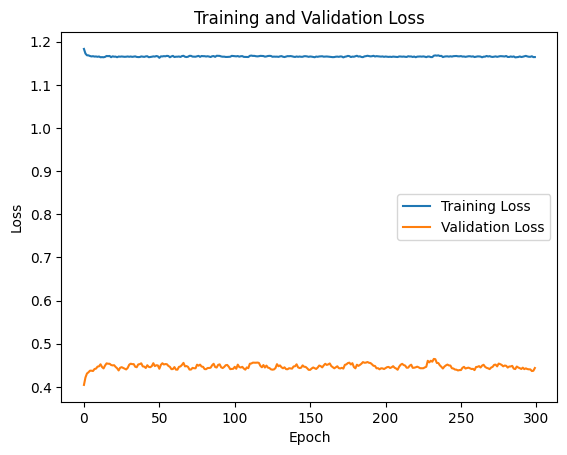

In [43]:

LMA_LSTM_best_model = create_model(int(result.x),Training_inpt_normalize)
history=LMA_LSTM_best_model.fit(Training_inpt_normalize,Training_ouput_normalize, epochs=300 , validation_split=0.2, verbose=0)
loss,rms = LMA_LSTM_best_model.evaluate(testing_inpt_normalize,testing_ouput_normalize)

print('LMA_Optimized_Model Loss:',loss)
print('LMA_Optimized_Model RMS:',rms)
print('Number of Neurons:',int(result.x))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [79]:
#Lvenberg_Marquadt Alorithm Optimization multi layer LSTM
from scipy.optimize import minimize
arr = []
def multi_layer_model(num_neurons0,num_neurons1):
    model = Sequential()
    model.add(LSTM(num_neurons0,return_sequences=True,  activation='relu', input_shape=(Training_inpt_normalize.shape[1],n_features)))
    model.add(LSTM(num_neurons1,return_sequences=True,  activation='relu'))

    model.add(Dense(1))
    model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=0.0001), loss= 'mean_squared_error',metrics=['RootMeanSquaredError'],) 
    return model
def cost_fn(num_neurons):
    num_neurons0 = int(num_neurons[0])
    num_neurons1 = int(num_neurons[1])

    LMA_LSTM_model = multi_layer_model(num_neurons0,num_neurons1)
    LMA_LSTM_model.fit(Training_inpt_normalize,Training_ouput_normalize, epochs=100 , validation_split=0.2, verbose=1)
    out_predict=LMA_LSTM_model.predict(testing_inpt_normalize)
    cost = np.mean(np.square(testing_ouput_normalize - out_predict))
    arr.append(cost)
    return cost

initialized_neuron = np.array([4,4])
result =minimize(cost_fn, initialized_neuron , method='L-BFGS-B', options={'disp': True})

Epoch 1/100
36/36 [==============================] - 5s 23ms/step - loss: 1.1702 - root_mean_squared_error: 1.0813 - val_loss: 0.4238 - val_root_mean_squared_error: 0.6501
Epoch 2/100
36/36 [==============================] - 0s 8ms/step - loss: 1.1700 - root_mean_squared_error: 1.0821 - val_loss: 0.4243 - val_root_mean_squared_error: 0.6505
Epoch 3/100
36/36 [==============================] - 0s 8ms/step - loss: 1.1699 - root_mean_squared_error: 1.0819 - val_loss: 0.4247 - val_root_mean_squared_error: 0.6508
Epoch 4/100
36/36 [==============================] - 0s 8ms/step - loss: 1.1698 - root_mean_squared_error: 1.0818 - val_loss: 0.4254 - val_root_mean_squared_error: 0.6513
Epoch 5/100
36/36 [==============================] - 0s 10ms/step - loss: 1.1696 - root_mean_squared_error: 1.0815 - val_loss: 0.4257 - val_root_mean_squared_error: 0.6515
Epoch 6/100
36/36 [==============================] - 0s 10ms/step - loss: 1.1695 - root_mean_squared_error: 1.0817 - val_loss: 0.4263 - val_roo

Epoch 49/100
36/36 [==============================] - 0s 8ms/step - loss: 1.1666 - root_mean_squared_error: 1.0803 - val_loss: 0.4413 - val_root_mean_squared_error: 0.6630
Epoch 50/100
36/36 [==============================] - 0s 8ms/step - loss: 1.1666 - root_mean_squared_error: 1.0805 - val_loss: 0.4414 - val_root_mean_squared_error: 0.6631
Epoch 51/100
36/36 [==============================] - 0s 8ms/step - loss: 1.1665 - root_mean_squared_error: 1.0804 - val_loss: 0.4417 - val_root_mean_squared_error: 0.6632
Epoch 52/100
36/36 [==============================] - 0s 8ms/step - loss: 1.1665 - root_mean_squared_error: 1.0805 - val_loss: 0.4419 - val_root_mean_squared_error: 0.6634
Epoch 53/100
36/36 [==============================] - 0s 8ms/step - loss: 1.1665 - root_mean_squared_error: 1.0805 - val_loss: 0.4423 - val_root_mean_squared_error: 0.6637
Epoch 54/100
36/36 [==============================] - 0s 9ms/step - loss: 1.1664 - root_mean_squared_error: 1.0802 - val_loss: 0.4425 - val_

36/36 [==============================] - 0s 8ms/step - loss: 1.1665 - root_mean_squared_error: 1.0803 - val_loss: 0.4434 - val_root_mean_squared_error: 0.6645
Epoch 44/100
36/36 [==============================] - 0s 8ms/step - loss: 1.1665 - root_mean_squared_error: 1.0798 - val_loss: 0.4437 - val_root_mean_squared_error: 0.6647
Epoch 45/100
36/36 [==============================] - 0s 8ms/step - loss: 1.1663 - root_mean_squared_error: 1.0804 - val_loss: 0.4442 - val_root_mean_squared_error: 0.6651
Epoch 46/100
36/36 [==============================] - 0s 8ms/step - loss: 1.1663 - root_mean_squared_error: 1.0797 - val_loss: 0.4449 - val_root_mean_squared_error: 0.6656
Epoch 47/100
36/36 [==============================] - 0s 8ms/step - loss: 1.1663 - root_mean_squared_error: 1.0801 - val_loss: 0.4457 - val_root_mean_squared_error: 0.6662
Epoch 48/100
36/36 [==============================] - 0s 8ms/step - loss: 1.1662 - root_mean_squared_error: 1.0803 - val_loss: 0.4453 - val_root_mean_squ

Epoch 91/100
36/36 [==============================] - 0s 8ms/step - loss: 1.1655 - root_mean_squared_error: 1.0798 - val_loss: 0.4493 - val_root_mean_squared_error: 0.6688
Epoch 92/100
36/36 [==============================] - 0s 8ms/step - loss: 1.1655 - root_mean_squared_error: 1.0799 - val_loss: 0.4487 - val_root_mean_squared_error: 0.6684
Epoch 93/100
36/36 [==============================] - 0s 8ms/step - loss: 1.1655 - root_mean_squared_error: 1.0800 - val_loss: 0.4492 - val_root_mean_squared_error: 0.6688
Epoch 94/100
36/36 [==============================] - 0s 8ms/step - loss: 1.1655 - root_mean_squared_error: 1.0801 - val_loss: 0.4494 - val_root_mean_squared_error: 0.6689
Epoch 95/100
36/36 [==============================] - 0s 8ms/step - loss: 1.1655 - root_mean_squared_error: 1.0799 - val_loss: 0.4496 - val_root_mean_squared_error: 0.6691
Epoch 96/100
36/36 [==============================] - 0s 8ms/step - loss: 1.1655 - root_mean_squared_error: 1.0798 - val_loss: 0.4494 - val_

Epoch 86/100
36/36 [==============================] - 0s 8ms/step - loss: 1.1652 - root_mean_squared_error: 1.0799 - val_loss: 0.4476 - val_root_mean_squared_error: 0.6677
Epoch 87/100
36/36 [==============================] - 0s 8ms/step - loss: 1.1658 - root_mean_squared_error: 1.0796 - val_loss: 0.4480 - val_root_mean_squared_error: 0.6680
Epoch 88/100
36/36 [==============================] - 0s 8ms/step - loss: 1.1646 - root_mean_squared_error: 1.0785 - val_loss: 0.4489 - val_root_mean_squared_error: 0.6686
Epoch 89/100
36/36 [==============================] - 0s 8ms/step - loss: 1.1647 - root_mean_squared_error: 1.0797 - val_loss: 0.4496 - val_root_mean_squared_error: 0.6692
Epoch 90/100
36/36 [==============================] - 0s 8ms/step - loss: 1.1659 - root_mean_squared_error: 1.0801 - val_loss: 0.4491 - val_root_mean_squared_error: 0.6688
Epoch 91/100
36/36 [==============================] - 0s 9ms/step - loss: 1.1661 - root_mean_squared_error: 1.0798 - val_loss: 0.4498 - val_

Epoch 81/100
36/36 [==============================] - 0s 8ms/step - loss: 1.1653 - root_mean_squared_error: 1.0798 - val_loss: 0.4510 - val_root_mean_squared_error: 0.6701
Epoch 82/100
36/36 [==============================] - 0s 8ms/step - loss: 1.1653 - root_mean_squared_error: 1.0796 - val_loss: 0.4509 - val_root_mean_squared_error: 0.6700
Epoch 83/100
36/36 [==============================] - 0s 8ms/step - loss: 1.1653 - root_mean_squared_error: 1.0797 - val_loss: 0.4514 - val_root_mean_squared_error: 0.6704
Epoch 84/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1653 - root_mean_squared_error: 1.0794 - val_loss: 0.4515 - val_root_mean_squared_error: 0.6704
Epoch 85/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1652 - root_mean_squared_error: 1.0798 - val_loss: 0.4520 - val_root_mean_squared_error: 0.6708
Epoch 86/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1649 - root_mean_squared_error: 1.0798 - val_loss: 0.4519 - val_

Epoch 76/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1656 - root_mean_squared_error: 1.0800 - val_loss: 0.4546 - val_root_mean_squared_error: 0.6726
Epoch 77/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1656 - root_mean_squared_error: 1.0799 - val_loss: 0.4550 - val_root_mean_squared_error: 0.6729
Epoch 78/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1656 - root_mean_squared_error: 1.0799 - val_loss: 0.4544 - val_root_mean_squared_error: 0.6724
Epoch 79/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1659 - root_mean_squared_error: 1.0717 - val_loss: 0.4547 - val_root_mean_squared_error: 0.6726
Epoch 80/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1655 - root_mean_squared_error: 1.0800 - val_loss: 0.4562 - val_root_mean_squared_error: 0.6737
Epoch 81/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1657 - root_mean_squared_error: 1.0799 - val_loss: 0.4562 - val_

Epoch 71/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1659 - root_mean_squared_error: 1.0799 - val_loss: 0.4442 - val_root_mean_squared_error: 0.6652
Epoch 72/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1657 - root_mean_squared_error: 1.0801 - val_loss: 0.4444 - val_root_mean_squared_error: 0.6653
Epoch 73/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1659 - root_mean_squared_error: 1.0800 - val_loss: 0.4445 - val_root_mean_squared_error: 0.6654
Epoch 74/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1659 - root_mean_squared_error: 1.0800 - val_loss: 0.4445 - val_root_mean_squared_error: 0.6654
Epoch 75/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1660 - root_mean_squared_error: 1.0802 - val_loss: 0.4446 - val_root_mean_squared_error: 0.6655
Epoch 76/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1658 - root_mean_squared_error: 1.0802 - val_loss: 0.4447 - val_

Epoch 66/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1652 - root_mean_squared_error: 1.0797 - val_loss: 0.4493 - val_root_mean_squared_error: 0.6689
Epoch 67/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1646 - root_mean_squared_error: 1.0785 - val_loss: 0.4491 - val_root_mean_squared_error: 0.6687
Epoch 68/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1647 - root_mean_squared_error: 1.0764 - val_loss: 0.4496 - val_root_mean_squared_error: 0.6691
Epoch 69/100
36/36 [==============================] - 0s 9ms/step - loss: 1.1652 - root_mean_squared_error: 1.0798 - val_loss: 0.4508 - val_root_mean_squared_error: 0.6700
Epoch 70/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1650 - root_mean_squared_error: 1.0798 - val_loss: 0.4510 - val_root_mean_squared_error: 0.6701
Epoch 71/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1651 - root_mean_squared_error: 1.0798 - val_loss: 0.4510 - val_

Epoch 61/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1657 - root_mean_squared_error: 1.0801 - val_loss: 0.4457 - val_root_mean_squared_error: 0.6662
Epoch 62/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1658 - root_mean_squared_error: 1.0801 - val_loss: 0.4462 - val_root_mean_squared_error: 0.6666
Epoch 63/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1658 - root_mean_squared_error: 1.0802 - val_loss: 0.4460 - val_root_mean_squared_error: 0.6665
Epoch 64/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1657 - root_mean_squared_error: 1.0794 - val_loss: 0.4463 - val_root_mean_squared_error: 0.6667
Epoch 65/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1656 - root_mean_squared_error: 1.0801 - val_loss: 0.4469 - val_root_mean_squared_error: 0.6671
Epoch 66/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1657 - root_mean_squared_error: 1.0798 - val_loss: 0.4475 - val_

Epoch 56/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1662 - root_mean_squared_error: 1.0801 - val_loss: 0.4460 - val_root_mean_squared_error: 0.6664
Epoch 57/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1661 - root_mean_squared_error: 1.0803 - val_loss: 0.4460 - val_root_mean_squared_error: 0.6664
Epoch 58/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1661 - root_mean_squared_error: 1.0802 - val_loss: 0.4462 - val_root_mean_squared_error: 0.6665
Epoch 59/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1661 - root_mean_squared_error: 1.0801 - val_loss: 0.4463 - val_root_mean_squared_error: 0.6666
Epoch 60/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1661 - root_mean_squared_error: 1.0803 - val_loss: 0.4462 - val_root_mean_squared_error: 0.6666
Epoch 61/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1661 - root_mean_squared_error: 1.0801 - val_loss: 0.4464 - val_

Epoch 51/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1661 - root_mean_squared_error: 1.0801 - val_loss: 0.4539 - val_root_mean_squared_error: 0.6720
Epoch 52/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1660 - root_mean_squared_error: 1.0801 - val_loss: 0.4538 - val_root_mean_squared_error: 0.6720
Epoch 53/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1658 - root_mean_squared_error: 1.0802 - val_loss: 0.4534 - val_root_mean_squared_error: 0.6717
Epoch 54/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1660 - root_mean_squared_error: 1.0800 - val_loss: 0.4535 - val_root_mean_squared_error: 0.6717
Epoch 55/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1658 - root_mean_squared_error: 1.0801 - val_loss: 0.4534 - val_root_mean_squared_error: 0.6717
Epoch 56/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1658 - root_mean_squared_error: 1.0801 - val_loss: 0.4537 - val_

36/36 [==============================] - 0s 7ms/step - loss: 1.1666 - root_mean_squared_error: 1.0806 - val_loss: 0.4408 - val_root_mean_squared_error: 0.6627
Epoch 46/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1666 - root_mean_squared_error: 1.0803 - val_loss: 0.4412 - val_root_mean_squared_error: 0.6630
Epoch 47/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1666 - root_mean_squared_error: 1.0805 - val_loss: 0.4413 - val_root_mean_squared_error: 0.6630
Epoch 48/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1665 - root_mean_squared_error: 1.0803 - val_loss: 0.4417 - val_root_mean_squared_error: 0.6633
Epoch 49/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1665 - root_mean_squared_error: 1.0804 - val_loss: 0.4417 - val_root_mean_squared_error: 0.6633
Epoch 50/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1665 - root_mean_squared_error: 1.0803 - val_loss: 0.4417 - val_root_mean_squ

Epoch 93/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1655 - root_mean_squared_error: 1.0798 - val_loss: 0.4500 - val_root_mean_squared_error: 0.6694
Epoch 94/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1656 - root_mean_squared_error: 1.0799 - val_loss: 0.4496 - val_root_mean_squared_error: 0.6691
Epoch 95/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1656 - root_mean_squared_error: 1.0799 - val_loss: 0.4497 - val_root_mean_squared_error: 0.6691
Epoch 96/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1655 - root_mean_squared_error: 1.0799 - val_loss: 0.4494 - val_root_mean_squared_error: 0.6689
Epoch 97/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1655 - root_mean_squared_error: 1.0799 - val_loss: 0.4493 - val_root_mean_squared_error: 0.6688
Epoch 98/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1654 - root_mean_squared_error: 1.0677 - val_loss: 0.4498 - val_

Epoch 88/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1656 - root_mean_squared_error: 1.0800 - val_loss: 0.4419 - val_root_mean_squared_error: 0.6635
Epoch 89/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1657 - root_mean_squared_error: 1.0801 - val_loss: 0.4422 - val_root_mean_squared_error: 0.6637
Epoch 90/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1653 - root_mean_squared_error: 1.0800 - val_loss: 0.4421 - val_root_mean_squared_error: 0.6637
Epoch 91/100
36/36 [==============================] - 0s 8ms/step - loss: 1.1652 - root_mean_squared_error: 1.0789 - val_loss: 0.4425 - val_root_mean_squared_error: 0.6640
Epoch 92/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1655 - root_mean_squared_error: 1.0787 - val_loss: 0.4431 - val_root_mean_squared_error: 0.6644
Epoch 93/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1660 - root_mean_squared_error: 1.0803 - val_loss: 0.4441 - val_

Epoch 83/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1652 - root_mean_squared_error: 1.0797 - val_loss: 0.4468 - val_root_mean_squared_error: 0.6671
Epoch 84/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1651 - root_mean_squared_error: 1.0798 - val_loss: 0.4467 - val_root_mean_squared_error: 0.6670
Epoch 85/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1648 - root_mean_squared_error: 1.0797 - val_loss: 0.4469 - val_root_mean_squared_error: 0.6672
Epoch 86/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1651 - root_mean_squared_error: 1.0797 - val_loss: 0.4473 - val_root_mean_squared_error: 0.6674
Epoch 87/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1652 - root_mean_squared_error: 1.0799 - val_loss: 0.4477 - val_root_mean_squared_error: 0.6677
Epoch 88/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1652 - root_mean_squared_error: 1.0797 - val_loss: 0.4481 - val_

Epoch 78/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1652 - root_mean_squared_error: 1.0798 - val_loss: 0.4519 - val_root_mean_squared_error: 0.6707
Epoch 79/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1645 - root_mean_squared_error: 1.0796 - val_loss: 0.4520 - val_root_mean_squared_error: 0.6708
Epoch 80/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1652 - root_mean_squared_error: 1.0799 - val_loss: 0.4521 - val_root_mean_squared_error: 0.6708
Epoch 81/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1651 - root_mean_squared_error: 1.0798 - val_loss: 0.4521 - val_root_mean_squared_error: 0.6709
Epoch 82/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1643 - root_mean_squared_error: 1.0792 - val_loss: 0.4522 - val_root_mean_squared_error: 0.6709
Epoch 83/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1654 - root_mean_squared_error: 1.0799 - val_loss: 0.4523 - val_

Epoch 73/100
36/36 [==============================] - 0s 9ms/step - loss: 1.1661 - root_mean_squared_error: 1.0803 - val_loss: 0.4462 - val_root_mean_squared_error: 0.6665
Epoch 74/100
36/36 [==============================] - 0s 9ms/step - loss: 1.1661 - root_mean_squared_error: 1.0801 - val_loss: 0.4464 - val_root_mean_squared_error: 0.6667
Epoch 75/100
36/36 [==============================] - 0s 9ms/step - loss: 1.1661 - root_mean_squared_error: 1.0796 - val_loss: 0.4459 - val_root_mean_squared_error: 0.6664
Epoch 76/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1660 - root_mean_squared_error: 1.0721 - val_loss: 0.4469 - val_root_mean_squared_error: 0.6670
Epoch 77/100
36/36 [==============================] - 0s 8ms/step - loss: 1.1660 - root_mean_squared_error: 1.0802 - val_loss: 0.4481 - val_root_mean_squared_error: 0.6679
Epoch 78/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1659 - root_mean_squared_error: 1.0801 - val_loss: 0.4479 - val_

Epoch 68/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1654 - root_mean_squared_error: 1.0798 - val_loss: 0.4472 - val_root_mean_squared_error: 0.6674
Epoch 69/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1660 - root_mean_squared_error: 1.0803 - val_loss: 0.4470 - val_root_mean_squared_error: 0.6672
Epoch 70/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1657 - root_mean_squared_error: 1.0801 - val_loss: 0.4473 - val_root_mean_squared_error: 0.6674
Epoch 71/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1644 - root_mean_squared_error: 1.0795 - val_loss: 0.4476 - val_root_mean_squared_error: 0.6677
Epoch 72/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1650 - root_mean_squared_error: 1.0796 - val_loss: 0.4475 - val_root_mean_squared_error: 0.6675
Epoch 73/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1655 - root_mean_squared_error: 1.0800 - val_loss: 0.4473 - val_

Epoch 63/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1654 - root_mean_squared_error: 1.0789 - val_loss: 0.4507 - val_root_mean_squared_error: 0.6698
Epoch 64/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1654 - root_mean_squared_error: 1.0797 - val_loss: 0.4511 - val_root_mean_squared_error: 0.6701
Epoch 65/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1657 - root_mean_squared_error: 1.0799 - val_loss: 0.4507 - val_root_mean_squared_error: 0.6698
Epoch 66/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1652 - root_mean_squared_error: 1.0797 - val_loss: 0.4506 - val_root_mean_squared_error: 0.6698
Epoch 67/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1661 - root_mean_squared_error: 1.0791 - val_loss: 0.4504 - val_root_mean_squared_error: 0.6696
Epoch 68/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1650 - root_mean_squared_error: 1.0796 - val_loss: 0.4508 - val_

Epoch 58/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1662 - root_mean_squared_error: 1.0801 - val_loss: 0.4425 - val_root_mean_squared_error: 0.6639
Epoch 59/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1661 - root_mean_squared_error: 1.0801 - val_loss: 0.4429 - val_root_mean_squared_error: 0.6642
Epoch 60/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1662 - root_mean_squared_error: 1.0801 - val_loss: 0.4428 - val_root_mean_squared_error: 0.6642
Epoch 61/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1662 - root_mean_squared_error: 1.0801 - val_loss: 0.4429 - val_root_mean_squared_error: 0.6642
Epoch 62/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1661 - root_mean_squared_error: 1.0801 - val_loss: 0.4434 - val_root_mean_squared_error: 0.6646
Epoch 63/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1661 - root_mean_squared_error: 1.0801 - val_loss: 0.4438 - val_

Epoch 53/100
36/36 [==============================] - 0s 8ms/step - loss: 1.1663 - root_mean_squared_error: 1.0802 - val_loss: 0.4507 - val_root_mean_squared_error: 0.6698
Epoch 54/100
36/36 [==============================] - 0s 8ms/step - loss: 1.1662 - root_mean_squared_error: 1.0801 - val_loss: 0.4504 - val_root_mean_squared_error: 0.6696
Epoch 55/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1662 - root_mean_squared_error: 1.0803 - val_loss: 0.4500 - val_root_mean_squared_error: 0.6693
Epoch 56/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1663 - root_mean_squared_error: 1.0804 - val_loss: 0.4502 - val_root_mean_squared_error: 0.6694
Epoch 57/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1664 - root_mean_squared_error: 1.0803 - val_loss: 0.4505 - val_root_mean_squared_error: 0.6696
Epoch 58/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1660 - root_mean_squared_error: 1.0803 - val_loss: 0.4509 - val_

36/36 [==============================] - 0s 8ms/step - loss: 1.1732 - root_mean_squared_error: 1.0836 - val_loss: 0.4411 - val_root_mean_squared_error: 0.6629
Epoch 48/100
36/36 [==============================] - 0s 8ms/step - loss: 1.1726 - root_mean_squared_error: 1.0831 - val_loss: 0.4412 - val_root_mean_squared_error: 0.6630
Epoch 49/100
36/36 [==============================] - 0s 8ms/step - loss: 1.1711 - root_mean_squared_error: 1.0824 - val_loss: 0.4416 - val_root_mean_squared_error: 0.6632
Epoch 50/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1709 - root_mean_squared_error: 1.0825 - val_loss: 0.4417 - val_root_mean_squared_error: 0.6633
Epoch 51/100
36/36 [==============================] - 0s 8ms/step - loss: 1.1716 - root_mean_squared_error: 1.0828 - val_loss: 0.4421 - val_root_mean_squared_error: 0.6636
Epoch 52/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1713 - root_mean_squared_error: 1.0825 - val_loss: 0.4425 - val_root_mean_squ

Epoch 95/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1677 - root_mean_squared_error: 1.0810 - val_loss: 0.4506 - val_root_mean_squared_error: 0.6698
Epoch 96/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1667 - root_mean_squared_error: 1.0804 - val_loss: 0.4508 - val_root_mean_squared_error: 0.6699
Epoch 97/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1666 - root_mean_squared_error: 1.0805 - val_loss: 0.4508 - val_root_mean_squared_error: 0.6700
Epoch 98/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1672 - root_mean_squared_error: 1.0806 - val_loss: 0.4508 - val_root_mean_squared_error: 0.6700
Epoch 99/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1671 - root_mean_squared_error: 1.0737 - val_loss: 0.4508 - val_root_mean_squared_error: 0.6699
Epoch 100/100
2/2 [==============================] - 0s 5ms/step
Epoch 1/100
36/36 [==============================] - 5s 18ms/step - loss: 1

Epoch 90/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1656 - root_mean_squared_error: 1.0800 - val_loss: 0.4503 - val_root_mean_squared_error: 0.6697
Epoch 91/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1651 - root_mean_squared_error: 1.0796 - val_loss: 0.4502 - val_root_mean_squared_error: 0.6696
Epoch 92/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1643 - root_mean_squared_error: 1.0793 - val_loss: 0.4501 - val_root_mean_squared_error: 0.6695
Epoch 93/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1638 - root_mean_squared_error: 1.0791 - val_loss: 0.4498 - val_root_mean_squared_error: 0.6693
Epoch 94/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1655 - root_mean_squared_error: 1.0799 - val_loss: 0.4495 - val_root_mean_squared_error: 0.6690
Epoch 95/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1653 - root_mean_squared_error: 1.0799 - val_loss: 0.4493 - val_

Epoch 85/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1661 - root_mean_squared_error: 1.0801 - val_loss: 0.4484 - val_root_mean_squared_error: 0.6683
Epoch 86/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1651 - root_mean_squared_error: 1.0777 - val_loss: 0.4483 - val_root_mean_squared_error: 0.6682
Epoch 87/100
36/36 [==============================] - 0s 8ms/step - loss: 1.1652 - root_mean_squared_error: 1.0797 - val_loss: 0.4493 - val_root_mean_squared_error: 0.6690
Epoch 88/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1658 - root_mean_squared_error: 1.0797 - val_loss: 0.4491 - val_root_mean_squared_error: 0.6688
Epoch 89/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1659 - root_mean_squared_error: 1.0778 - val_loss: 0.4496 - val_root_mean_squared_error: 0.6692
Epoch 90/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1650 - root_mean_squared_error: 1.0797 - val_loss: 0.4503 - val_

Epoch 80/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1658 - root_mean_squared_error: 1.0796 - val_loss: 0.4452 - val_root_mean_squared_error: 0.6659
Epoch 81/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1658 - root_mean_squared_error: 1.0798 - val_loss: 0.4458 - val_root_mean_squared_error: 0.6663
Epoch 82/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1656 - root_mean_squared_error: 1.0799 - val_loss: 0.4461 - val_root_mean_squared_error: 0.6665
Epoch 83/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1658 - root_mean_squared_error: 1.0800 - val_loss: 0.4461 - val_root_mean_squared_error: 0.6665
Epoch 84/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1657 - root_mean_squared_error: 1.0800 - val_loss: 0.4461 - val_root_mean_squared_error: 0.6665
Epoch 85/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1656 - root_mean_squared_error: 1.0801 - val_loss: 0.4465 - val_

Epoch 75/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1659 - root_mean_squared_error: 1.0791 - val_loss: 0.4509 - val_root_mean_squared_error: 0.6700
Epoch 76/100
36/36 [==============================] - 0s 8ms/step - loss: 1.1658 - root_mean_squared_error: 1.0801 - val_loss: 0.4516 - val_root_mean_squared_error: 0.6705
Epoch 77/100
36/36 [==============================] - 0s 8ms/step - loss: 1.1658 - root_mean_squared_error: 1.0783 - val_loss: 0.4516 - val_root_mean_squared_error: 0.6705
Epoch 78/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1658 - root_mean_squared_error: 1.0790 - val_loss: 0.4523 - val_root_mean_squared_error: 0.6710
Epoch 79/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1657 - root_mean_squared_error: 1.0800 - val_loss: 0.4529 - val_root_mean_squared_error: 0.6714
Epoch 80/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1657 - root_mean_squared_error: 1.0789 - val_loss: 0.4534 - val_

Epoch 70/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1663 - root_mean_squared_error: 1.0804 - val_loss: 0.4509 - val_root_mean_squared_error: 0.6699
Epoch 71/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1662 - root_mean_squared_error: 1.0802 - val_loss: 0.4511 - val_root_mean_squared_error: 0.6700
Epoch 72/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1662 - root_mean_squared_error: 1.0801 - val_loss: 0.4510 - val_root_mean_squared_error: 0.6700
Epoch 73/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1663 - root_mean_squared_error: 1.0804 - val_loss: 0.4506 - val_root_mean_squared_error: 0.6697
Epoch 74/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1663 - root_mean_squared_error: 1.0803 - val_loss: 0.4507 - val_root_mean_squared_error: 0.6698
Epoch 75/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1661 - root_mean_squared_error: 1.0802 - val_loss: 0.4507 - val_

Epoch 65/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1662 - root_mean_squared_error: 1.0803 - val_loss: 0.4502 - val_root_mean_squared_error: 0.6694
Epoch 66/100
36/36 [==============================] - 0s 8ms/step - loss: 1.1662 - root_mean_squared_error: 1.0803 - val_loss: 0.4500 - val_root_mean_squared_error: 0.6693
Epoch 67/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1661 - root_mean_squared_error: 1.0799 - val_loss: 0.4502 - val_root_mean_squared_error: 0.6694
Epoch 68/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1660 - root_mean_squared_error: 1.0803 - val_loss: 0.4506 - val_root_mean_squared_error: 0.6697
Epoch 69/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1659 - root_mean_squared_error: 1.0801 - val_loss: 0.4508 - val_root_mean_squared_error: 0.6699
Epoch 70/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1661 - root_mean_squared_error: 1.0802 - val_loss: 0.4507 - val_

Epoch 60/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1659 - root_mean_squared_error: 1.0800 - val_loss: 0.4530 - val_root_mean_squared_error: 0.6715
Epoch 61/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1657 - root_mean_squared_error: 1.0800 - val_loss: 0.4533 - val_root_mean_squared_error: 0.6717
Epoch 62/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1658 - root_mean_squared_error: 1.0801 - val_loss: 0.4533 - val_root_mean_squared_error: 0.6717
Epoch 63/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1659 - root_mean_squared_error: 1.0802 - val_loss: 0.4532 - val_root_mean_squared_error: 0.6717
Epoch 64/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1659 - root_mean_squared_error: 1.0799 - val_loss: 0.4533 - val_root_mean_squared_error: 0.6718
Epoch 65/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1658 - root_mean_squared_error: 1.0799 - val_loss: 0.4537 - val_

Epoch 55/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1657 - root_mean_squared_error: 1.0801 - val_loss: 0.4426 - val_root_mean_squared_error: 0.6640
Epoch 56/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1653 - root_mean_squared_error: 1.0695 - val_loss: 0.4429 - val_root_mean_squared_error: 0.6643
Epoch 57/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1655 - root_mean_squared_error: 1.0731 - val_loss: 0.4446 - val_root_mean_squared_error: 0.6655
Epoch 58/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1654 - root_mean_squared_error: 1.0786 - val_loss: 0.4458 - val_root_mean_squared_error: 0.6663
Epoch 59/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1652 - root_mean_squared_error: 1.0797 - val_loss: 0.4462 - val_root_mean_squared_error: 0.6666
Epoch 60/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1654 - root_mean_squared_error: 1.0798 - val_loss: 0.4463 - val_

Epoch 50/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1663 - root_mean_squared_error: 1.0802 - val_loss: 0.4417 - val_root_mean_squared_error: 0.6633
Epoch 51/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1663 - root_mean_squared_error: 1.0804 - val_loss: 0.4417 - val_root_mean_squared_error: 0.6633
Epoch 52/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1663 - root_mean_squared_error: 1.0801 - val_loss: 0.4417 - val_root_mean_squared_error: 0.6633
Epoch 53/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1663 - root_mean_squared_error: 1.0804 - val_loss: 0.4418 - val_root_mean_squared_error: 0.6634
Epoch 54/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1663 - root_mean_squared_error: 1.0804 - val_loss: 0.4419 - val_root_mean_squared_error: 0.6635
Epoch 55/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1663 - root_mean_squared_error: 1.0802 - val_loss: 0.4421 - val_

36/36 [==============================] - 0s 7ms/step - loss: 1.1662 - root_mean_squared_error: 1.0801 - val_loss: 0.4440 - val_root_mean_squared_error: 0.6649
Epoch 45/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1662 - root_mean_squared_error: 1.0802 - val_loss: 0.4440 - val_root_mean_squared_error: 0.6649
Epoch 46/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1662 - root_mean_squared_error: 1.0803 - val_loss: 0.4441 - val_root_mean_squared_error: 0.6650
Epoch 47/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1662 - root_mean_squared_error: 1.0802 - val_loss: 0.4442 - val_root_mean_squared_error: 0.6651
Epoch 48/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1662 - root_mean_squared_error: 1.0801 - val_loss: 0.4443 - val_root_mean_squared_error: 0.6651
Epoch 49/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1662 - root_mean_squared_error: 1.0801 - val_loss: 0.4442 - val_root_mean_squ

Epoch 92/100
36/36 [==============================] - 0s 8ms/step - loss: 1.1653 - root_mean_squared_error: 1.0796 - val_loss: 0.4542 - val_root_mean_squared_error: 0.6724
Epoch 93/100
36/36 [==============================] - 0s 8ms/step - loss: 1.1654 - root_mean_squared_error: 1.0798 - val_loss: 0.4545 - val_root_mean_squared_error: 0.6726
Epoch 94/100
36/36 [==============================] - 0s 8ms/step - loss: 1.1652 - root_mean_squared_error: 1.0798 - val_loss: 0.4544 - val_root_mean_squared_error: 0.6725
Epoch 95/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1654 - root_mean_squared_error: 1.0799 - val_loss: 0.4542 - val_root_mean_squared_error: 0.6724
Epoch 96/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1653 - root_mean_squared_error: 1.0783 - val_loss: 0.4542 - val_root_mean_squared_error: 0.6723
Epoch 97/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1654 - root_mean_squared_error: 1.0800 - val_loss: 0.4549 - val_

Epoch 87/100
36/36 [==============================] - 0s 8ms/step - loss: 1.1648 - root_mean_squared_error: 1.0795 - val_loss: 0.4533 - val_root_mean_squared_error: 0.6718
Epoch 88/100
36/36 [==============================] - 0s 9ms/step - loss: 1.1650 - root_mean_squared_error: 1.0797 - val_loss: 0.4530 - val_root_mean_squared_error: 0.6716
Epoch 89/100
36/36 [==============================] - 0s 8ms/step - loss: 1.1648 - root_mean_squared_error: 1.0796 - val_loss: 0.4532 - val_root_mean_squared_error: 0.6718
Epoch 90/100
36/36 [==============================] - 0s 12ms/step - loss: 1.1653 - root_mean_squared_error: 1.0797 - val_loss: 0.4532 - val_root_mean_squared_error: 0.6717
Epoch 91/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1652 - root_mean_squared_error: 1.0796 - val_loss: 0.4531 - val_root_mean_squared_error: 0.6717
Epoch 92/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1654 - root_mean_squared_error: 1.0800 - val_loss: 0.4526 - val

Epoch 82/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1657 - root_mean_squared_error: 1.0801 - val_loss: 0.4505 - val_root_mean_squared_error: 0.6697
Epoch 83/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1658 - root_mean_squared_error: 1.0777 - val_loss: 0.4506 - val_root_mean_squared_error: 0.6698
Epoch 84/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1657 - root_mean_squared_error: 1.0801 - val_loss: 0.4513 - val_root_mean_squared_error: 0.6703
Epoch 85/100
36/36 [==============================] - 0s 8ms/step - loss: 1.1657 - root_mean_squared_error: 1.0799 - val_loss: 0.4515 - val_root_mean_squared_error: 0.6704
Epoch 86/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1657 - root_mean_squared_error: 1.0800 - val_loss: 0.4515 - val_root_mean_squared_error: 0.6704
Epoch 87/100
36/36 [==============================] - 0s 8ms/step - loss: 1.1657 - root_mean_squared_error: 1.0801 - val_loss: 0.4517 - val_

Epoch 77/100
36/36 [==============================] - 0s 8ms/step - loss: 1.1655 - root_mean_squared_error: 1.0777 - val_loss: 0.4486 - val_root_mean_squared_error: 0.6683
Epoch 78/100
36/36 [==============================] - 0s 8ms/step - loss: 1.1651 - root_mean_squared_error: 1.0798 - val_loss: 0.4494 - val_root_mean_squared_error: 0.6689
Epoch 79/100
36/36 [==============================] - 0s 8ms/step - loss: 1.1651 - root_mean_squared_error: 1.0798 - val_loss: 0.4494 - val_root_mean_squared_error: 0.6689
Epoch 80/100
36/36 [==============================] - 0s 8ms/step - loss: 1.1651 - root_mean_squared_error: 1.0777 - val_loss: 0.4497 - val_root_mean_squared_error: 0.6691
Epoch 81/100
36/36 [==============================] - 0s 8ms/step - loss: 1.1652 - root_mean_squared_error: 1.0798 - val_loss: 0.4504 - val_root_mean_squared_error: 0.6696
Epoch 82/100
36/36 [==============================] - 0s 8ms/step - loss: 1.1654 - root_mean_squared_error: 1.0798 - val_loss: 0.4503 - val_

Epoch 72/100
36/36 [==============================] - 0s 8ms/step - loss: 1.1653 - root_mean_squared_error: 1.0798 - val_loss: 0.4476 - val_root_mean_squared_error: 0.6676
Epoch 73/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1654 - root_mean_squared_error: 1.0799 - val_loss: 0.4471 - val_root_mean_squared_error: 0.6672
Epoch 74/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1652 - root_mean_squared_error: 1.0799 - val_loss: 0.4469 - val_root_mean_squared_error: 0.6671
Epoch 75/100
36/36 [==============================] - 0s 8ms/step - loss: 1.1658 - root_mean_squared_error: 1.0799 - val_loss: 0.4470 - val_root_mean_squared_error: 0.6672
Epoch 76/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1658 - root_mean_squared_error: 1.0800 - val_loss: 0.4469 - val_root_mean_squared_error: 0.6671
Epoch 77/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1655 - root_mean_squared_error: 1.0799 - val_loss: 0.4476 - val_

Epoch 67/100
36/36 [==============================] - 0s 8ms/step - loss: 1.1656 - root_mean_squared_error: 1.0799 - val_loss: 0.4527 - val_root_mean_squared_error: 0.6713
Epoch 68/100
36/36 [==============================] - 0s 8ms/step - loss: 1.1656 - root_mean_squared_error: 1.0798 - val_loss: 0.4531 - val_root_mean_squared_error: 0.6715
Epoch 69/100
36/36 [==============================] - 0s 8ms/step - loss: 1.1656 - root_mean_squared_error: 1.0801 - val_loss: 0.4529 - val_root_mean_squared_error: 0.6714
Epoch 70/100
36/36 [==============================] - 0s 8ms/step - loss: 1.1656 - root_mean_squared_error: 1.0800 - val_loss: 0.4533 - val_root_mean_squared_error: 0.6717
Epoch 71/100
36/36 [==============================] - 0s 8ms/step - loss: 1.1655 - root_mean_squared_error: 1.0800 - val_loss: 0.4532 - val_root_mean_squared_error: 0.6716
Epoch 72/100
36/36 [==============================] - 0s 8ms/step - loss: 1.1655 - root_mean_squared_error: 1.0798 - val_loss: 0.4532 - val_

Epoch 62/100
36/36 [==============================] - 0s 8ms/step - loss: 1.1654 - root_mean_squared_error: 1.0800 - val_loss: 0.4532 - val_root_mean_squared_error: 0.6716
Epoch 63/100
36/36 [==============================] - 0s 8ms/step - loss: 1.1656 - root_mean_squared_error: 1.0797 - val_loss: 0.4532 - val_root_mean_squared_error: 0.6716
Epoch 64/100
36/36 [==============================] - 0s 8ms/step - loss: 1.1652 - root_mean_squared_error: 1.0797 - val_loss: 0.4533 - val_root_mean_squared_error: 0.6717
Epoch 65/100
36/36 [==============================] - 0s 8ms/step - loss: 1.1658 - root_mean_squared_error: 1.0787 - val_loss: 0.4531 - val_root_mean_squared_error: 0.6716
Epoch 66/100
36/36 [==============================] - 0s 9ms/step - loss: 1.1649 - root_mean_squared_error: 1.0766 - val_loss: 0.4539 - val_root_mean_squared_error: 0.6722
Epoch 67/100
36/36 [==============================] - 0s 9ms/step - loss: 1.1648 - root_mean_squared_error: 1.0796 - val_loss: 0.4547 - val_

Epoch 57/100
36/36 [==============================] - 0s 10ms/step - loss: 1.1653 - root_mean_squared_error: 1.0797 - val_loss: 0.4534 - val_root_mean_squared_error: 0.6719
Epoch 58/100
36/36 [==============================] - 0s 10ms/step - loss: 1.1652 - root_mean_squared_error: 1.0797 - val_loss: 0.4531 - val_root_mean_squared_error: 0.6717
Epoch 59/100
36/36 [==============================] - 0s 8ms/step - loss: 1.1653 - root_mean_squared_error: 1.0781 - val_loss: 0.4530 - val_root_mean_squared_error: 0.6716
Epoch 60/100
36/36 [==============================] - 0s 8ms/step - loss: 1.1654 - root_mean_squared_error: 1.0800 - val_loss: 0.4535 - val_root_mean_squared_error: 0.6719
Epoch 61/100
36/36 [==============================] - 0s 9ms/step - loss: 1.1652 - root_mean_squared_error: 1.0797 - val_loss: 0.4537 - val_root_mean_squared_error: 0.6721
Epoch 62/100
36/36 [==============================] - 0s 10ms/step - loss: 1.1653 - root_mean_squared_error: 1.0797 - val_loss: 0.4535 - v

36/36 [==============================] - 0s 8ms/step - loss: 1.1664 - root_mean_squared_error: 1.0805 - val_loss: 0.4428 - val_root_mean_squared_error: 0.6641
Epoch 52/100
36/36 [==============================] - 0s 9ms/step - loss: 1.1664 - root_mean_squared_error: 1.0804 - val_loss: 0.4430 - val_root_mean_squared_error: 0.6642
Epoch 53/100
36/36 [==============================] - 0s 9ms/step - loss: 1.1663 - root_mean_squared_error: 1.0803 - val_loss: 0.4433 - val_root_mean_squared_error: 0.6644
Epoch 54/100
36/36 [==============================] - 0s 10ms/step - loss: 1.1663 - root_mean_squared_error: 1.0802 - val_loss: 0.4437 - val_root_mean_squared_error: 0.6647
Epoch 55/100
36/36 [==============================] - 0s 9ms/step - loss: 1.1663 - root_mean_squared_error: 1.0804 - val_loss: 0.4437 - val_root_mean_squared_error: 0.6647
Epoch 56/100
36/36 [==============================] - 0s 9ms/step - loss: 1.1663 - root_mean_squared_error: 1.0804 - val_loss: 0.4440 - val_root_mean_sq

36/36 [==============================] - 0s 11ms/step - loss: 1.1667 - root_mean_squared_error: 1.0803 - val_loss: 0.4412 - val_root_mean_squared_error: 0.6629
Epoch 46/100
36/36 [==============================] - 0s 9ms/step - loss: 1.1666 - root_mean_squared_error: 1.0803 - val_loss: 0.4413 - val_root_mean_squared_error: 0.6630
Epoch 47/100
36/36 [==============================] - 0s 9ms/step - loss: 1.1666 - root_mean_squared_error: 1.0798 - val_loss: 0.4413 - val_root_mean_squared_error: 0.6630
Epoch 48/100
36/36 [==============================] - 0s 9ms/step - loss: 1.1666 - root_mean_squared_error: 1.0798 - val_loss: 0.4421 - val_root_mean_squared_error: 0.6635
Epoch 49/100
36/36 [==============================] - 0s 8ms/step - loss: 1.1664 - root_mean_squared_error: 1.0803 - val_loss: 0.4425 - val_root_mean_squared_error: 0.6639
Epoch 50/100
36/36 [==============================] - 0s 9ms/step - loss: 1.1664 - root_mean_squared_error: 1.0802 - val_loss: 0.4430 - val_root_mean_sq

Epoch 93/100
36/36 [==============================] - 0s 8ms/step - loss: 1.1656 - root_mean_squared_error: 1.0799 - val_loss: 0.4508 - val_root_mean_squared_error: 0.6699
Epoch 94/100
36/36 [==============================] - 0s 8ms/step - loss: 1.1656 - root_mean_squared_error: 1.0801 - val_loss: 0.4505 - val_root_mean_squared_error: 0.6697
Epoch 95/100
36/36 [==============================] - 0s 9ms/step - loss: 1.1656 - root_mean_squared_error: 1.0798 - val_loss: 0.4504 - val_root_mean_squared_error: 0.6696
Epoch 96/100
36/36 [==============================] - 0s 9ms/step - loss: 1.1656 - root_mean_squared_error: 1.0801 - val_loss: 0.4504 - val_root_mean_squared_error: 0.6696
Epoch 97/100
36/36 [==============================] - 0s 8ms/step - loss: 1.1656 - root_mean_squared_error: 1.0800 - val_loss: 0.4508 - val_root_mean_squared_error: 0.6699
Epoch 98/100
36/36 [==============================] - 0s 8ms/step - loss: 1.1656 - root_mean_squared_error: 1.0798 - val_loss: 0.4509 - val_

36/36 [==============================] - 0s 9ms/step - loss: 1.1652 - root_mean_squared_error: 1.0799 - val_loss: 0.4510 - val_root_mean_squared_error: 0.6700
Epoch 88/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1653 - root_mean_squared_error: 1.0797 - val_loss: 0.4510 - val_root_mean_squared_error: 0.6700
Epoch 89/100
36/36 [==============================] - 0s 13ms/step - loss: 1.1651 - root_mean_squared_error: 1.0776 - val_loss: 0.4507 - val_root_mean_squared_error: 0.6698
Epoch 90/100
36/36 [==============================] - 0s 10ms/step - loss: 1.1651 - root_mean_squared_error: 1.0798 - val_loss: 0.4515 - val_root_mean_squared_error: 0.6704
Epoch 91/100
36/36 [==============================] - 0s 9ms/step - loss: 1.1654 - root_mean_squared_error: 1.0800 - val_loss: 0.4514 - val_root_mean_squared_error: 0.6703
Epoch 92/100
36/36 [==============================] - 0s 10ms/step - loss: 1.1653 - root_mean_squared_error: 1.0799 - val_loss: 0.4516 - val_root_mean_

36/36 [==============================] - 0s 8ms/step - loss: 1.1658 - root_mean_squared_error: 1.0801 - val_loss: 0.4516 - val_root_mean_squared_error: 0.6705
Epoch 82/100
36/36 [==============================] - 0s 13ms/step - loss: 1.1657 - root_mean_squared_error: 1.0801 - val_loss: 0.4517 - val_root_mean_squared_error: 0.6706
Epoch 83/100
36/36 [==============================] - 0s 12ms/step - loss: 1.1657 - root_mean_squared_error: 1.0800 - val_loss: 0.4518 - val_root_mean_squared_error: 0.6706
Epoch 84/100
36/36 [==============================] - 0s 10ms/step - loss: 1.1657 - root_mean_squared_error: 1.0799 - val_loss: 0.4520 - val_root_mean_squared_error: 0.6708
Epoch 85/100
36/36 [==============================] - 0s 10ms/step - loss: 1.1657 - root_mean_squared_error: 1.0801 - val_loss: 0.4523 - val_root_mean_squared_error: 0.6710
Epoch 86/100
36/36 [==============================] - 0s 10ms/step - loss: 1.1657 - root_mean_squared_error: 1.0801 - val_loss: 0.4526 - val_root_mea

36/36 [==============================] - 1s 16ms/step - loss: 1.1650 - root_mean_squared_error: 1.0798 - val_loss: 0.4465 - val_root_mean_squared_error: 0.6670
Epoch 76/100
36/36 [==============================] - 0s 9ms/step - loss: 1.1650 - root_mean_squared_error: 1.0798 - val_loss: 0.4470 - val_root_mean_squared_error: 0.6673
Epoch 77/100
36/36 [==============================] - 0s 9ms/step - loss: 1.1654 - root_mean_squared_error: 1.0788 - val_loss: 0.4470 - val_root_mean_squared_error: 0.6673
Epoch 78/100
36/36 [==============================] - 0s 9ms/step - loss: 1.1651 - root_mean_squared_error: 1.0784 - val_loss: 0.4479 - val_root_mean_squared_error: 0.6680
Epoch 79/100
36/36 [==============================] - 0s 8ms/step - loss: 1.1646 - root_mean_squared_error: 1.0794 - val_loss: 0.4487 - val_root_mean_squared_error: 0.6686
Epoch 80/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1656 - root_mean_squared_error: 1.0800 - val_loss: 0.4488 - val_root_mean_sq

Epoch 70/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1663 - root_mean_squared_error: 1.0802 - val_loss: 0.4460 - val_root_mean_squared_error: 0.6664
Epoch 71/100
36/36 [==============================] - 0s 8ms/step - loss: 1.1663 - root_mean_squared_error: 1.0770 - val_loss: 0.4461 - val_root_mean_squared_error: 0.6665
Epoch 72/100
36/36 [==============================] - 0s 8ms/step - loss: 1.1662 - root_mean_squared_error: 1.0803 - val_loss: 0.4468 - val_root_mean_squared_error: 0.6670
Epoch 73/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1662 - root_mean_squared_error: 1.0799 - val_loss: 0.4472 - val_root_mean_squared_error: 0.6673
Epoch 74/100
36/36 [==============================] - 0s 8ms/step - loss: 1.1661 - root_mean_squared_error: 1.0803 - val_loss: 0.4474 - val_root_mean_squared_error: 0.6674
Epoch 75/100
36/36 [==============================] - 0s 8ms/step - loss: 1.1661 - root_mean_squared_error: 1.0800 - val_loss: 0.4476 - val_

Epoch 65/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1654 - root_mean_squared_error: 1.0800 - val_loss: 0.4458 - val_root_mean_squared_error: 0.6663
Epoch 66/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1654 - root_mean_squared_error: 1.0800 - val_loss: 0.4458 - val_root_mean_squared_error: 0.6663
Epoch 67/100
36/36 [==============================] - 0s 8ms/step - loss: 1.1652 - root_mean_squared_error: 1.0798 - val_loss: 0.4462 - val_root_mean_squared_error: 0.6666
Epoch 68/100
36/36 [==============================] - 0s 10ms/step - loss: 1.1651 - root_mean_squared_error: 1.0799 - val_loss: 0.4462 - val_root_mean_squared_error: 0.6666
Epoch 69/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1650 - root_mean_squared_error: 1.0798 - val_loss: 0.4461 - val_root_mean_squared_error: 0.6666
Epoch 70/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1651 - root_mean_squared_error: 1.0799 - val_loss: 0.4465 - val

Epoch 60/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1653 - root_mean_squared_error: 1.0767 - val_loss: 0.4505 - val_root_mean_squared_error: 0.6697
Epoch 61/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1651 - root_mean_squared_error: 1.0796 - val_loss: 0.4517 - val_root_mean_squared_error: 0.6705
Epoch 62/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1652 - root_mean_squared_error: 1.0798 - val_loss: 0.4513 - val_root_mean_squared_error: 0.6703
Epoch 63/100
36/36 [==============================] - 0s 14ms/step - loss: 1.1652 - root_mean_squared_error: 1.0797 - val_loss: 0.4517 - val_root_mean_squared_error: 0.6705
Epoch 64/100
36/36 [==============================] - 1s 37ms/step - loss: 1.1648 - root_mean_squared_error: 1.0796 - val_loss: 0.4513 - val_root_mean_squared_error: 0.6703
Epoch 65/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1651 - root_mean_squared_error: 1.0797 - val_loss: 0.4514 - va

Epoch 55/100
36/36 [==============================] - 0s 10ms/step - loss: 1.1654 - root_mean_squared_error: 1.0797 - val_loss: 0.4451 - val_root_mean_squared_error: 0.6658
Epoch 56/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1652 - root_mean_squared_error: 1.0798 - val_loss: 0.4452 - val_root_mean_squared_error: 0.6659
Epoch 57/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1654 - root_mean_squared_error: 1.0798 - val_loss: 0.4456 - val_root_mean_squared_error: 0.6661
Epoch 58/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1655 - root_mean_squared_error: 1.0798 - val_loss: 0.4455 - val_root_mean_squared_error: 0.6661
Epoch 59/100
36/36 [==============================] - 0s 8ms/step - loss: 1.1655 - root_mean_squared_error: 1.0799 - val_loss: 0.4456 - val_root_mean_squared_error: 0.6661
Epoch 60/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1649 - root_mean_squared_error: 1.0797 - val_loss: 0.4456 - val

36/36 [==============================] - 0s 7ms/step - loss: 1.1658 - root_mean_squared_error: 1.0801 - val_loss: 0.4475 - val_root_mean_squared_error: 0.6675
Epoch 50/100
36/36 [==============================] - 0s 9ms/step - loss: 1.1655 - root_mean_squared_error: 1.0799 - val_loss: 0.4480 - val_root_mean_squared_error: 0.6678
Epoch 51/100
36/36 [==============================] - 1s 16ms/step - loss: 1.1655 - root_mean_squared_error: 1.0798 - val_loss: 0.4476 - val_root_mean_squared_error: 0.6676
Epoch 52/100
36/36 [==============================] - 0s 11ms/step - loss: 1.1657 - root_mean_squared_error: 1.0799 - val_loss: 0.4474 - val_root_mean_squared_error: 0.6674
Epoch 53/100
36/36 [==============================] - 1s 16ms/step - loss: 1.1655 - root_mean_squared_error: 1.0798 - val_loss: 0.4472 - val_root_mean_squared_error: 0.6673
Epoch 54/100
36/36 [==============================] - 1s 23ms/step - loss: 1.1652 - root_mean_squared_error: 1.0797 - val_loss: 0.4470 - val_root_mean

36/36 [==============================] - 0s 7ms/step - loss: 1.1665 - root_mean_squared_error: 1.0805 - val_loss: 0.4496 - val_root_mean_squared_error: 0.6689
Epoch 44/100
36/36 [==============================] - 0s 11ms/step - loss: 1.1662 - root_mean_squared_error: 1.0802 - val_loss: 0.4499 - val_root_mean_squared_error: 0.6692
Epoch 45/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1663 - root_mean_squared_error: 1.0804 - val_loss: 0.4503 - val_root_mean_squared_error: 0.6694
Epoch 46/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1664 - root_mean_squared_error: 1.0803 - val_loss: 0.4506 - val_root_mean_squared_error: 0.6697
Epoch 47/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1662 - root_mean_squared_error: 1.0801 - val_loss: 0.4503 - val_root_mean_squared_error: 0.6695
Epoch 48/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1662 - root_mean_squared_error: 1.0801 - val_loss: 0.4501 - val_root_mean_sq

36/36 [==============================] - 0s 8ms/step - loss: 1.1653 - root_mean_squared_error: 1.0798 - val_loss: 0.4386 - val_root_mean_squared_error: 0.6611
Epoch 38/100
36/36 [==============================] - 0s 13ms/step - loss: 1.1654 - root_mean_squared_error: 1.0798 - val_loss: 0.4385 - val_root_mean_squared_error: 0.6611
Epoch 39/100
36/36 [==============================] - 0s 13ms/step - loss: 1.1654 - root_mean_squared_error: 1.0776 - val_loss: 0.4388 - val_root_mean_squared_error: 0.6613
Epoch 40/100
36/36 [==============================] - 0s 11ms/step - loss: 1.1650 - root_mean_squared_error: 1.0797 - val_loss: 0.4397 - val_root_mean_squared_error: 0.6619
Epoch 41/100
36/36 [==============================] - 0s 9ms/step - loss: 1.1658 - root_mean_squared_error: 1.0799 - val_loss: 0.4398 - val_root_mean_squared_error: 0.6620
Epoch 42/100
36/36 [==============================] - 0s 12ms/step - loss: 1.1653 - root_mean_squared_error: 1.0799 - val_loss: 0.4398 - val_root_mean

36/36 [==============================] - 0s 11ms/step - loss: 1.1675 - root_mean_squared_error: 1.0808 - val_loss: 0.4353 - val_root_mean_squared_error: 0.6586
Epoch 32/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1674 - root_mean_squared_error: 1.0807 - val_loss: 0.4355 - val_root_mean_squared_error: 0.6587
Epoch 33/100
36/36 [==============================] - 0s 8ms/step - loss: 1.1674 - root_mean_squared_error: 1.0807 - val_loss: 0.4356 - val_root_mean_squared_error: 0.6589
Epoch 34/100
36/36 [==============================] - 0s 12ms/step - loss: 1.1674 - root_mean_squared_error: 1.0808 - val_loss: 0.4357 - val_root_mean_squared_error: 0.6589
Epoch 35/100
36/36 [==============================] - 1s 17ms/step - loss: 1.1674 - root_mean_squared_error: 1.0807 - val_loss: 0.4360 - val_root_mean_squared_error: 0.6591
Epoch 36/100
36/36 [==============================] - 0s 9ms/step - loss: 1.1673 - root_mean_squared_error: 1.0808 - val_loss: 0.4360 - val_root_mean_

36/36 [==============================] - 0s 8ms/step - loss: 1.1676 - root_mean_squared_error: 1.0809 - val_loss: 0.4343 - val_root_mean_squared_error: 0.6578
Epoch 26/100
36/36 [==============================] - 1s 26ms/step - loss: 1.1675 - root_mean_squared_error: 1.0807 - val_loss: 0.4347 - val_root_mean_squared_error: 0.6582
Epoch 27/100
36/36 [==============================] - 0s 11ms/step - loss: 1.1675 - root_mean_squared_error: 1.0810 - val_loss: 0.4350 - val_root_mean_squared_error: 0.6584
Epoch 28/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1674 - root_mean_squared_error: 1.0805 - val_loss: 0.4353 - val_root_mean_squared_error: 0.6586
Epoch 29/100
36/36 [==============================] - 1s 18ms/step - loss: 1.1673 - root_mean_squared_error: 1.0807 - val_loss: 0.4359 - val_root_mean_squared_error: 0.6591
Epoch 30/100
36/36 [==============================] - 0s 9ms/step - loss: 1.1672 - root_mean_squared_error: 1.0808 - val_loss: 0.4362 - val_root_mean_

36/36 [==============================] - 0s 8ms/step - loss: 1.1661 - root_mean_squared_error: 1.0801 - val_loss: 0.4399 - val_root_mean_squared_error: 0.6619
Epoch 20/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1665 - root_mean_squared_error: 1.0776 - val_loss: 0.4401 - val_root_mean_squared_error: 0.6621
Epoch 21/100
36/36 [==============================] - 0s 8ms/step - loss: 1.1660 - root_mean_squared_error: 1.0802 - val_loss: 0.4413 - val_root_mean_squared_error: 0.6630
Epoch 22/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1661 - root_mean_squared_error: 1.0801 - val_loss: 0.4415 - val_root_mean_squared_error: 0.6631
Epoch 23/100
36/36 [==============================] - 0s 8ms/step - loss: 1.1657 - root_mean_squared_error: 1.0801 - val_loss: 0.4413 - val_root_mean_squared_error: 0.6630
Epoch 24/100
36/36 [==============================] - 0s 10ms/step - loss: 1.1654 - root_mean_squared_error: 1.0798 - val_loss: 0.4416 - val_root_mean_sq

Epoch 67/100
36/36 [==============================] - 0s 10ms/step - loss: 1.1654 - root_mean_squared_error: 1.0800 - val_loss: 0.4506 - val_root_mean_squared_error: 0.6698
Epoch 68/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1651 - root_mean_squared_error: 1.0777 - val_loss: 0.4509 - val_root_mean_squared_error: 0.6700
Epoch 69/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1648 - root_mean_squared_error: 1.0795 - val_loss: 0.4515 - val_root_mean_squared_error: 0.6704
Epoch 70/100
36/36 [==============================] - 0s 8ms/step - loss: 1.1654 - root_mean_squared_error: 1.0798 - val_loss: 0.4511 - val_root_mean_squared_error: 0.6702
Epoch 71/100
36/36 [==============================] - 0s 9ms/step - loss: 1.1647 - root_mean_squared_error: 1.0775 - val_loss: 0.4509 - val_root_mean_squared_error: 0.6700
Epoch 72/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1655 - root_mean_squared_error: 1.0801 - val_loss: 0.4513 - val

Epoch 62/100
36/36 [==============================] - 0s 9ms/step - loss: 1.1662 - root_mean_squared_error: 1.0801 - val_loss: 0.4446 - val_root_mean_squared_error: 0.6654
Epoch 63/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1662 - root_mean_squared_error: 1.0802 - val_loss: 0.4446 - val_root_mean_squared_error: 0.6654
Epoch 64/100
36/36 [==============================] - 0s 8ms/step - loss: 1.1662 - root_mean_squared_error: 1.0801 - val_loss: 0.4446 - val_root_mean_squared_error: 0.6654
Epoch 65/100
36/36 [==============================] - 0s 10ms/step - loss: 1.1662 - root_mean_squared_error: 1.0802 - val_loss: 0.4447 - val_root_mean_squared_error: 0.6654
Epoch 66/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1662 - root_mean_squared_error: 1.0801 - val_loss: 0.4447 - val_root_mean_squared_error: 0.6655
Epoch 67/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1662 - root_mean_squared_error: 1.0801 - val_loss: 0.4448 - val

36/36 [==============================] - 0s 7ms/step - loss: 1.1657 - root_mean_squared_error: 1.0799 - val_loss: 0.4450 - val_root_mean_squared_error: 0.6657
Epoch 57/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1658 - root_mean_squared_error: 1.0802 - val_loss: 0.4448 - val_root_mean_squared_error: 0.6656
Epoch 58/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1657 - root_mean_squared_error: 1.0784 - val_loss: 0.4451 - val_root_mean_squared_error: 0.6658
Epoch 59/100
36/36 [==============================] - 0s 11ms/step - loss: 1.1656 - root_mean_squared_error: 1.0798 - val_loss: 0.4463 - val_root_mean_squared_error: 0.6666
Epoch 60/100
36/36 [==============================] - 0s 8ms/step - loss: 1.1656 - root_mean_squared_error: 1.0800 - val_loss: 0.4461 - val_root_mean_squared_error: 0.6665
Epoch 61/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1655 - root_mean_squared_error: 1.0798 - val_loss: 0.4463 - val_root_mean_sq

Epoch 51/100
36/36 [==============================] - 0s 8ms/step - loss: 1.1665 - root_mean_squared_error: 1.0805 - val_loss: 0.4416 - val_root_mean_squared_error: 0.6632
Epoch 52/100
36/36 [==============================] - 0s 10ms/step - loss: 1.1665 - root_mean_squared_error: 1.0804 - val_loss: 0.4419 - val_root_mean_squared_error: 0.6634
Epoch 53/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1665 - root_mean_squared_error: 1.0803 - val_loss: 0.4418 - val_root_mean_squared_error: 0.6634
Epoch 54/100
36/36 [==============================] - 0s 8ms/step - loss: 1.1665 - root_mean_squared_error: 1.0792 - val_loss: 0.4420 - val_root_mean_squared_error: 0.6635
Epoch 55/100
36/36 [==============================] - 0s 8ms/step - loss: 1.1664 - root_mean_squared_error: 1.0803 - val_loss: 0.4425 - val_root_mean_squared_error: 0.6639
Epoch 56/100
36/36 [==============================] - 0s 9ms/step - loss: 1.1664 - root_mean_squared_error: 1.0805 - val_loss: 0.4426 - val

36/36 [==============================] - 0s 12ms/step - loss: 1.1695 - root_mean_squared_error: 1.0817 - val_loss: 0.4404 - val_root_mean_squared_error: 0.6623
Epoch 46/100
36/36 [==============================] - 0s 8ms/step - loss: 1.1690 - root_mean_squared_error: 1.0814 - val_loss: 0.4406 - val_root_mean_squared_error: 0.6624
Epoch 47/100
36/36 [==============================] - 0s 8ms/step - loss: 1.1692 - root_mean_squared_error: 1.0817 - val_loss: 0.4408 - val_root_mean_squared_error: 0.6626
Epoch 48/100
36/36 [==============================] - 0s 8ms/step - loss: 1.1689 - root_mean_squared_error: 1.0814 - val_loss: 0.4409 - val_root_mean_squared_error: 0.6627
Epoch 49/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1688 - root_mean_squared_error: 1.0800 - val_loss: 0.4411 - val_root_mean_squared_error: 0.6628
Epoch 50/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1689 - root_mean_squared_error: 1.0814 - val_loss: 0.4418 - val_root_mean_sq

Epoch 93/100
36/36 [==============================] - 0s 9ms/step - loss: 1.1667 - root_mean_squared_error: 1.0803 - val_loss: 0.4502 - val_root_mean_squared_error: 0.6695
Epoch 94/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1667 - root_mean_squared_error: 1.0805 - val_loss: 0.4503 - val_root_mean_squared_error: 0.6695
Epoch 95/100
36/36 [==============================] - 0s 8ms/step - loss: 1.1669 - root_mean_squared_error: 1.0807 - val_loss: 0.4503 - val_root_mean_squared_error: 0.6695
Epoch 96/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1671 - root_mean_squared_error: 1.0763 - val_loss: 0.4506 - val_root_mean_squared_error: 0.6697
Epoch 97/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1669 - root_mean_squared_error: 1.0807 - val_loss: 0.4515 - val_root_mean_squared_error: 0.6704
Epoch 98/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1667 - root_mean_squared_error: 1.0805 - val_loss: 0.4516 - val_

Epoch 88/100
36/36 [==============================] - 0s 9ms/step - loss: 1.1659 - root_mean_squared_error: 1.0802 - val_loss: 0.4528 - val_root_mean_squared_error: 0.6713
Epoch 89/100
36/36 [==============================] - 0s 8ms/step - loss: 1.1660 - root_mean_squared_error: 1.0800 - val_loss: 0.4531 - val_root_mean_squared_error: 0.6715
Epoch 90/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1658 - root_mean_squared_error: 1.0799 - val_loss: 0.4528 - val_root_mean_squared_error: 0.6713
Epoch 91/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1660 - root_mean_squared_error: 1.0800 - val_loss: 0.4524 - val_root_mean_squared_error: 0.6710
Epoch 92/100
36/36 [==============================] - 1s 19ms/step - loss: 1.1660 - root_mean_squared_error: 1.0801 - val_loss: 0.4520 - val_root_mean_squared_error: 0.6707
Epoch 93/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1659 - root_mean_squared_error: 1.0800 - val_loss: 0.4519 - val

Epoch 83/100
36/36 [==============================] - 0s 8ms/step - loss: 1.1656 - root_mean_squared_error: 1.0780 - val_loss: 0.4490 - val_root_mean_squared_error: 0.6686
Epoch 84/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1654 - root_mean_squared_error: 1.0795 - val_loss: 0.4499 - val_root_mean_squared_error: 0.6692
Epoch 85/100
36/36 [==============================] - 0s 9ms/step - loss: 1.1654 - root_mean_squared_error: 1.0789 - val_loss: 0.4503 - val_root_mean_squared_error: 0.6695
Epoch 86/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1657 - root_mean_squared_error: 1.0799 - val_loss: 0.4509 - val_root_mean_squared_error: 0.6700
Epoch 87/100
36/36 [==============================] - 0s 9ms/step - loss: 1.1658 - root_mean_squared_error: 1.0799 - val_loss: 0.4505 - val_root_mean_squared_error: 0.6697
Epoch 88/100
36/36 [==============================] - 0s 8ms/step - loss: 1.1660 - root_mean_squared_error: 1.0802 - val_loss: 0.4502 - val_

Epoch 78/100
36/36 [==============================] - 0s 8ms/step - loss: 1.1660 - root_mean_squared_error: 1.0801 - val_loss: 0.4537 - val_root_mean_squared_error: 0.6720
Epoch 79/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1659 - root_mean_squared_error: 1.0802 - val_loss: 0.4534 - val_root_mean_squared_error: 0.6718
Epoch 80/100
36/36 [==============================] - 0s 9ms/step - loss: 1.1659 - root_mean_squared_error: 1.0802 - val_loss: 0.4533 - val_root_mean_squared_error: 0.6718
Epoch 81/100
36/36 [==============================] - 0s 8ms/step - loss: 1.1660 - root_mean_squared_error: 1.0800 - val_loss: 0.4539 - val_root_mean_squared_error: 0.6722
Epoch 82/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1658 - root_mean_squared_error: 1.0799 - val_loss: 0.4534 - val_root_mean_squared_error: 0.6718
Epoch 83/100
36/36 [==============================] - 0s 8ms/step - loss: 1.1659 - root_mean_squared_error: 1.0797 - val_loss: 0.4540 - val_

Epoch 73/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1652 - root_mean_squared_error: 1.0799 - val_loss: 0.4529 - val_root_mean_squared_error: 0.6715
Epoch 74/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1653 - root_mean_squared_error: 1.0798 - val_loss: 0.4528 - val_root_mean_squared_error: 0.6715
Epoch 75/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1649 - root_mean_squared_error: 1.0796 - val_loss: 0.4529 - val_root_mean_squared_error: 0.6715
Epoch 76/100
36/36 [==============================] - 0s 12ms/step - loss: 1.1652 - root_mean_squared_error: 1.0787 - val_loss: 0.4525 - val_root_mean_squared_error: 0.6713
Epoch 77/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1651 - root_mean_squared_error: 1.0799 - val_loss: 0.4533 - val_root_mean_squared_error: 0.6718
Epoch 78/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1652 - root_mean_squared_error: 1.0797 - val_loss: 0.4531 - val

Epoch 68/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1653 - root_mean_squared_error: 1.0799 - val_loss: 0.4484 - val_root_mean_squared_error: 0.6682
Epoch 69/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1652 - root_mean_squared_error: 1.0797 - val_loss: 0.4483 - val_root_mean_squared_error: 0.6682
Epoch 70/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1652 - root_mean_squared_error: 1.0797 - val_loss: 0.4483 - val_root_mean_squared_error: 0.6682
Epoch 71/100
36/36 [==============================] - 0s 8ms/step - loss: 1.1654 - root_mean_squared_error: 1.0799 - val_loss: 0.4482 - val_root_mean_squared_error: 0.6681
Epoch 72/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1652 - root_mean_squared_error: 1.0796 - val_loss: 0.4481 - val_root_mean_squared_error: 0.6680
Epoch 73/100
36/36 [==============================] - 0s 8ms/step - loss: 1.1654 - root_mean_squared_error: 1.0797 - val_loss: 0.4481 - val_

36/36 [==============================] - 0s 9ms/step - loss: 1.1664 - root_mean_squared_error: 1.0804 - val_loss: 0.4467 - val_root_mean_squared_error: 0.6669
Epoch 63/100
36/36 [==============================] - 0s 10ms/step - loss: 1.1664 - root_mean_squared_error: 1.0802 - val_loss: 0.4468 - val_root_mean_squared_error: 0.6669
Epoch 64/100
36/36 [==============================] - 0s 9ms/step - loss: 1.1664 - root_mean_squared_error: 1.0802 - val_loss: 0.4468 - val_root_mean_squared_error: 0.6670
Epoch 65/100
36/36 [==============================] - 0s 8ms/step - loss: 1.1664 - root_mean_squared_error: 1.0791 - val_loss: 0.4468 - val_root_mean_squared_error: 0.6670
Epoch 66/100
36/36 [==============================] - 0s 9ms/step - loss: 1.1663 - root_mean_squared_error: 1.0801 - val_loss: 0.4474 - val_root_mean_squared_error: 0.6674
Epoch 67/100
36/36 [==============================] - 0s 9ms/step - loss: 1.1662 - root_mean_squared_error: 1.0801 - val_loss: 0.4477 - val_root_mean_sq

36/36 [==============================] - 0s 9ms/step - loss: 1.1658 - root_mean_squared_error: 1.0802 - val_loss: 0.4442 - val_root_mean_squared_error: 0.6652
Epoch 57/100
36/36 [==============================] - 0s 9ms/step - loss: 1.1654 - root_mean_squared_error: 1.0800 - val_loss: 0.4446 - val_root_mean_squared_error: 0.6655
Epoch 58/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1658 - root_mean_squared_error: 1.0800 - val_loss: 0.4444 - val_root_mean_squared_error: 0.6653
Epoch 59/100
36/36 [==============================] - 0s 9ms/step - loss: 1.1657 - root_mean_squared_error: 1.0797 - val_loss: 0.4445 - val_root_mean_squared_error: 0.6654
Epoch 60/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1657 - root_mean_squared_error: 1.0778 - val_loss: 0.4454 - val_root_mean_squared_error: 0.6660
Epoch 61/100
36/36 [==============================] - 0s 8ms/step - loss: 1.1655 - root_mean_squared_error: 1.0800 - val_loss: 0.4466 - val_root_mean_squ

Epoch 51/100
36/36 [==============================] - 0s 9ms/step - loss: 1.1652 - root_mean_squared_error: 1.0787 - val_loss: 0.4448 - val_root_mean_squared_error: 0.6656
Epoch 52/100
36/36 [==============================] - 0s 12ms/step - loss: 1.1656 - root_mean_squared_error: 1.0800 - val_loss: 0.4458 - val_root_mean_squared_error: 0.6663
Epoch 53/100
36/36 [==============================] - 0s 10ms/step - loss: 1.1659 - root_mean_squared_error: 1.0801 - val_loss: 0.4460 - val_root_mean_squared_error: 0.6664
Epoch 54/100
36/36 [==============================] - 0s 10ms/step - loss: 1.1657 - root_mean_squared_error: 1.0800 - val_loss: 0.4460 - val_root_mean_squared_error: 0.6664
Epoch 55/100
36/36 [==============================] - 0s 10ms/step - loss: 1.1654 - root_mean_squared_error: 1.0798 - val_loss: 0.4459 - val_root_mean_squared_error: 0.6663
Epoch 56/100
36/36 [==============================] - 0s 10ms/step - loss: 1.1655 - root_mean_squared_error: 1.0799 - val_loss: 0.4459 -

36/36 [==============================] - 0s 9ms/step - loss: 1.1650 - root_mean_squared_error: 1.0737 - val_loss: 0.4394 - val_root_mean_squared_error: 0.6616
Epoch 46/100
36/36 [==============================] - 0s 9ms/step - loss: 1.1655 - root_mean_squared_error: 1.0799 - val_loss: 0.4404 - val_root_mean_squared_error: 0.6624
Epoch 47/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1654 - root_mean_squared_error: 1.0798 - val_loss: 0.4403 - val_root_mean_squared_error: 0.6623
Epoch 48/100
36/36 [==============================] - 0s 12ms/step - loss: 1.1656 - root_mean_squared_error: 1.0801 - val_loss: 0.4405 - val_root_mean_squared_error: 0.6625
Epoch 49/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1657 - root_mean_squared_error: 1.0801 - val_loss: 0.4406 - val_root_mean_squared_error: 0.6625
Epoch 50/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1655 - root_mean_squared_error: 1.0799 - val_loss: 0.4408 - val_root_mean_sq

36/36 [==============================] - 0s 8ms/step - loss: 1.1663 - root_mean_squared_error: 1.0804 - val_loss: 0.4484 - val_root_mean_squared_error: 0.6682
Epoch 40/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1662 - root_mean_squared_error: 1.0803 - val_loss: 0.4490 - val_root_mean_squared_error: 0.6686
Epoch 41/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1664 - root_mean_squared_error: 1.0803 - val_loss: 0.4488 - val_root_mean_squared_error: 0.6685
Epoch 42/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1662 - root_mean_squared_error: 1.0802 - val_loss: 0.4490 - val_root_mean_squared_error: 0.6687
Epoch 43/100
36/36 [==============================] - 0s 8ms/step - loss: 1.1661 - root_mean_squared_error: 1.0793 - val_loss: 0.4490 - val_root_mean_squared_error: 0.6686
Epoch 44/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1662 - root_mean_squared_error: 1.0801 - val_loss: 0.4499 - val_root_mean_squ

Epoch 87/100
36/36 [==============================] - 0s 12ms/step - loss: 1.1652 - root_mean_squared_error: 1.0796 - val_loss: 0.4560 - val_root_mean_squared_error: 0.6738
Epoch 88/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1653 - root_mean_squared_error: 1.0797 - val_loss: 0.4557 - val_root_mean_squared_error: 0.6736
Epoch 89/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1651 - root_mean_squared_error: 1.0795 - val_loss: 0.4553 - val_root_mean_squared_error: 0.6733
Epoch 90/100
36/36 [==============================] - 0s 9ms/step - loss: 1.1654 - root_mean_squared_error: 1.0798 - val_loss: 0.4556 - val_root_mean_squared_error: 0.6735
Epoch 91/100
36/36 [==============================] - 0s 9ms/step - loss: 1.1652 - root_mean_squared_error: 1.0798 - val_loss: 0.4562 - val_root_mean_squared_error: 0.6739
Epoch 92/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1652 - root_mean_squared_error: 1.0799 - val_loss: 0.4564 - val

Epoch 82/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1658 - root_mean_squared_error: 1.0801 - val_loss: 0.4476 - val_root_mean_squared_error: 0.6676
Epoch 83/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1658 - root_mean_squared_error: 1.0802 - val_loss: 0.4478 - val_root_mean_squared_error: 0.6677
Epoch 84/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1658 - root_mean_squared_error: 1.0799 - val_loss: 0.4478 - val_root_mean_squared_error: 0.6677
Epoch 85/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1658 - root_mean_squared_error: 1.0802 - val_loss: 0.4476 - val_root_mean_squared_error: 0.6676
Epoch 86/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1658 - root_mean_squared_error: 1.0800 - val_loss: 0.4477 - val_root_mean_squared_error: 0.6677
Epoch 87/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1658 - root_mean_squared_error: 1.0795 - val_loss: 0.4475 - val_

Epoch 77/100
36/36 [==============================] - 0s 10ms/step - loss: 1.1659 - root_mean_squared_error: 1.0801 - val_loss: 0.4493 - val_root_mean_squared_error: 0.6688
Epoch 78/100
36/36 [==============================] - 0s 9ms/step - loss: 1.1659 - root_mean_squared_error: 1.0802 - val_loss: 0.4495 - val_root_mean_squared_error: 0.6689
Epoch 79/100
36/36 [==============================] - 0s 8ms/step - loss: 1.1658 - root_mean_squared_error: 1.0802 - val_loss: 0.4497 - val_root_mean_squared_error: 0.6691
Epoch 80/100
36/36 [==============================] - 1s 16ms/step - loss: 1.1658 - root_mean_squared_error: 1.0800 - val_loss: 0.4498 - val_root_mean_squared_error: 0.6691
Epoch 81/100
36/36 [==============================] - 0s 10ms/step - loss: 1.1658 - root_mean_squared_error: 1.0782 - val_loss: 0.4498 - val_root_mean_squared_error: 0.6692
Epoch 82/100
36/36 [==============================] - 1s 14ms/step - loss: 1.1658 - root_mean_squared_error: 1.0800 - val_loss: 0.4504 - 

Epoch 72/100
36/36 [==============================] - 0s 9ms/step - loss: 1.1655 - root_mean_squared_error: 1.0800 - val_loss: 0.4524 - val_root_mean_squared_error: 0.6710
Epoch 73/100
36/36 [==============================] - 0s 8ms/step - loss: 1.1655 - root_mean_squared_error: 1.0798 - val_loss: 0.4529 - val_root_mean_squared_error: 0.6714
Epoch 74/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1655 - root_mean_squared_error: 1.0800 - val_loss: 0.4528 - val_root_mean_squared_error: 0.6713
Epoch 75/100
36/36 [==============================] - 0s 9ms/step - loss: 1.1656 - root_mean_squared_error: 1.0786 - val_loss: 0.4530 - val_root_mean_squared_error: 0.6715
Epoch 76/100
36/36 [==============================] - 0s 8ms/step - loss: 1.1654 - root_mean_squared_error: 1.0780 - val_loss: 0.4533 - val_root_mean_squared_error: 0.6717
Epoch 77/100
36/36 [==============================] - 0s 10ms/step - loss: 1.1654 - root_mean_squared_error: 1.0800 - val_loss: 0.4544 - val

Epoch 67/100
36/36 [==============================] - 0s 9ms/step - loss: 1.1662 - root_mean_squared_error: 1.0802 - val_loss: 0.4443 - val_root_mean_squared_error: 0.6651
Epoch 68/100
36/36 [==============================] - 0s 10ms/step - loss: 1.1662 - root_mean_squared_error: 1.0801 - val_loss: 0.4444 - val_root_mean_squared_error: 0.6652
Epoch 69/100
36/36 [==============================] - 0s 12ms/step - loss: 1.1662 - root_mean_squared_error: 1.0803 - val_loss: 0.4444 - val_root_mean_squared_error: 0.6652
Epoch 70/100
36/36 [==============================] - 0s 11ms/step - loss: 1.1662 - root_mean_squared_error: 1.0801 - val_loss: 0.4445 - val_root_mean_squared_error: 0.6654
Epoch 71/100
36/36 [==============================] - 0s 11ms/step - loss: 1.1662 - root_mean_squared_error: 1.0802 - val_loss: 0.4446 - val_root_mean_squared_error: 0.6654
Epoch 72/100
36/36 [==============================] - 0s 11ms/step - loss: 1.1662 - root_mean_squared_error: 1.0661 - val_loss: 0.4448 -

36/36 [==============================] - 0s 8ms/step - loss: 1.1660 - root_mean_squared_error: 1.0791 - val_loss: 0.4467 - val_root_mean_squared_error: 0.6669
Epoch 62/100
36/36 [==============================] - 0s 9ms/step - loss: 1.1659 - root_mean_squared_error: 1.0800 - val_loss: 0.4474 - val_root_mean_squared_error: 0.6674
Epoch 63/100
36/36 [==============================] - 0s 8ms/step - loss: 1.1659 - root_mean_squared_error: 1.0802 - val_loss: 0.4473 - val_root_mean_squared_error: 0.6673
Epoch 64/100
36/36 [==============================] - 0s 9ms/step - loss: 1.1659 - root_mean_squared_error: 1.0800 - val_loss: 0.4477 - val_root_mean_squared_error: 0.6676
Epoch 65/100
36/36 [==============================] - 0s 9ms/step - loss: 1.1659 - root_mean_squared_error: 1.0790 - val_loss: 0.4475 - val_root_mean_squared_error: 0.6675
Epoch 66/100
36/36 [==============================] - 0s 8ms/step - loss: 1.1658 - root_mean_squared_error: 1.0800 - val_loss: 0.4481 - val_root_mean_squ

Epoch 56/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1671 - root_mean_squared_error: 1.0808 - val_loss: 0.4430 - val_root_mean_squared_error: 0.6643
Epoch 57/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1671 - root_mean_squared_error: 1.0808 - val_loss: 0.4433 - val_root_mean_squared_error: 0.6644
Epoch 58/100
36/36 [==============================] - 0s 8ms/step - loss: 1.1670 - root_mean_squared_error: 1.0806 - val_loss: 0.4435 - val_root_mean_squared_error: 0.6646
Epoch 59/100
36/36 [==============================] - 0s 8ms/step - loss: 1.1671 - root_mean_squared_error: 1.0808 - val_loss: 0.4436 - val_root_mean_squared_error: 0.6647
Epoch 60/100
36/36 [==============================] - 0s 8ms/step - loss: 1.1671 - root_mean_squared_error: 1.0807 - val_loss: 0.4438 - val_root_mean_squared_error: 0.6648
Epoch 61/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1668 - root_mean_squared_error: 1.0806 - val_loss: 0.4441 - val_

Epoch 51/100
36/36 [==============================] - 0s 9ms/step - loss: 1.1660 - root_mean_squared_error: 1.0802 - val_loss: 0.4458 - val_root_mean_squared_error: 0.6663
Epoch 52/100
36/36 [==============================] - 0s 10ms/step - loss: 1.1660 - root_mean_squared_error: 1.0803 - val_loss: 0.4460 - val_root_mean_squared_error: 0.6664
Epoch 53/100
36/36 [==============================] - 0s 10ms/step - loss: 1.1659 - root_mean_squared_error: 1.0801 - val_loss: 0.4465 - val_root_mean_squared_error: 0.6668
Epoch 54/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1660 - root_mean_squared_error: 1.0801 - val_loss: 0.4463 - val_root_mean_squared_error: 0.6666
Epoch 55/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1659 - root_mean_squared_error: 1.0800 - val_loss: 0.4459 - val_root_mean_squared_error: 0.6664
Epoch 56/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1660 - root_mean_squared_error: 1.0801 - val_loss: 0.4459 - va

36/36 [==============================] - 0s 7ms/step - loss: 1.1660 - root_mean_squared_error: 1.0770 - val_loss: 0.4378 - val_root_mean_squared_error: 0.6605
Epoch 46/100
36/36 [==============================] - 0s 8ms/step - loss: 1.1663 - root_mean_squared_error: 1.0803 - val_loss: 0.4386 - val_root_mean_squared_error: 0.6611
Epoch 47/100
36/36 [==============================] - 0s 8ms/step - loss: 1.1656 - root_mean_squared_error: 1.0800 - val_loss: 0.4388 - val_root_mean_squared_error: 0.6612
Epoch 48/100
36/36 [==============================] - 0s 7ms/step - loss: 1.1659 - root_mean_squared_error: 1.0802 - val_loss: 0.4389 - val_root_mean_squared_error: 0.6613
Epoch 49/100
36/36 [==============================] - 0s 10ms/step - loss: 1.1658 - root_mean_squared_error: 1.0800 - val_loss: 0.4393 - val_root_mean_squared_error: 0.6616
Epoch 50/100
36/36 [==============================] - 0s 12ms/step - loss: 1.1658 - root_mean_squared_error: 1.0802 - val_loss: 0.4393 - val_root_mean_s

36/36 [==============================] - 0s 8ms/step - loss: 1.1657 - root_mean_squared_error: 1.0800 - val_loss: 0.4472 - val_root_mean_squared_error: 0.6673
Epoch 40/100
36/36 [==============================] - 0s 9ms/step - loss: 1.1658 - root_mean_squared_error: 1.0793 - val_loss: 0.4475 - val_root_mean_squared_error: 0.6675
Epoch 41/100
36/36 [==============================] - 0s 8ms/step - loss: 1.1659 - root_mean_squared_error: 1.0801 - val_loss: 0.4482 - val_root_mean_squared_error: 0.6680
Epoch 42/100
36/36 [==============================] - 0s 8ms/step - loss: 1.1657 - root_mean_squared_error: 1.0800 - val_loss: 0.4483 - val_root_mean_squared_error: 0.6681
Epoch 43/100
36/36 [==============================] - 1s 26ms/step - loss: 1.1657 - root_mean_squared_error: 1.0785 - val_loss: 0.4490 - val_root_mean_squared_error: 0.6686
Epoch 44/100
36/36 [==============================] - 2s 48ms/step - loss: 1.1654 - root_mean_squared_error: 1.0797 - val_loss: 0.4498 - val_root_mean_s

36/36 [==============================] - 0s 9ms/step - loss: 1.1670 - root_mean_squared_error: 1.0805 - val_loss: 0.4363 - val_root_mean_squared_error: 0.6594
Epoch 34/100
36/36 [==============================] - 0s 9ms/step - loss: 1.1670 - root_mean_squared_error: 1.0805 - val_loss: 0.4362 - val_root_mean_squared_error: 0.6594
Epoch 35/100
36/36 [==============================] - 0s 8ms/step - loss: 1.1669 - root_mean_squared_error: 1.0804 - val_loss: 0.4364 - val_root_mean_squared_error: 0.6595
Epoch 36/100
36/36 [==============================] - 0s 9ms/step - loss: 1.1669 - root_mean_squared_error: 1.0805 - val_loss: 0.4365 - val_root_mean_squared_error: 0.6596
Epoch 37/100
36/36 [==============================] - 0s 8ms/step - loss: 1.1670 - root_mean_squared_error: 1.0805 - val_loss: 0.4366 - val_root_mean_squared_error: 0.6596
Epoch 38/100
36/36 [==============================] - 0s 8ms/step - loss: 1.1671 - root_mean_squared_error: 1.0805 - val_loss: 0.4369 - val_root_mean_squ

36/36 [==============================] - 0s 8ms/step - loss: 1.1745 - root_mean_squared_error: 1.0840 - val_loss: 0.4409 - val_root_mean_squared_error: 0.6627
Epoch 28/100
36/36 [==============================] - 0s 8ms/step - loss: 1.1742 - root_mean_squared_error: 1.0838 - val_loss: 0.4408 - val_root_mean_squared_error: 0.6625
Epoch 29/100
36/36 [==============================] - 0s 8ms/step - loss: 1.1737 - root_mean_squared_error: 1.0838 - val_loss: 0.4403 - val_root_mean_squared_error: 0.6622
Epoch 30/100
36/36 [==============================] - 0s 8ms/step - loss: 1.1724 - root_mean_squared_error: 1.0830 - val_loss: 0.4404 - val_root_mean_squared_error: 0.6623
Epoch 31/100
36/36 [==============================] - 0s 8ms/step - loss: 1.1743 - root_mean_squared_error: 1.0838 - val_loss: 0.4401 - val_root_mean_squared_error: 0.6621
Epoch 32/100
36/36 [==============================] - 0s 8ms/step - loss: 1.1742 - root_mean_squared_error: 1.0837 - val_loss: 0.4406 - val_root_mean_squ

Epoch 75/100
36/36 [==============================] - 0s 11ms/step - loss: 1.1688 - root_mean_squared_error: 1.0815 - val_loss: 0.4463 - val_root_mean_squared_error: 0.6666
Epoch 76/100
36/36 [==============================] - 0s 8ms/step - loss: 1.1690 - root_mean_squared_error: 1.0814 - val_loss: 0.4462 - val_root_mean_squared_error: 0.6665
Epoch 77/100
36/36 [==============================] - 1s 43ms/step - loss: 1.1680 - root_mean_squared_error: 1.0797 - val_loss: 0.4461 - val_root_mean_squared_error: 0.6664
Epoch 78/100
36/36 [==============================] - 0s 8ms/step - loss: 1.1683 - root_mean_squared_error: 1.0811 - val_loss: 0.4464 - val_root_mean_squared_error: 0.6666
Epoch 79/100
36/36 [==============================] - 0s 9ms/step - loss: 1.1670 - root_mean_squared_error: 1.0806 - val_loss: 0.4468 - val_root_mean_squared_error: 0.6669
Epoch 80/100
36/36 [==============================] - 0s 9ms/step - loss: 1.1679 - root_mean_squared_error: 1.0811 - val_loss: 0.4467 - va

36/36 [==============================] - 0s 12ms/step - loss: 1.1657 - root_mean_squared_error: 1.0799 - val_loss: 0.4481 - val_root_mean_squared_error: 0.6679
Epoch 70/100
36/36 [==============================] - 0s 9ms/step - loss: 1.1658 - root_mean_squared_error: 1.0799 - val_loss: 0.4481 - val_root_mean_squared_error: 0.6679
Epoch 71/100
36/36 [==============================] - 0s 9ms/step - loss: 1.1658 - root_mean_squared_error: 1.0800 - val_loss: 0.4479 - val_root_mean_squared_error: 0.6678
Epoch 72/100
36/36 [==============================] - 0s 9ms/step - loss: 1.1658 - root_mean_squared_error: 1.0799 - val_loss: 0.4480 - val_root_mean_squared_error: 0.6679
Epoch 73/100
36/36 [==============================] - 0s 9ms/step - loss: 1.1658 - root_mean_squared_error: 1.0802 - val_loss: 0.4479 - val_root_mean_squared_error: 0.6678
Epoch 74/100
36/36 [==============================] - 0s 9ms/step - loss: 1.1658 - root_mean_squared_error: 1.0759 - val_loss: 0.4482 - val_root_mean_sq

36/36 [==============================] - 0s 11ms/step - loss: 1.1650 - root_mean_squared_error: 1.0798 - val_loss: 0.4516 - val_root_mean_squared_error: 0.6705
Epoch 64/100
36/36 [==============================] - 0s 8ms/step - loss: 1.1656 - root_mean_squared_error: 1.0798 - val_loss: 0.4515 - val_root_mean_squared_error: 0.6705
Epoch 65/100
36/36 [==============================] - 0s 8ms/step - loss: 1.1650 - root_mean_squared_error: 1.0797 - val_loss: 0.4510 - val_root_mean_squared_error: 0.6701
Epoch 66/100
36/36 [==============================] - 0s 14ms/step - loss: 1.1650 - root_mean_squared_error: 1.0796 - val_loss: 0.4513 - val_root_mean_squared_error: 0.6704
Epoch 67/100
36/36 [==============================] - 0s 8ms/step - loss: 1.1649 - root_mean_squared_error: 1.0796 - val_loss: 0.4508 - val_root_mean_squared_error: 0.6699
Epoch 68/100
36/36 [==============================] - 0s 8ms/step - loss: 1.1645 - root_mean_squared_error: 1.0795 - val_loss: 0.4504 - val_root_mean_s

Epoch 58/100
36/36 [==============================] - 0s 13ms/step - loss: 1.1654 - root_mean_squared_error: 1.0799 - val_loss: 0.4479 - val_root_mean_squared_error: 0.6679
Epoch 59/100
36/36 [==============================] - 0s 8ms/step - loss: 1.1652 - root_mean_squared_error: 1.0799 - val_loss: 0.4478 - val_root_mean_squared_error: 0.6679
Epoch 60/100
36/36 [==============================] - 0s 8ms/step - loss: 1.1653 - root_mean_squared_error: 1.0799 - val_loss: 0.4479 - val_root_mean_squared_error: 0.6679
Epoch 61/100
36/36 [==============================] - 1s 15ms/step - loss: 1.1653 - root_mean_squared_error: 1.0798 - val_loss: 0.4482 - val_root_mean_squared_error: 0.6682
Epoch 62/100
36/36 [==============================] - 0s 8ms/step - loss: 1.1654 - root_mean_squared_error: 1.0798 - val_loss: 0.4480 - val_root_mean_squared_error: 0.6680
Epoch 63/100
36/36 [==============================] - 0s 8ms/step - loss: 1.1654 - root_mean_squared_error: 1.0785 - val_loss: 0.4481 - va

Epoch 53/100
36/36 [==============================] - 0s 8ms/step - loss: 1.1664 - root_mean_squared_error: 1.0803 - val_loss: 0.4418 - val_root_mean_squared_error: 0.6634
Epoch 54/100
36/36 [==============================] - 0s 8ms/step - loss: 1.1664 - root_mean_squared_error: 1.0804 - val_loss: 0.4421 - val_root_mean_squared_error: 0.6635
Epoch 55/100
36/36 [==============================] - 0s 8ms/step - loss: 1.1664 - root_mean_squared_error: 1.0804 - val_loss: 0.4423 - val_root_mean_squared_error: 0.6637
Epoch 56/100
36/36 [==============================] - 1s 21ms/step - loss: 1.1663 - root_mean_squared_error: 1.0801 - val_loss: 0.4426 - val_root_mean_squared_error: 0.6639
Epoch 57/100
36/36 [==============================] - 0s 8ms/step - loss: 1.1663 - root_mean_squared_error: 1.0802 - val_loss: 0.4429 - val_root_mean_squared_error: 0.6642
Epoch 58/100
36/36 [==============================] - 0s 10ms/step - loss: 1.1663 - root_mean_squared_error: 1.0802 - val_loss: 0.4430 - va

In [80]:
LMA_LSTM_best_model = multi_layer_model(int(result.x[0]),int(result.x[1]))
history=LMA_LSTM_best_model.fit(Training_inpt_normalize,Training_ouput_normalize, epochs=100 , validation_split=0.2, verbose=0)
loss,rms = LMA_LSTM_best_model.evaluate(testing_inpt_normalize,testing_ouput_normalize)
print('LMA_Optimized_Model Loss:',loss)
print('LMA_Optimized_Model RMS:',rms)
print('Input layer Neurons:',int(result.x[0]))
print('layer1 Neurons:',int(result.x[1]))


2/2 [==============================] - 0s 8ms/step - loss: 0.5175 - root_mean_squared_error: 0.7078
LMA_Optimized_Model Loss: 0.5175426006317139
LMA_Optimized_Model RMS: 0.7078193426132202
Input layer Neurons: 4
layer1 Neurons: 3


2/2 [==============================] - 0s 22ms/step


2023-05-01 17:40:28,155 - tensorflow - WARNING - 5 out of the last 28 calls to <function Model.make_predict_function.<locals>.predict_function at 0x000001F997286560> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.


2/2 [==============================] - 0s 6ms/step


2023-05-01 17:40:42,126 - tensorflow - WARNING - 6 out of the last 30 calls to <function Model.make_predict_function.<locals>.predict_function at 0x000001F98D747370> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.


2/2 [==============================] - 0s 13ms/step - loss: 0.0606 - root_mean_squared_error: 0.2462
LMA_Optimized_Model Loss: 0.06059248372912407
LMA_Optimized_Model RMS: 0.24615541100502014
Filter: 49
 Neurons: 49
1/1 [==============================] - 0s 22ms/step
Actual output:  [ 604.  501.  479.  623.  727.  889. 1358. 1407. 1166. 1111. 2340. 1507.
 1886. 2059. 1983. 2025. 1849. 1571. 1545. 1244.  852.]
Predicted output:  [ 528.135    611.5019   640.0438   696.9284   757.3656   822.5983
  908.4606  1004.05646 1122.4246  1258.3817  1396.0679  1494.8347
 1541.2493  1568.7444  1547.8983  1507.2733  1442.9485  1366.2848
 1287.0343  1211.5571  1152.3734 ]


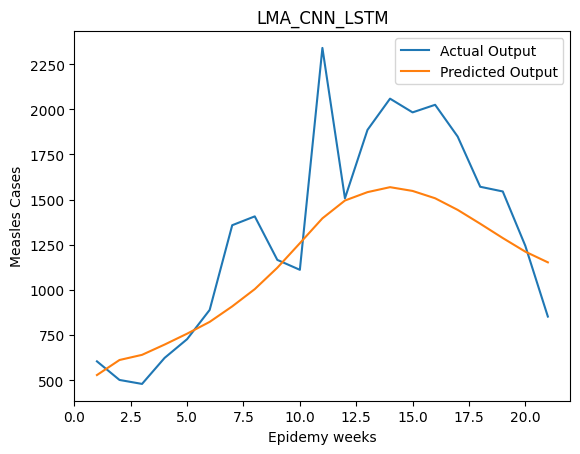

In [46]:
#LMA Optimization of Ensemble LSTM
from scipy.optimize import minimize
Training_inpt_normalize,Training_ouput_normalize = split_function( measles_epidemy_training, 4,3)
testing_inpt_normalize,testing_ouput_normalize = split_function( measles_epidemy_testing, 4,3)
val_input_normalize,val_ouput_normalize= split_function( measles_epidemy_val, 4,1)
n_seq = 2
n_step= 2
n_features = 1
Training_inpt_normalize =Training_inpt_normalize.reshape((Training_inpt_normalize.shape[0],n_seq,n_step,n_features))
testing_inpt_normalize = testing_inpt_normalize.reshape((testing_inpt_normalize.shape[0],n_seq,n_step,n_features))
val_input_normalize= val_input_normalize.reshape((val_input_normalize.shape[0],n_seq,n_step,n_features))
def ensemble_LMA_model(filters,num_neurons):
    model = Sequential()
    model.add(TimeDistributed(Conv1D(filters=filters, kernel_size=1, activation='relu', input_shape=(n_seq, n_step, n_features))))
    model.add(TimeDistributed(MaxPooling1D(pool_size=2)))
    model.add(TimeDistributed(Flatten()))
    model.add(LSTM(num_neurons, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=0.001), loss= 'mean_squared_error',metrics=['RootMeanSquaredError'],) 
    return model

def cost_fn(params):
  
    filters=int(params[0])
    num_neurons=int(params[1])
    
    ensemble_model=ensemble_LMA_model(filters,num_neurons)
    ensemble_model.fit(Training_inpt_normalize,Training_ouput_normalize, epochs=50 , validation_data=(val_input_normalize,val_ouput_normalize), verbose=0)
    out_predict=ensemble_model.predict(testing_inpt_normalize)
    cost = np.mean(np.square(testing_ouput_normalize - out_predict))
    #arr.append(cost)
    return cost
params = np.array([50,50])
result =minimize(cost_fn, params , method='L-BFGS-B', options={'disp': True}) 

LMA_ensemble_best_model = ensemble_LMA_model(int(result.x[0]),int(result.x[1]))
history=LMA_ensemble_best_model.fit(Training_inpt_normalize,Training_ouput_normalize, epochs=100 ,validation_data=(val_input_normalize,val_ouput_normalize), verbose=0)
loss,rms = LMA_ensemble_best_model.evaluate(testing_inpt_normalize,testing_ouput_normalize)
print('LMA_Optimized_Model Loss:',loss)
print('LMA_Optimized_Model RMS:',rms)
print('Filter:',int(result.x[0]))
print(' Neurons:',int(result.x[1]))

# Extract Predicted Vaalue for gradient Base LSTM for Longterm visuals

x_input = testing_inpt_normalize[0]
temp_input = list(x_input.ravel())

lst_output = []
i = 0
while i < 21:
    if len(temp_input) > 4:
        
        x_input = array(temp_input[1:])
        
        x_input = x_input.reshape((1,n_seq,n_step,n_features))
        yhat = LMA_ensemble_best_model.predict(x_input, verbose=1)
        
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        lst_output.append(yhat[0][0])
        i += 1
    else:
        
        x_input = x_input.reshape((1,n_seq,n_step,n_features))
        yhat = LMA_ensemble_best_model.predict(x_input, verbose=0)
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i += 1

test_data = np.array(testing_ouput_normalize[:21])
Actual_data = test_data * sd + mn
predict_data = np.array(lst_output) * sd + mn

print("Actual output: ", Actual_data)
print("Predicted output: ", predict_data)
epi_weeks= np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21],dtype=int)

plt.plot(epi_weeks,Actual_data, label='Actual Output')
plt.plot(epi_weeks,predict_data, label='Predicted Output')
plt.xlabel('Epidemy weeks')
plt.ylabel('Measles Cases')
plt.title("LMA_CNN_LSTM")
plt.legend()
plt.show()

In [80]:
test_data_20weeks['LMA_CNN_LSTM']=predict_data
test_data_20weeks

,Year,Week,cases,incidence_per_100000,CCC,epi_stages,GS_LSTM,PSOS_LSTM,LMA_CNN_LSTM
0,1964,1,167,0.92,167,Initial,556.374023,593.746033,713.916504
1,1964,2,305,1.68,472,Initial,625.383911,605.885437,813.050049
2,1964,3,401,2.21,873,Initial,667.453003,627.080017,929.341980
3,1964,4,544,3.00,1417,Pre-peak,708.030640,646.072632,1043.918823
4,1964,5,604,3.33,2021,Pre-peak,768.890930,665.169800,1176.815186
5,1964,6,501,2.76,2522,Pre-peak,849.136353,684.352295,1333.797852
6,1964,7,479,2.64,3001,Pre-peak,932.678589,703.591614,1472.682373
7,1964,8,623,3.43,3624,Pre-peak,1033.306396,723.086365,1578.127686
8,1964,9,727,4.01,4351,Pre-peak,1138.993652,742.807861,1646.263916
9,1964,10,889,4.90,5240,Pre-peak,1238.335327,762.749268,1683.819336


Trial 3 Complete [00h 04m 39s]
val_root_mean_squared_error: 0.2420397698879242

Best val_root_mean_squared_error So Far: 0.2377646416425705
Total elapsed time: 00h 38m 04s
INFO:tensorflow:Oracle triggered exit


2023-05-01 19:54:36,133 - tensorflow - INFO - Oracle triggered exit


Results summary
Results in logs\Bayesian Search
Showing 10 best trials
Trial summary
Hyperparameters:
units: 90
activation: tanh
dropout: 0.1
learning_rate: 0.0001
Score: 0.2377646416425705
Trial summary
Hyperparameters:
units: 10
activation: relu
dropout: 0.1
learning_rate: 0.0001
Score: 0.2420397698879242
Trial summary
Hyperparameters:
units: 120
activation: tanh
dropout: 0.3
learning_rate: 0.01
Score: 0.24439547955989838
1/1 [==============================] - 0s 39ms/step
Actual output:  [ 501.  479.  623.  727.  889. 1358. 1407. 1166. 1111. 2340. 1507. 1886.
 2059. 1983. 2025. 1849. 1571. 1545. 1244.  852.  465.]
Predicted output:  [ 600.8555   647.8186   676.03955  694.05115  717.6194   743.1731
  763.8444   786.26013  809.1056   831.1868   853.1757   875.47327
  897.47736  919.37103  941.2166   962.904    984.39075 1005.696
 1026.7587  1047.5371  1068.0006 ]


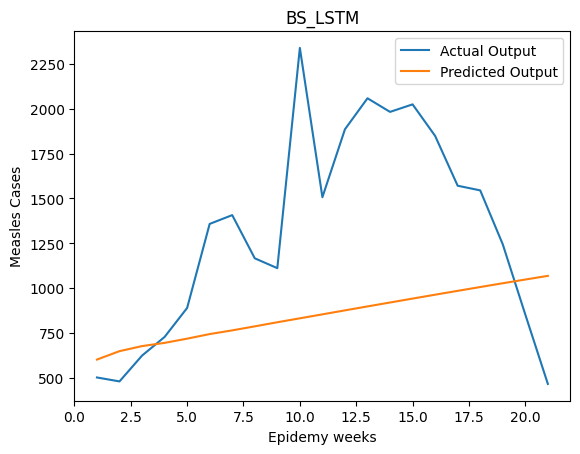

In [50]:
#Bayesian Based Single Layered LSTM model
Training_inpt_normalize,Training_ouput_normalize = split_function( measles_epidemy_training, 5,3)
testing_inpt_normalize,testing_ouput_normalize = split_function( measles_epidemy_testing,5 ,3)
val_input_normalize,val_ouput_normalize= split_function( measles_epidemy_val, 5,1)
n_features = 1
Training_inpt_normalize = Training_inpt_normalize.reshape((Training_inpt_normalize.shape[0],Training_inpt_normalize.shape[1],n_features))
testing_inpt_normalize = testing_inpt_normalize.reshape(testing_inpt_normalize.shape[0],testing_inpt_normalize.shape[1],n_features)
val_input_normalize =val_input_normalize.reshape(val_input_normalize.shape[0],val_input_normalize.shape[1],n_features)

from kerastuner.tuners import BayesianOptimization
from kerastuner import Objective
def create_model(hp):
    model = Sequential()
    model.add(LSTM(hp.Int('units',min_value=10,max_value=150,step=10), activation= hp.Choice('activation',['relu','tanh']), input_shape=(Training_inpt_normalize.shape[1],n_features), dropout=hp.Choice('dropout',values=[0.1,0.3])))
    model.add(Dense(1))
    model.compile(optimizer= tf.keras.optimizers.Adam(hp.Choice('learning_rate',values=[1e-2,1e-4])), loss= 'mean_squared_error',metrics=['RootMeanSquaredError'],) 
    return model   
tuner = BayesianOptimization(create_model,objective= Objective("val_root_mean_squared_error", direction="min"), overwrite=True,
                                 max_trials=3, executions_per_trial=1, directory='logs',project_name='Bayesian Search')
tuner.search_space_summary()
tuner.search(Training_inpt_normalize,Training_ouput_normalize,epochs=600,validation_data=(val_input_normalize,val_ouput_normalize),verbose=1)
tuner.results_summary()
#%tensorboard  --logdir='logs\\norm' --port 5000
Bayesian_singleLayer_best_model = tuner.get_best_models()[0]
# Extract Predicted Vaalue for gradient Base LSTM for Longterm visuals

x_input = testing_inpt_normalize[0]
temp_input = list(x_input.ravel())

lst_output = []
i = 0
while i < 21:
    if len(temp_input) > 5:
        
        x_input = array(temp_input[1:])
        
        x_input = x_input.reshape((1,x_input.shape[0],n_features))
        yhat = Bayesian_singleLayer_best_model.predict(x_input, verbose=1)
        
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        lst_output.append(yhat[0][0])
        i += 1
    else:
        
        x_input = x_input.reshape((1,x_input.shape[0],n_features))
        yhat = Bayesian_singleLayer_best_model.predict(x_input, verbose=0)
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i += 1

test_data = np.array(testing_ouput_normalize[:21])
Actual_data = test_data * sd + mn
predict_data = np.array(lst_output) * sd + mn

print("Actual output: ", Actual_data)
print("Predicted output: ", predict_data)
epi_weeks= np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21],dtype=int)

plt.plot(epi_weeks,Actual_data, label='Actual Output')
plt.plot(epi_weeks,predict_data, label='Predicted Output')
plt.xlabel('Epidemy weeks')
plt.ylabel('Measles Cases')
plt.title("BS_LSTM")
plt.legend()
plt.show()

In [174]:
! powershell "echo 'checking for existing tensorboard processes'"
! powershell "ps | Where-Object {$_.ProcessName -eq 'tensorboard'}"

! powershell "ps | Where-Object {$_.ProcessName -eq 'tensorboard'}| %{kill $_}"

! powershell "echo 'cleaning tensorboard temp dir'"
! powershell "rm $env:TEMP\.tensorboard-info\*"

! powershell "ps | Where-Object {$_.ProcessName -eq 'tensorboard'}"

checking for existing tensorboard processes
cleaning tensorboard temp dir


In [49]:
Bayesian_singleLayer_best_model.ge

Results summary
Results in logs\Bayesian Search
Showing 10 best trials
Trial summary
Hyperparameters:
filters: 42
activation: relu
units: 30
learning_rate: 0.0001
Score: 0.2363075315952301
Trial summary
Hyperparameters:
filters: 150
activation: tanh
units: 10
learning_rate: 0.0001
Score: 0.24190069735050201
Trial summary
Hyperparameters:
filters: 18
activation: relu
units: 110
learning_rate: 0.01
Score: 0.24190083146095276


In [78]:
tuner.results_summary()

Results summary
Results in logs\Bayesian Search
Showing 10 best trials
Trial summary
Hyperparameters:
units: 50
activation: relu
dropout: 0.1
learning_rate: 0.01
Score: 0.15424782037734985
Trial summary
Hyperparameters:
units: 10
activation: tanh
dropout: 0.1
learning_rate: 0.0001
Score: 0.16151152551174164
Trial summary
Hyperparameters:
units: 70
activation: relu
dropout: 0.3
learning_rate: 0.01
Score: 0.17264918982982635


1/1 [==============================] - 0s 52ms/step
Actual output:  [ 501.  479.  623.  727.  889. 1358. 1407. 1166. 1111. 2340. 1507. 1886.
 2059. 1983. 2025. 1849. 1571. 1545. 1244.  852.  465.]
Predicted output:  [ 646.9039   723.7973   799.3236   859.8229   932.74854 1007.8473
 1067.005   1116.0452  1143.5897  1156.1564  1151.5925  1137.3799
 1117.5735  1094.3821  1069.4253  1045.5574  1024.1433  1006.89185
  991.4929   975.9866   960.6726 ]


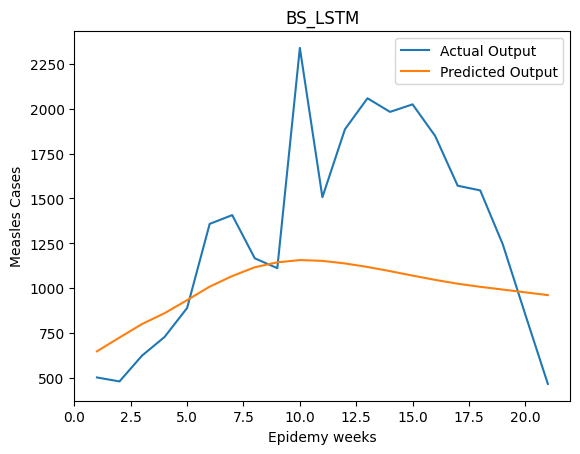

In [82]:
test_data_20weeks['BS_LSTM']=predict_data
test_data_20weeks

,Year,Week,cases,incidence_per_100000,CCC,epi_stages,GS_LSTM,PSOS_LSTM,LMA_CNN_LSTM,BS_LSTM
0,1964,1,167,0.92,167,Initial,556.374023,593.746033,713.916504,701.614868
1,1964,2,305,1.68,472,Initial,625.383911,605.885437,813.050049,818.072144
2,1964,3,401,2.21,873,Initial,667.453003,627.080017,929.341980,900.717834
3,1964,4,544,3.00,1417,Pre-peak,708.030640,646.072632,1043.918823,1024.375610
4,1964,5,604,3.33,2021,Pre-peak,768.890930,665.169800,1176.815186,1215.549316
5,1964,6,501,2.76,2522,Pre-peak,849.136353,684.352295,1333.797852,1378.761841
6,1964,7,479,2.64,3001,Pre-peak,932.678589,703.591614,1472.682373,1460.358154
7,1964,8,623,3.43,3624,Pre-peak,1033.306396,723.086365,1578.127686,1503.762695
8,1964,9,727,4.01,4351,Pre-peak,1138.993652,742.807861,1646.263916,1374.782593
9,1964,10,889,4.90,5240,Pre-peak,1238.335327,762.749268,1683.819336,1284.114136


Trial 3 Complete [00h 02m 59s]
val_mae: 0.1536259800195694

Best val_mae So Far: 0.14677248895168304
Total elapsed time: 00h 20m 58s
INFO:tensorflow:Oracle triggered exit
Results summary
Results in logs\Bayesian Search
Showing 10 best trials
Trial summary
Hyperparameters:
units: 130
activation: tanh
dropout: 0.3
learning_rate: 0.0001
Score: 0.14677248895168304
Trial summary
Hyperparameters:
units: 140
activation: tanh
dropout: 0.3
learning_rate: 0.01
Score: 0.14766228199005127
Trial summary
Hyperparameters:
units: 10
activation: tanh
dropout: 0.3
learning_rate: 0.0001
Score: 0.1536259800195694
1/1 [==============================] - 0s 28ms/step
Actual output:  [ 727.  889. 1358. 1407. 1166. 1111. 2340. 1507. 1886. 2059. 1983. 2025.
 1849. 1571. 1545. 1244.  852.  465.  453.  234.  230.]
Predicted output:  [ 650.3026   707.65344  756.82983  808.5886   902.5704  1041.9598
 1173.2273  1279.114   1393.9331  1462.0535  1492.9076  1492.94
 1469.2146  1427.3516  1370.763   1298.4523  1209.953

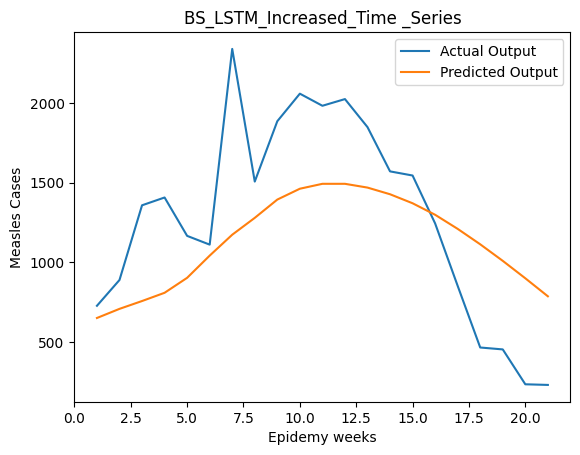

In [53]:
#Bayesian Based Single Layered LSTM model with increased input series
Training_inpt_normalize,Training_ouput_normalize = split_function( measles_epidemy_training, 8,3)
testing_inpt_normalize,testing_ouput_normalize = split_function( measles_epidemy_testing,8 ,3)
val_input_normalize,val_ouput_normalize= split_function( measles_epidemy_val, 8,1)
n_features = 1
Training_inpt_normalize = Training_inpt_normalize.reshape((Training_inpt_normalize.shape[0],Training_inpt_normalize.shape[1],n_features))
testing_inpt_normalize = testing_inpt_normalize.reshape(testing_inpt_normalize.shape[0],testing_inpt_normalize.shape[1],n_features)
val_input_normalize =val_input_normalize.reshape(val_input_normalize.shape[0],val_input_normalize.shape[1],n_features)
import matplotlib.pyplot as plt
from kerastuner.tuners import BayesianOptimization
from kerastuner import Objective
def create_model(hp):
    model = Sequential()
    model.add(LSTM(hp.Int('units',min_value=10,max_value=150,step=10), activation= hp.Choice('activation',['relu','tanh']), input_shape=(Training_inpt_normalize.shape[1],n_features), dropout=hp.Choice('dropout',values=[0.1,0.3])))
    model.add(Dense(1))
    model.compile(optimizer= tf.keras.optimizers.Adam(hp.Choice('learning_rate',values=[1e-2,1e-4])), loss= 'mean_squared_error',metrics=['mae'],) 
    return model   
tuner = BayesianOptimization(create_model,objective= Objective("val_mae", direction="min"), overwrite=True,
                                 max_trials=3, executions_per_trial=1, directory='logs',project_name='Bayesian Search')
tuner.search_space_summary()
tuner.search(Training_inpt_normalize,Training_ouput_normalize,epochs=400,validation_data=(val_input_normalize,val_ouput_normalize),verbose=1)
tuner.results_summary()
Bayesian_singleLayer_best_model = tuner.get_best_models()[0]
# Extract Predicted Vaalue for gradient Base LSTM for Longterm visuals

x_input = testing_inpt_normalize[0]
temp_input = list(x_input.ravel())

lst_output = []
i = 0
while i < 21:
    if len(temp_input) > 8:
        
        x_input = array(temp_input[1:])
        
        x_input = x_input.reshape((1,x_input.shape[0],n_features))
        yhat = Bayesian_singleLayer_best_model.predict(x_input, verbose=1)
        
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        lst_output.append(yhat[0][0])
        i += 1
    else:
        
        x_input = x_input.reshape((1,x_input.shape[0],n_features))
        yhat = Bayesian_singleLayer_best_model.predict(x_input, verbose=0)
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i += 1

test_data = np.array(testing_ouput_normalize[:21])
Actual_data = test_data * sd + mn
predict_data = np.array(lst_output) * sd + mn

print("Actual output: ", Actual_data)
print("Predicted output: ", predict_data)
epi_weeks= np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21],dtype=int)

plt.plot(epi_weeks,Actual_data, label='Actual Output')
plt.plot(epi_weeks,predict_data, label='Predicted Output')
plt.xlabel('Epidemy weeks')
plt.ylabel('Measles Cases')
plt.title("BS_LSTM_Increased_Time _Series")
plt.legend()
plt.show()

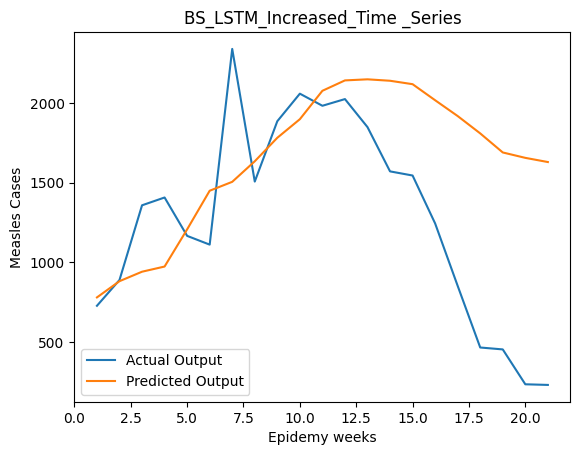

In [8]:
import matplotlib.pyplot as plt
plt.plot(epi_weeks,Actual_data, label='Actual Output')
plt.plot(epi_weeks,predict_data, label='Predicted Output')
plt.xlabel('Epidemy weeks')
plt.ylabel('Measles Cases')
plt.title("BS_LSTM_Increased_Time _Series")
plt.legend()
plt.show()

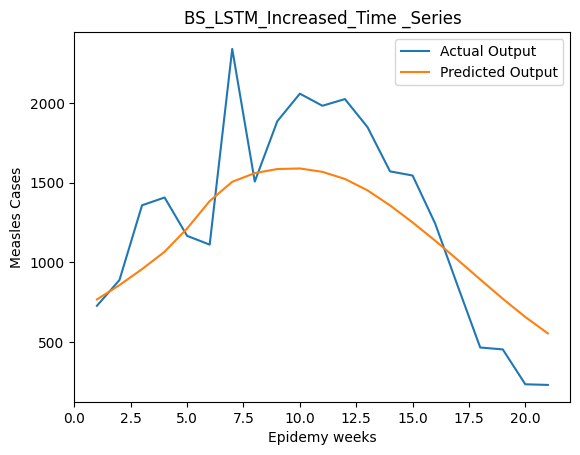

In [81]:
plt.plot(epi_weeks,Actual_data, label='Actual Output')
plt.plot(epi_weeks,predict_data, label='Predicted Output')
plt.xlabel('Epidemy weeks')
plt.ylabel('Measles Cases')
plt.title("BS_LSTM_Increased_Time _Series")
plt.legend()
plt.show()

In [219]:
#Bayesian Based Multi-layered LSTM 
def create_multiLayered_model(hp):
    model = Sequential()
    model.add(LSTM(hp.Int('units',min_value=10,max_value=150,step=10),return_sequences=True,activation= hp.Choice('activation',['relu','tanh']), input_shape=(Training_inpt_normalize.shape[1],n_features), dropout=0.1))
    for i in range(hp.Int('layers',2,5)):
        i=i+1
        model.add(LSTM(hp.Int('units_'+ str(i),min_value=10,max_value=100,step=10),return_sequences=True, activation=hp.Choice('activation',['relu','tanh']),dropout=hp.Choice('dropout',values=[0.1,0.25])))
        
    model.add(Dense(1))
    model.compile(optimizer= tf.keras.optimizers.Adam(hp.Choice('learning_rate',values=[1e-2,1e-4])), loss= 'mean_squared_error',metrics=['RootMeanSquaredError'],) 
    return model 
tuner = BayesianOptimization(create_multiLayered_model,objective= Objective("val_root_mean_squared_error", direction="min"), overwrite=True,
                                 max_trials=5, executions_per_trial=1, directory='logs',project_name='Bayesian Search')
tuner.search_space_summary()

Search space summary
Default search space size: 7
units (Int)
{'default': None, 'conditions': [], 'min_value': 10, 'max_value': 150, 'step': 10, 'sampling': None}
activation (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'tanh'], 'ordered': False}
layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 5, 'step': 1, 'sampling': None}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 10, 'max_value': 100, 'step': 10, 'sampling': None}
dropout (Choice)
{'default': 0.1, 'conditions': [], 'values': [0.1, 0.25], 'ordered': True}
units_2 (Int)
{'default': None, 'conditions': [], 'min_value': 10, 'max_value': 100, 'step': 10, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.0001], 'ordered': True}


In [220]:
tuner.search(Training_inpt_normalize,Training_ouput_normalize,epochs=200,validation_split=0.2,callbacks=[callbacks],verbose=1)

Trial 5 Complete [00h 28m 13s]
val_root_mean_squared_error: 0.6510227918624878

Best val_root_mean_squared_error So Far: 0.6507447957992554
Total elapsed time: 05h 52m 19s
INFO:tensorflow:Oracle triggered exit


INFO:tensorflow:Oracle triggered exit


In [221]:
#tuner.search(Training_inpt_normalize,Training_ouput_normalize,epochs=200,validation_split=0.2,callbacks=[callbacks],verbose=1)
tuner.results_summary()

Results summary
Results in logs\Bayesian Search
Showing 10 best trials
Trial summary
Hyperparameters:
units: 20
activation: relu
layers: 5
units_1: 10
dropout: 0.1
units_2: 90
learning_rate: 0.0001
units_3: 50
units_4: 10
units_5: 10
Score: 0.6507447957992554
Trial summary
Hyperparameters:
units: 50
activation: relu
layers: 3
units_1: 90
dropout: 0.25
units_2: 90
learning_rate: 0.0001
units_3: 10
Score: 0.6509141325950623
Trial summary
Hyperparameters:
units: 40
activation: relu
layers: 5
units_1: 10
dropout: 0.1
units_2: 10
learning_rate: 0.0001
units_3: 100
units_4: 20
units_5: 20
Score: 0.6509307622909546
Trial summary
Hyperparameters:
units: 10
activation: relu
layers: 5
units_1: 10
dropout: 0.25
units_2: 100
learning_rate: 0.0001
units_3: 100
units_4: 10
units_5: 10
Score: 0.6510227918624878
Trial summary
Hyperparameters:
units: 10
activation: tanh
layers: 5
units_1: 10
dropout: 0.1
units_2: 100
learning_rate: 0.0001
units_3: 10
units_4: 10
units_5: 10
Score: 0.65114426612854


In [222]:
tuner.get_best_hyperparameters()[0].values

{'units': 20,
 'activation': 'relu',
 'layers': 5,
 'units_1': 10,
 'dropout': 0.1,
 'units_2': 90,
 'learning_rate': 0.0001,
 'units_3': 50,
 'units_4': 10,
 'units_5': 10}

Trial 3 Complete [00h 15m 09s]
val_mae: nan

Best val_mae So Far: 0.1499725878238678
Total elapsed time: 00h 23m 53s
INFO:tensorflow:Oracle triggered exit
Results summary
Results in logs\Bayesian Search
Showing 10 best trials
Trial summary
Hyperparameters:
units: 50
dropout: 0.1
learning_rate: 0.01
Score: 0.1499725878238678
Trial summary
Hyperparameters:
units: 60
dropout: 0.3
learning_rate: 0.0001
Score: 0.15803103148937225
Trial summary
Hyperparameters:
units: 150
dropout: 0.1
learning_rate: 0.01
Score: nan
1/1 [==============================] - 0s 21ms/step
Actual output:  [ 727.  889. 1358. 1407. 1166. 1111. 2340. 1507. 1886. 2059. 1983. 2025.
 1849. 1571. 1545. 1244.  852.  465.  453.  234.  230.]
Predicted output:  [565.59985 565.542   560.34827 552.04517 543.5847  535.47    526.7562
 518.1608  511.0253  504.17044 498.0333  492.5748  487.74484 483.50427
 479.8073  476.59412 473.81265 471.4174  469.36023 467.5982  466.0939 ]


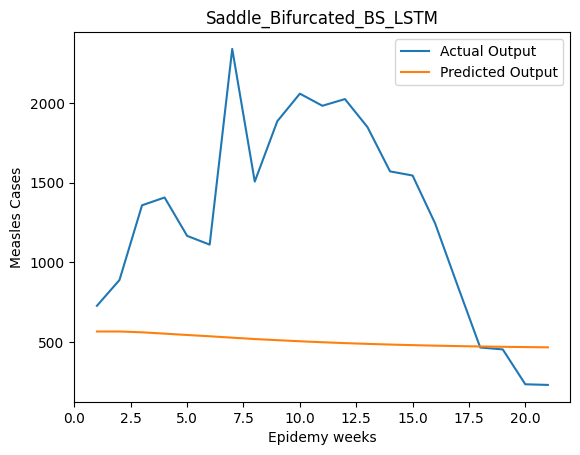

In [47]:
#Saddle Bifurcated Bayesian Based Single Layered LSTM model with increased input series
Training_inpt_normalize,Training_ouput_normalize = split_function( measles_epidemy_training, 8,3)
testing_inpt_normalize,testing_ouput_normalize = split_function( measles_epidemy_testing,8 ,3)
val_input_normalize,val_ouput_normalize= split_function( measles_epidemy_val, 8,1)
n_features = 1
Training_inpt_normalize = Training_inpt_normalize.reshape((Training_inpt_normalize.shape[0],Training_inpt_normalize.shape[1],n_features))
testing_inpt_normalize = testing_inpt_normalize.reshape(testing_inpt_normalize.shape[0],testing_inpt_normalize.shape[1],n_features)
val_input_normalize =val_input_normalize.reshape(val_input_normalize.shape[0],val_input_normalize.shape[1],n_features)
import matplotlib.pyplot as plt
from kerastuner.tuners import BayesianOptimization
from kerastuner import Objective
def saddle_bifurcation(x):
    return tf.square(x)-0.5
def create_model(hp):
    model = Sequential()
    model.add(LSTM(hp.Int('units',min_value=10,max_value=150,step=10), activation=saddle_bifurcation , input_shape=(Training_inpt_normalize.shape[1],n_features), dropout=hp.Choice('dropout',values=[0.1,0.3])))
    model.add(Dense(1))
    model.compile(optimizer= tf.keras.optimizers.Adam(hp.Choice('learning_rate',values=[1e-2,1e-4])), loss= 'mean_squared_error',metrics=['mae'],) 
    return model   
tuner = BayesianOptimization(create_model,objective= Objective("val_mae", direction="min"), overwrite=True,
                                 max_trials=3, executions_per_trial=1, directory='logs',project_name='Bayesian Search')
tuner.search_space_summary()
tuner.search(Training_inpt_normalize,Training_ouput_normalize,epochs=600,validation_data=(val_input_normalize,val_ouput_normalize),verbose=1)
tuner.results_summary()
Bayesian_singleLayer_best_model = tuner.get_best_models()[0]
# Extract Predicted Vaalue for gradient Base LSTM for Longterm visuals

x_input = testing_inpt_normalize[0]
temp_input = list(x_input.ravel())

lst_output = []
i = 0
while i < 21:
    if len(temp_input) > 8:
        
        x_input = array(temp_input[1:])
        
        x_input = x_input.reshape((1,x_input.shape[0],n_features))
        yhat = Bayesian_singleLayer_best_model.predict(x_input, verbose=1)
        
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        lst_output.append(yhat[0][0])
        i += 1
    else:
        
        x_input = x_input.reshape((1,x_input.shape[0],n_features))
        yhat = Bayesian_singleLayer_best_model.predict(x_input, verbose=0)
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i += 1

test_data = np.array(testing_ouput_normalize[:21])
Actual_data = test_data * sd + mn
predict_data = np.array(lst_output) * sd + mn

print("Actual output: ", Actual_data)
print("Predicted output: ", predict_data)
epi_weeks= np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21],dtype=int)

plt.plot(epi_weeks,Actual_data, label='Actual Output')
plt.plot(epi_weeks,predict_data, label='Predicted Output')
plt.xlabel('Epidemy weeks')
plt.ylabel('Measles Cases')
plt.title("Saddle_Bifurcated_BS_LSTM")
plt.legend()
plt.show()

In [33]:
#Transcritical Bifurcated Bayesian Based Single Layered LSTM model with increased input series
Training_inpt_normalize,Training_ouput_normalize = split_function( measles_epidemy_training, 8,3)
testing_inpt_normalize,testing_ouput_normalize = split_function( measles_epidemy_testing,8 ,3)
val_input_normalize,val_ouput_normalize= split_function( measles_epidemy_val, 8,1)
n_features = 1
Training_inpt_normalize = Training_inpt_normalize.reshape((Training_inpt_normalize.shape[0],Training_inpt_normalize.shape[1],n_features))
testing_inpt_normalize = testing_inpt_normalize.reshape(testing_inpt_normalize.shape[0],testing_inpt_normalize.shape[1],n_features)
val_input_normalize =val_input_normalize.reshape(val_input_normalize.shape[0],val_input_normalize.shape[1],n_features)
import matplotlib.pyplot as plt
from kerastuner.tuners import BayesianOptimization
from kerastuner import Objective
def Transcritical_bifurcation(x):
    return tf.keras.activations.sigmoid(0.5-x)
def create_model(hp):
    model = Sequential()
    model.add(LSTM(hp.Int('units',min_value=10,max_value=150,step=10), activation=Transcritical_bifurcation , input_shape=(Training_inpt_normalize.shape[1],n_features), dropout=hp.Choice('dropout',values=[0.1,0.3])))
    model.add(Dense(1))
    model.compile(optimizer= tf.keras.optimizers.Adam(hp.Choice('learning_rate',values=[1e-2,1e-4])), loss= 'mean_squared_error',metrics=['RootMeanSquaredError'],) 
    return model   
tuner = BayesianOptimization(create_model,objective= Objective("val_root_mean_squared_error", direction="min"), overwrite=True,
                                 max_trials=3, executions_per_trial=1, directory='logs',project_name='Bayesian Search')
tuner.search_space_summary()
tuner.search(Training_inpt_normalize,Training_ouput_normalize,epochs=1000,validation_data=(val_input_normalize,val_ouput_normalize),verbose=1)
tuner.results_summary()
Bayesian_singleLayer_best_model = tuner.get_best_models()[0]
# Extract Predicted Vaalue for gradient Base LSTM for Longterm visuals

x_input = testing_inpt_normalize[0]
temp_input = list(x_input.ravel())

lst_output = []
i = 0
while i < 21:
    if len(temp_input) > 8:
        
        x_input = array(temp_input[1:])
        
        x_input = x_input.reshape((1,x_input.shape[0],n_features))
        yhat = Bayesian_singleLayer_best_model.predict(x_input, verbose=1)
        
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        lst_output.append(yhat[0][0])
        i += 1
    else:
        
        x_input = x_input.reshape((1,x_input.shape[0],n_features))
        yhat = Bayesian_singleLayer_best_model.predict(x_input, verbose=0)
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i += 1

test_data = np.array(testing_ouput_normalize[:21])
Actual_data = test_data * sd + mn
predict_data = np.array(lst_output) * sd + mn

print("Actual output: ", Actual_data)
print("Predicted output: ", predict_data)
epi_weeks= np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21],dtype=int)

plt.plot(epi_weeks,Actual_data, label='Actual Output')
plt.plot(epi_weeks,predict_data, label='Predicted Output')
plt.xlabel('Epidemy weeks')
plt.ylabel('Measles Cases')
plt.title("Transcritical_Bifurcated_BS_LSTM")
plt.legend()
plt.show()

Search space summary
Default search space size: 3
units (Int)
{'default': None, 'conditions': [], 'min_value': 10, 'max_value': 150, 'step': 10, 'sampling': None}
dropout (Choice)
{'default': 0.1, 'conditions': [], 'values': [0.1, 0.3], 'ordered': True}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.0001], 'ordered': True}

Search: Running Trial #1

Value             |Best Value So Far |Hyperparameter
100               |?                 |units
0.1               |?                 |dropout
0.0001            |?                 |learning_rate

Epoch 1/1000
35/35 [==============================] - 3s 43ms/step - loss: 1.1900 - root_mean_squared_error: 1.0909 - val_loss: 0.4942 - val_root_mean_squared_error: 0.7030
Epoch 2/1000
35/35 [==============================] - 1s 36ms/step - loss: 1.1352 - root_mean_squared_error: 1.0655 - val_loss: 0.4996 - val_root_mean_squared_error: 0.7068
Epoch 3/1000
35/35 [==============================] - 2s 50ms/step - loss: 

KeyboardInterrupt: 

Trial 3 Complete [00h 05m 02s]
val_root_mean_squared_error: nan

Best val_root_mean_squared_error So Far: 0.22570355236530304
Total elapsed time: 15h 42m 29s
INFO:tensorflow:Oracle triggered exit
Results summary
Results in logs\Bayesian Search
Showing 10 best trials
Trial summary
Hyperparameters:
units: 140
dropout: 0.3
learning_rate: 0.0001
Score: 0.22570355236530304
Trial summary
Hyperparameters:
units: 150
dropout: 0.3
learning_rate: 0.01
Score: nan
Trial summary
Hyperparameters:
units: 50
dropout: 0.3
learning_rate: 0.01
Score: nan
1/1 [==============================] - 0s 21ms/step
Actual output:  [ 727.  889. 1358. 1407. 1166. 1111. 2340. 1507. 1886. 2059. 1983. 2025.
 1849. 1571. 1545. 1244.  852.  465.  453.  234.  230.]
Predicted output:  [ 657.5025   698.6502   738.8002   781.0179   836.65936  904.4932
  964.7     1013.18616 1070.7933  1124.4694  1172.4121  1210.9674
 1236.8158  1250.1722  1253.3771  1245.9474  1226.4341  1198.1566
 1162.9891  1123.1776  1080.7657 ]


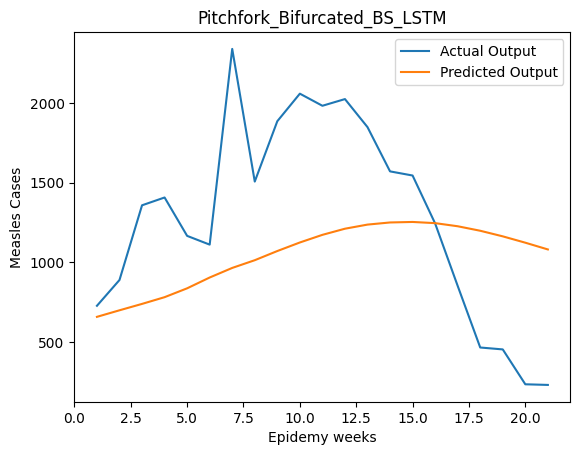

In [52]:
#Pitchfork Bifurcated Bayesian Based Single Layered LSTM model with increased input series
Training_inpt_normalize,Training_ouput_normalize = split_function( measles_epidemy_training, 8,3)
testing_inpt_normalize,testing_ouput_normalize = split_function( measles_epidemy_testing,8 ,3)
val_input_normalize,val_ouput_normalize= split_function( measles_epidemy_val, 8,1)
n_features = 1
Training_inpt_normalize = Training_inpt_normalize.reshape((Training_inpt_normalize.shape[0],Training_inpt_normalize.shape[1],n_features))
testing_inpt_normalize = testing_inpt_normalize.reshape(testing_inpt_normalize.shape[0],testing_inpt_normalize.shape[1],n_features)
val_input_normalize =val_input_normalize.reshape(val_input_normalize.shape[0],val_input_normalize.shape[1],n_features)
import matplotlib.pyplot as plt
from kerastuner.tuners import BayesianOptimization
from kerastuner import Objective
def Pitchfork_bifurcation(x):
    return tf.math.pow(x,3) - 1*x
def create_model(hp):
    model = Sequential()
    model.add(LSTM(hp.Int('units',min_value=10,max_value=150,step=10), activation=Pitchfork_bifurcation, input_shape=(Training_inpt_normalize.shape[1],n_features), dropout=hp.Choice('dropout',values=[0.1,0.3])))
    model.add(Dense(1))
    model.compile(optimizer= tf.keras.optimizers.Adam(hp.Choice('learning_rate',values=[1e-2,1e-4])), loss= 'mean_squared_error',metrics=['RootMeanSquaredError'],) 
    return model   
tuner = BayesianOptimization(create_model,objective= Objective("val_root_mean_squared_error", direction="min"), overwrite=True,
                                 max_trials=3, executions_per_trial=1, directory='logs',project_name='Bayesian Search')
tuner.search_space_summary()
tuner.search(Training_inpt_normalize,Training_ouput_normalize,epochs=800,validation_data=(val_input_normalize,val_ouput_normalize),verbose=1)
tuner.results_summary()
Bayesian_singleLayer_best_model = tuner.get_best_models()[0]
# Extract Predicted Vaalue for gradient Base LSTM for Longterm visuals

x_input = testing_inpt_normalize[0]
temp_input = list(x_input.ravel())

lst_output = []
i = 0
while i < 21:
    if len(temp_input) > 8:
        
        x_input = array(temp_input[1:])
        
        x_input = x_input.reshape((1,x_input.shape[0],n_features))
        yhat = Bayesian_singleLayer_best_model.predict(x_input, verbose=1)
        
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        lst_output.append(yhat[0][0])
        i += 1
    else:
        
        x_input = x_input.reshape((1,x_input.shape[0],n_features))
        yhat = Bayesian_singleLayer_best_model.predict(x_input, verbose=0)
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i += 1

test_data = np.array(testing_ouput_normalize[:21])
Actual_data = test_data * sd + mn
predict_data = np.array(lst_output) * sd + mn

print("Actual output: ", Actual_data)
print("Predicted output: ", predict_data)
epi_weeks= np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21],dtype=int)

plt.plot(epi_weeks,Actual_data, label='Actual Output')
plt.plot(epi_weeks,predict_data, label='Predicted Output')
plt.xlabel('Epidemy weeks')
plt.ylabel('Measles Cases')
plt.title("Pitchfork_Bifurcated_BS_LSTM")
plt.legend()
plt.show()

In [7]:
#more testing datset
# Split Normalized Data into Training and Test Data
measles_epidemy_training = list()
measles_epidemy_1964_testing = list()
measles_epidemy_1962_testing = list()
#measles_epidemy_1961_testing = list()
measles_epidemy_1958_to_1961_val = list()

for i in range(len(measles_epidemic_stages)):
    if measles_epidemic_stages.loc[i,'Year'] < 1958:
        measles_epidemy_training.append(measles_epidemic_stages_normalize.loc[i])
    elif measles_epidemic_stages.loc[i,'Year'] >= 1958 and measles_epidemic_stages.loc[i,'Year']<=1961  :
        measles_epidemy_1958_to_1961_val.append(measles_epidemic_stages_normalize.loc[i])
    elif measles_epidemic_stages.loc[i,'Year'] == 1962:  
         measles_epidemy_1962_testing.append(measles_epidemic_stages_normalize.loc[i])
    elif measles_epidemic_stages.loc[i,'Year'] == 1964:
        measles_epidemy_1964_testing.append(measles_epidemic_stages_normalize.loc[i])

In [8]:
from numpy import array
# Univariate Time Series Data Preparation
def split_function(measles_seq, input_time_steps,output_time_steps):
    time_series_inputSeq = list()
    time_series_outpuSeq = list()
    for eachSeq_index in range(len(measles_seq)):
        end_of_timeSteps = eachSeq_index  + input_time_steps
        if end_of_timeSteps > len(measles_seq) - 1 :
            break
        inputSeq = measles_seq[eachSeq_index : end_of_timeSteps]
        outpuSeq = measles_seq[end_of_timeSteps]
        time_series_inputSeq.append(inputSeq)
        time_series_outpuSeq.append(outpuSeq)
        #print(inputSeq,outpuSeq)
        #print('\n')
    return array(time_series_inputSeq), array(time_series_outpuSeq)

Trial 4 Complete [00h 02m 52s]
val_root_mean_squared_error: 0.21939726173877716

Best val_root_mean_squared_error So Far: 0.21729731559753418
Total elapsed time: 00h 17m 28s
INFO:tensorflow:Oracle triggered exit
Results summary
Results in logs\Bayesian Search
Showing 10 best trials
Trial summary
Hyperparameters:
units: 80
activation: relu
dropout: 0.1
learning_rate: 0.0001
Score: 0.21729731559753418
Trial summary
Hyperparameters:
units: 10
activation: relu
dropout: 0.1
learning_rate: 0.01
Score: 0.21939726173877716
Trial summary
Hyperparameters:
units: 30
activation: tanh
dropout: 0.1
learning_rate: 0.0001
Score: 0.22173607349395752
Trial summary
Hyperparameters:
units: 150
activation: relu
dropout: 0.3
learning_rate: 0.0001
Score: 0.23521573841571808
1/1 [==============================] - 0s 18ms/step
Actual output:  [1116. 1225. 1101. 1326. 1377. 1754. 1488. 1339. 1015. 1443. 1142. 1167.
 1011.  929.  952.  955.  609.  446.  384.  305.  237.]
Predicted output:  [ 823.3378   926.33936

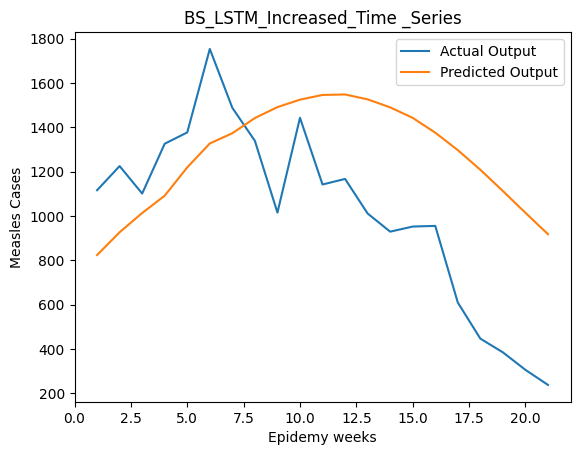

In [8]:
#Bayesian Based Single Layered LSTM model with increased input series, tested with 1962 dataset
Training_inpt_normalize,Training_ouput_normalize = split_function( measles_epidemy_training, 8,3)
testing_inpt_normalize,testing_ouput_normalize = split_function( measles_epidemy_1962_testing,8 ,3)
val_input_normalize,val_ouput_normalize= split_function(  measles_epidemy_1958_to_1961_val, 8,1)
n_features = 1
Training_inpt_normalize = Training_inpt_normalize.reshape((Training_inpt_normalize.shape[0],Training_inpt_normalize.shape[1],n_features))
testing_inpt_normalize = testing_inpt_normalize.reshape(testing_inpt_normalize.shape[0],testing_inpt_normalize.shape[1],n_features)
val_input_normalize =val_input_normalize.reshape(val_input_normalize.shape[0],val_input_normalize.shape[1],n_features)
import matplotlib.pyplot as plt
from kerastuner.tuners import BayesianOptimization
from kerastuner import Objective
def create_model(hp):
    model = Sequential()
    model.add(LSTM(hp.Int('units',min_value=10,max_value=150,step=10), activation= hp.Choice('activation',['relu','tanh']), input_shape=(Training_inpt_normalize.shape[1],n_features), dropout=hp.Choice('dropout',values=[0.1,0.3])))
    model.add(Dense(1))
    model.compile(optimizer= tf.keras.optimizers.Adam(hp.Choice('learning_rate',values=[1e-2,1e-4])), loss= 'mean_squared_error',metrics=['RootMeanSquaredError'],) 
    return model   
tuner = BayesianOptimization(create_model,objective= Objective("val_root_mean_squared_error", direction="min"), overwrite=True,
                                 max_trials=4, executions_per_trial=1, directory='logs',project_name='Bayesian Search')
tuner.search_space_summary()
tuner.search(Training_inpt_normalize,Training_ouput_normalize,epochs=500,validation_data=(val_input_normalize,val_ouput_normalize),verbose=1)
tuner.results_summary()
Bayesian_singleLayer_best_model = tuner.get_best_models()[0]

# Extract Predicted Vaalue for gradient Base LSTM for Longterm visuals

x_input = testing_inpt_normalize[0]
temp_input = list(x_input.ravel())

lst_output = []
i = 0
while i < 21:
    if len(temp_input) > 8:
        
        x_input = array(temp_input[1:])
        
        x_input = x_input.reshape((1,x_input.shape[0],n_features))
        yhat = Bayesian_singleLayer_best_model.predict(x_input, verbose=1)
        
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        lst_output.append(yhat[0][0])
        i += 1
    else:
        
        x_input = x_input.reshape((1,x_input.shape[0],n_features))
        yhat = Bayesian_singleLayer_best_model.predict(x_input, verbose=0)
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i += 1

test_data = np.array(testing_ouput_normalize[:21])
Actual_data = test_data * sd + mn
predict_data = np.array(lst_output) * sd + mn

print("Actual output: ", Actual_data)
print("Predicted output: ", predict_data)
epi_weeks= np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21],dtype=int)

plt.plot(epi_weeks,Actual_data, label='Actual Output')
plt.plot(epi_weeks,predict_data, label='Predicted Output')
plt.xlabel('Epidemy weeks')
plt.ylabel('Measles Cases')
plt.title("BS_LSTM_Increased_Time _Series")
plt.legend()
plt.show()

In [10]:
print('evaluate for the first twenty weeeks:{}'.format(Bayesian_singleLayer_best_model.evaluate(testing_inpt_normalize[:21],testing_ouput_normalize[:21])))

1/1 [==============================] - 0s 363ms/step - loss: 0.0358 - root_mean_squared_error: 0.1893
evaluate for the first twenty weeeks:[0.03581934794783592, 0.18926000595092773]


Trial 4 Complete [00h 03m 39s]
val_root_mean_squared_error: 0.22182874381542206

Best val_root_mean_squared_error So Far: 0.22182874381542206
Total elapsed time: 00h 25m 03s
INFO:tensorflow:Oracle triggered exit
Results summary
Results in logs\Bayesian Search
Showing 10 best trials
Trial summary
Hyperparameters:
units: 20
activation: relu
dropout: 0.1
learning_rate: 0.01
Score: 0.22182874381542206
Trial summary
Hyperparameters:
units: 100
activation: relu
dropout: 0.1
learning_rate: 0.01
Score: 0.22220288217067719
Trial summary
Hyperparameters:
units: 10
activation: relu
dropout: 0.1
learning_rate: 0.0001
Score: 0.22510570287704468
Trial summary
Hyperparameters:
units: 140
activation: tanh
dropout: 0.3
learning_rate: 0.01
Score: 0.23454590141773224
1/1 [==============================] - 0s 34ms/step
Actual output:  [ 727.  889. 1358. 1407. 1166. 1111. 2340. 1507. 1886. 2059. 1983. 2025.
 1849. 1571. 1545. 1244.  852.  465.  453.  234.  230.]
Predicted output:  [ 660.9703    740.01843  

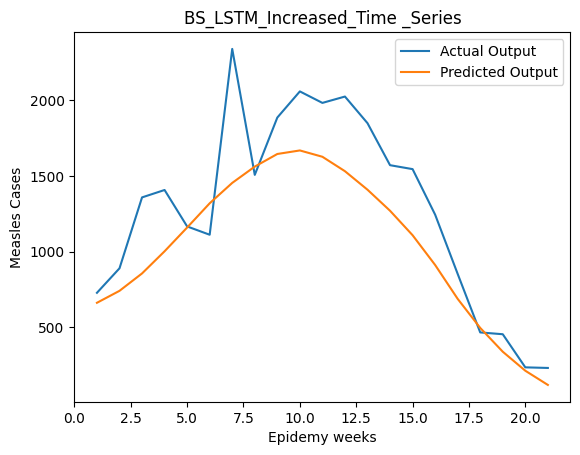

In [85]:
#Bayesian Based Single Layered LSTM model with increased input series, tested with 1964 dataset
Training_inpt_normalize,Training_ouput_normalize = split_function( measles_epidemy_training, 8,3)
testing_inpt_normalize,testing_ouput_normalize = split_function( measles_epidemy_1964_testing,8 ,3)
val_input_normalize,val_ouput_normalize= split_function(  measles_epidemy_1958_to_1961_val, 8,1)
n_features = 1
Training_inpt_normalize = Training_inpt_normalize.reshape((Training_inpt_normalize.shape[0],Training_inpt_normalize.shape[1],n_features))
testing_inpt_normalize = testing_inpt_normalize.reshape(testing_inpt_normalize.shape[0],testing_inpt_normalize.shape[1],n_features)
val_input_normalize =val_input_normalize.reshape(val_input_normalize.shape[0],val_input_normalize.shape[1],n_features)
import matplotlib.pyplot as plt
from kerastuner.tuners import BayesianOptimization
from kerastuner import Objective
def create_model(hp):
    model = Sequential()
    model.add(LSTM(hp.Int('units',min_value=10,max_value=150,step=10), activation= hp.Choice('activation',['relu','tanh']), input_shape=(Training_inpt_normalize.shape[1],n_features), dropout=hp.Choice('dropout',values=[0.1,0.3])))
    model.add(Dense(1))
    model.compile(optimizer= tf.keras.optimizers.Adam(hp.Choice('learning_rate',values=[1e-2,1e-4])), loss= 'mean_squared_error',metrics=['RootMeanSquaredError'],) 
    return model   
tuner = BayesianOptimization(create_model,objective= Objective("val_root_mean_squared_error", direction="min"), overwrite=True,
                                 max_trials=4, executions_per_trial=1, directory='logs',project_name='Bayesian Search')
tuner.search_space_summary()
tuner.search(Training_inpt_normalize,Training_ouput_normalize,epochs=500,validation_data=(val_input_normalize,val_ouput_normalize),verbose=1)
tuner.results_summary()
Bayesian_singleLayer_best_model = tuner.get_best_models()[0]

# Extract Predicted Vaalue for gradient Base LSTM for Longterm visuals

x_input = testing_inpt_normalize[0]
temp_input = list(x_input.ravel())

lst_output = []
i = 0
while i < 21:
    if len(temp_input) > 8:
        
        x_input = array(temp_input[1:])
        
        x_input = x_input.reshape((1,x_input.shape[0],n_features))
        yhat = Bayesian_singleLayer_best_model.predict(x_input, verbose=1)
        
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        lst_output.append(yhat[0][0])
        i += 1
    else:
        
        x_input = x_input.reshape((1,x_input.shape[0],n_features))
        yhat = Bayesian_singleLayer_best_model.predict(x_input, verbose=0)
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i += 1

test_data = np.array(testing_ouput_normalize[:21])
Actual_data = test_data * sd + mn
predict_data = np.array(lst_output) * sd + mn

print("Actual output: ", Actual_data)
print("Predicted output: ", predict_data)
epi_weeks= np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21],dtype=int)

plt.plot(epi_weeks,Actual_data, label='Actual Output')
plt.plot(epi_weeks,predict_data, label='Predicted Output')
plt.xlabel('Epidemy weeks')
plt.ylabel('Measles Cases')
plt.title("BS_LSTM_Increased_Time _Series")
plt.legend()
plt.show()

In [86]:
print('evaluate for the first twenty weeeks:{}'.format(Bayesian_singleLayer_best_model.evaluate(testing_inpt_normalize[:21],testing_ouput_normalize[:21])))

1/1 [==============================] - 0s 466ms/step - loss: 0.0860 - root_mean_squared_error: 0.2933
evaluate for the first twenty weeeks:[0.08600381761789322, 0.2932640612125397]


Trial 4 Complete [00h 06m 00s]
val_root_mean_squared_error: 0.22007189691066742

Best val_root_mean_squared_error So Far: 0.22007189691066742
Total elapsed time: 00h 18m 37s
INFO:tensorflow:Oracle triggered exit
Results summary
Results in logs\auto_kerastunning_singlelayer_200epchs
Showing 10 best trials
Trial summary
Hyperparameters:
units: 130
activation: tanh
dropout: 0.1
learning_rate: 0.0001
Score: 0.22007189691066742
Trial summary
Hyperparameters:
units: 100
activation: tanh
dropout: 0.3
learning_rate: 0.0001
Score: 0.2270219624042511
Trial summary
Hyperparameters:
units: 50
activation: relu
dropout: 0.3
learning_rate: 0.01
Score: 0.23006115853786469
Trial summary
Hyperparameters:
units: 20
activation: relu
dropout: 0.3
learning_rate: 0.0001
Score: 0.24418601393699646
[-0.4674852227300012, -0.4733759315413758, -0.16705907334989709, -0.22596616146364298, -0.43214096986175365, -0.1405508836987114, -0.06888059316032055, -0.023043374]
1/1 [==============================] - 0s 38ms/st

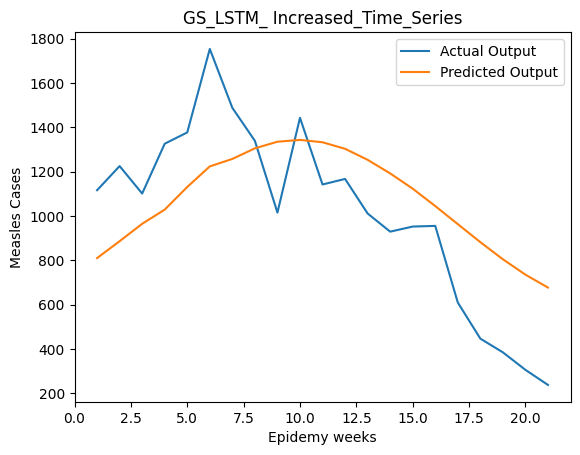

In [11]:
#Inncrease Input series time steps for GS_LSTM WITH 1962 DATA
import keras_tuner
Training_inpt_normalize,Training_ouput_normalize = split_function( measles_epidemy_training, 8,3)
testing_inpt_normalize,testing_ouput_normalize = split_function( measles_epidemy_1962_testing,8 ,3)
val_input_normalize,val_ouput_normalize= split_function(  measles_epidemy_1958_to_1961_val, 8,1)
n_features = 1
Training_inpt_normalize = Training_inpt_normalize.reshape((Training_inpt_normalize.shape[0],Training_inpt_normalize.shape[1],n_features))
testing_inpt_normalize = testing_inpt_normalize.reshape(testing_inpt_normalize.shape[0],testing_inpt_normalize.shape[1],n_features)
val_input_normalize =val_input_normalize.reshape(val_input_normalize.shape[0],val_input_normalize.shape[1],n_features)
def create_model(hp):
    model = Sequential()
    model.add(LSTM(hp.Int('units',min_value=10,max_value=150,step=10), activation= hp.Choice('activation',['relu','tanh']), input_shape=(Training_inpt_normalize.shape[1],n_features), dropout=hp.Choice('dropout',values=[0.1,0.3])))
    model.add(Dense(1))
    model.compile(optimizer= tf.keras.optimizers.Adam(hp.Choice('learning_rate',values=[1e-2,1e-4])), loss= 'mean_squared_error',metrics=['RootMeanSquaredError'],) 
    return model 
#Checking out the search space of the single layer
tuner = keras_tuner.RandomSearch(create_model,objective= keras_tuner.Objective("val_root_mean_squared_error", direction="min"), overwrite=True,
                                 max_trials=4, executions_per_trial=1, directory='logs',project_name='auto_kerastunning_singlelayer_200epchs')
tuner.search_space_summary()
#Seraching for best fit
tuner.search(Training_inpt_normalize,Training_ouput_normalize,epochs=500,validation_data=(val_input_normalize,val_ouput_normalize))
#Seraching for best fit
measles_timeseries_model = tuner.get_best_models()[0]
# validation split at 600 epochs
tuner.results_summary()
# Extract Predicted Vaalue for gradient Base LSTM for Longterm visuals
import matplotlib.pyplot as plt
x_input = testing_inpt_normalize[0]
temp_input = list(x_input.ravel())

lst_output = []
i = 0
while i < 21:
    if len(temp_input) > 8:
        print(temp_input[1:])
        x_input = array(temp_input[1:])
        x_input= x_input = x_input.reshape((1,x_input.shape[0],n_features))
        yhat = measles_timeseries_model.predict(x_input, verbose=1)
        
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        lst_output.append(yhat[0][0])
        i += 1
    else:
        x_input= x_input = x_input.reshape((1,x_input.shape[0],n_features))
        yhat = measles_timeseries_model.predict(x_input, verbose=0)
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i += 1

test_data = np.array(testing_ouput_normalize[:21])
Actual_data = test_data * sd + mn
predict_data = np.array(lst_output) * sd + mn

print("Actual output: ", Actual_data)
print("Predicted output: ", predict_data)
epi_weeks= np.arange(1,22)

plt.plot(epi_weeks,Actual_data, label='Actual Output')
plt.plot(epi_weeks,predict_data, label='Predicted Output')
plt.xlabel('Epidemy weeks')
plt.ylabel('Measles Cases')
plt.title("GS_LSTM_ Increased_Time_Series")
plt.legend()
plt.show()

In [12]:
print('evaluate for the first twenty weeeks:{}'.format(measles_timeseries_model.evaluate(testing_inpt_normalize[:21],testing_ouput_normalize[:21])))

1/1 [==============================] - 1s 1s/step - loss: 0.0336 - root_mean_squared_error: 0.1833
evaluate for the first twenty weeeks:[0.03359679505228996, 0.18329428136348724]


In [42]:
#Sadddle Bifurcated GS_LSTM 1962 data
Training_inpt_normalize,Training_ouput_normalize = split_function( measles_epidemy_training, 8,3)
testing_inpt_normalize,testing_ouput_normalize = split_function( measles_epidemy_1962_testing,8 ,3)
val_input_normalize,val_ouput_normalize= split_function(  measles_epidemy_1958_to_1961_val, 8,1)
n_features = 1
Training_inpt_normalize = Training_inpt_normalize.reshape((Training_inpt_normalize.shape[0],Training_inpt_normalize.shape[1],n_features))
testing_inpt_normalize = testing_inpt_normalize.reshape(testing_inpt_normalize.shape[0],testing_inpt_normalize.shape[1],n_features)
val_input_normalize =val_input_normalize.reshape(val_input_normalize.shape[0],val_input_normalize.shape[1],n_features)
import keras_tuner
def saddle_bifurcation(x):
    return tf.square(x)- 2.5

def create_model(hp):
    model = Sequential()
    model.add(LSTM(hp.Int('units',min_value=10,max_value=150,step=10), activation= saddle_bifurcation, input_shape=(Training_inpt_normalize.shape[1],n_features), dropout=hp.Choice('dropout',values=[0.1,0.3])))
    model.add(Dense(1))
    model.compile(optimizer= tf.keras.optimizers.Adam(hp.Choice('learning_rate',values=[1e-2,1e-4])), loss= 'mean_squared_error',metrics=['RootMeanSquaredError'],) 
    return model 
#Checking out the search space of the single layer
tuner = keras_tuner.RandomSearch(create_model,objective= keras_tuner.Objective("val_root_mean_squared_error", direction="min"), overwrite=True,
                                 max_trials=3, executions_per_trial=1, directory='logs',project_name='auto_kerastunning_singlelayer_200epchs')
tuner.search_space_summary()
#Seraching for best fit
tuner.search(Training_inpt_normalize,Training_ouput_normalize,epochs=700,validation_data=(val_input_normalize,val_ouput_normalize))
#Seraching for best fit
measles_timeseries_model = tuner.get_best_models()[0]
# validation split at 600 epochs
tuner.results_summary()
# Extract Predicted Vaalue for gradient Base LSTM for Longterm visuals
import matplotlib.pyplot as plt
x_input = testing_inpt_normalize[0]
temp_input = list(x_input.ravel())

lst_output = []
i = 0
while i < 21:
    if len(temp_input) > 8:
        print(temp_input[1:])
        x_input = array(temp_input[1:])
        x_input= x_input = x_input.reshape((1,x_input.shape[0],n_features))
        yhat = measles_timeseries_model.predict(x_input, verbose=1)
        
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        lst_output.append(yhat[0][0])
        i += 1
    else:
        x_input= x_input = x_input.reshape((1,x_input.shape[0],n_features))
        yhat = measles_timeseries_model.predict(x_input, verbose=0)
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i += 1

test_data = np.array(testing_ouput_normalize[:21])
Actual_data = test_data * sd + mn
predict_data = np.array(lst_output) * sd + mn

print("Actual output: ", Actual_data)
print("Predicted output: ", predict_data)
epi_weeks= np.arange(1,22)

plt.plot(epi_weeks,Actual_data, label='Actual Output')
plt.plot(epi_weeks,predict_data, label='Predicted Output')
plt.xlabel('Epidemy weeks')
plt.ylabel('Measles Cases')
plt.title("Saddle_Bifurcated_GS_LSTM")
plt.legend()
plt.show()

Search space summary
Default search space size: 3
units (Int)
{'default': None, 'conditions': [], 'min_value': 10, 'max_value': 150, 'step': 10, 'sampling': None}
dropout (Choice)
{'default': 0.1, 'conditions': [], 'values': [0.1, 0.3], 'ordered': True}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.0001], 'ordered': True}

Search: Running Trial #1

Value             |Best Value So Far |Hyperparameter
20                |?                 |units
0.3               |?                 |dropout
0.0001            |?                 |learning_rate

Epoch 1/700
36/36 [==============================] - 4s 22ms/step - loss: nan - root_mean_squared_error: nan - val_loss: nan - val_root_mean_squared_error: nan
Epoch 2/700
36/36 [==============================] - 0s 11ms/step - loss: nan - root_mean_squared_error: nan - val_loss: nan - val_root_mean_squared_error: nan
Epoch 3/700
36/36 [==============================] - 0s 10ms/step - loss: nan - root_mean_squared_err

KeyboardInterrupt: 

In [27]:
print('evaluate for the first twenty weeeks:{}'.format(measles_timeseries_model.evaluate(testing_inpt_normalize[:21],testing_ouput_normalize[:21])))

1/1 [==============================] - 1s 521ms/step - loss: 0.0337 - root_mean_squared_error: 0.1836
evaluate for the first twenty weeeks:[0.033693477511405945, 0.18355783820152283]


Trial 3 Complete [00h 04m 06s]
val_root_mean_squared_error: 0.2335292398929596

Best val_root_mean_squared_error So Far: 0.22012129426002502
Total elapsed time: 00h 15m 02s
INFO:tensorflow:Oracle triggered exit
Results summary
Results in logs\auto_kerastunning_singlelayer_200epchs
Showing 10 best trials
Trial summary
Hyperparameters:
units: 90
dropout: 0.1
learning_rate: 0.01
Score: 0.22012129426002502
Trial summary
Hyperparameters:
units: 120
dropout: 0.3
learning_rate: 0.01
Score: 0.22905583679676056
Trial summary
Hyperparameters:
units: 80
dropout: 0.3
learning_rate: 0.01
Score: 0.2335292398929596
[-0.4674852227300012, -0.4733759315413758, -0.16705907334989709, -0.22596616146364298, -0.43214096986175365, -0.1405508836987114, -0.06888059316032055, 0.047696672]
1/1 [==============================] - 0s 22ms/step
[-0.4733759315413758, -0.16705907334989709, -0.22596616146364298, -0.43214096986175365, -0.1405508836987114, -0.06888059316032055, 0.047696672, 0.17202961]
1/1 [==============

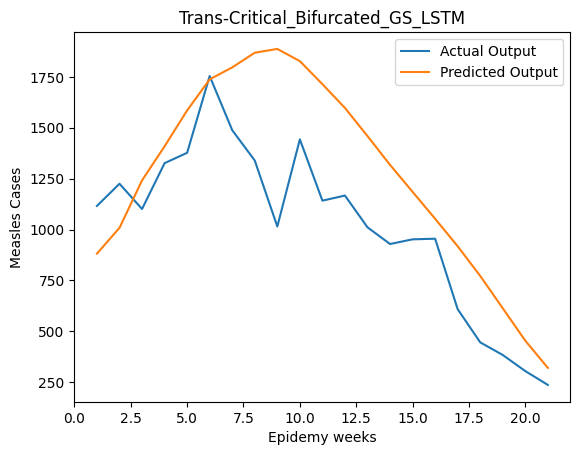

In [53]:
print('evaluate for the first twenty weeeks:{}'.format(measles_timeseries_model.evaluate(testing_inpt_normalize[:21],testing_ouput_normalize[:21])))

In [55]:
print('evaluate for the first twenty weeeks:{}'.format(measles_timeseries_model.evaluate(testing_inpt_normalize[:21],testing_ouput_normalize[:21])))

1/1 [==============================] - 0s 58ms/step - loss: 0.0349 - root_mean_squared_error: 0.1869
evaluate for the first twenty weeeks:[0.034925881773233414, 0.18688467144966125]


In [84]:
#Pitchfork Bifurcation GS_LSTM 1962 data
import keras_tuner
Training_inpt_normalize,Training_ouput_normalize = split_function( measles_epidemy_training, 8,3)
testing_inpt_normalize,testing_ouput_normalize = split_function( measles_epidemy_1962_testing,8 ,3)
val_input_normalize,val_ouput_normalize= split_function(  measles_epidemy_1958_to_1961_val, 8,1)
n_features = 1
Training_inpt_normalize = Training_inpt_normalize.reshape((Training_inpt_normalize.shape[0],Training_inpt_normalize.shape[1],n_features))
testing_inpt_normalize = testing_inpt_normalize.reshape(testing_inpt_normalize.shape[0],testing_inpt_normalize.shape[1],n_features)
val_input_normalize =val_input_normalize.reshape(val_input_normalize.shape[0],val_input_normalize.shape[1],n_features)
def Pitchfork_bifurcation(x):
    return tf.math.pow(x,3) - 2.5*x
def create_model(hp):
    model = Sequential()
    model.add(LSTM(hp.Int('units',min_value=10,max_value=150,step=10), activation= Pitchfork_bifurcation, input_shape=(Training_inpt_normalize.shape[1],n_features), dropout=hp.Choice('dropout',values=[0.1,0.3])))
    model.add(Dense(1))
    model.compile(optimizer= tf.keras.optimizers.Adam(hp.Choice('learning_rate',values=[1e-2,1e-4])), loss= 'mean_squared_error',metrics=['RootMeanSquaredError'],) 
    return model 
#Checking out the search space of the single layer
tuner = keras_tuner.RandomSearch(create_model,objective= keras_tuner.Objective("val_root_mean_squared_error", direction="min"), overwrite=True,
                                 max_trials=3, executions_per_trial=1, directory='logs',project_name='auto_kerastunning_singlelayer_200epchs')
tuner.search_space_summary()
#Seraching for best fit
tuner.search(Training_inpt_normalize,Training_ouput_normalize,epochs=1500,validation_data=(val_input_normalize,val_ouput_normalize))
#Seraching for best fit
measles_timeseries_model = tuner.get_best_models()[0]
# validation split at 600 epochs
tuner.results_summary()
# Extract Predicted Vaalue for gradient Base LSTM for Longterm visuals
import matplotlib.pyplot as plt
x_input = testing_inpt_normalize[0]
temp_input = list(x_input.ravel())

lst_output = []
i = 0
while i < 21:
    if len(temp_input) > 8:
        print(temp_input[1:])
        x_input = array(temp_input[1:])
        x_input= x_input = x_input.reshape((1,x_input.shape[0],n_features))
        yhat = measles_timeseries_model.predict(x_input, verbose=1)
        
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        lst_output.append(yhat[0][0])
        i += 1
    else:
        x_input= x_input = x_input.reshape((1,x_input.shape[0],n_features))
        yhat = measles_timeseries_model.predict(x_input, verbose=0)
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i += 1

test_data = np.array(testing_ouput_normalize[:21])
Actual_data = test_data * sd + mn
predict_data = np.array(lst_output) * sd + mn

print("Actual output: ", Actual_data)
print("Predicted output: ", predict_data)
epi_weeks= np.arange(1,22)

plt.plot(epi_weeks,Actual_data, label='Actual Output')
plt.plot(epi_weeks,predict_data, label='Predicted Output')
plt.xlabel('Epidemy weeks')
plt.ylabel('Measles Cases')
plt.title("Pitchfork_Bifurcated_GS_LSTM")
plt.legend()
plt.show()

Search space summary
Default search space size: 3
units (Int)
{'default': None, 'conditions': [], 'min_value': 10, 'max_value': 150, 'step': 10, 'sampling': None}
dropout (Choice)
{'default': 0.1, 'conditions': [], 'values': [0.1, 0.3], 'ordered': True}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.0001], 'ordered': True}

Search: Running Trial #1

Value             |Best Value So Far |Hyperparameter
20                |?                 |units
0.1               |?                 |dropout
0.0001            |?                 |learning_rate

Epoch 1/1500
36/36 [==============================] - 4s 21ms/step - loss: nan - root_mean_squared_error: nan - val_loss: nan - val_root_mean_squared_error: nan
Epoch 2/1500
36/36 [==============================] - 0s 10ms/step - loss: nan - root_mean_squared_error: nan - val_loss: nan - val_root_mean_squared_error: nan
Epoch 3/1500
36/36 [==============================] - 0s 10ms/step - loss: nan - root_mean_squared_

KeyboardInterrupt: 

In [76]:
print('evaluate for the first twenty weeeks:{}'.format(measles_timeseries_model.evaluate(testing_inpt_normalize[:21],testing_ouput_normalize[:21])))

1/1 [==============================] - 1s 822ms/step - loss: 0.0427 - root_mean_squared_error: 0.2067
evaluate for the first twenty weeeks:[0.042716290801763535, 0.20667919516563416]


In [34]:
#Saddle Bifurcated Bayesian Based Single Layered LSTM model with increased input series 1962
Training_inpt_normalize,Training_ouput_normalize = split_function( measles_epidemy_training, 8,3)
testing_inpt_normalize,testing_ouput_normalize = split_function( measles_epidemy_1962_testing,8 ,3)
val_input_normalize,val_ouput_normalize= split_function(  measles_epidemy_1958_to_1961_val, 8,1)
n_features = 1
Training_inpt_normalize = Training_inpt_normalize.reshape((Training_inpt_normalize.shape[0],Training_inpt_normalize.shape[1],n_features))
testing_inpt_normalize = testing_inpt_normalize.reshape(testing_inpt_normalize.shape[0],testing_inpt_normalize.shape[1],n_features)
val_input_normalize =val_input_normalize.reshape(val_input_normalize.shape[0],val_input_normalize.shape[1],n_features)
import matplotlib.pyplot as plt
from kerastuner.tuners import BayesianOptimization
from kerastuner import Objective
def saddle_bifurcation(x):
    return tf.square(x)-2.5
def create_model(hp):
    model = Sequential()
    model.add(LSTM(hp.Int('units',min_value=10,max_value=150,step=10), activation=saddle_bifurcation , input_shape=(Training_inpt_normalize.shape[1],n_features), dropout=hp.Choice('dropout',values=[0.1,0.3])))
    model.add(Dense(1))
    model.compile(optimizer= tf.keras.optimizers.Adam(hp.Choice('learning_rate',values=[1e-2,1e-4])), loss= 'mean_squared_error',metrics=['RootMeanSquaredError'],) 
    return model   
tuner = BayesianOptimization(create_model,objective= Objective("val_root_mean_squared_error", direction="min"), overwrite=True,
                                 max_trials=3, executions_per_trial=1, directory='logs',project_name='Bayesian Search')
tuner.search_space_summary()
tuner.search(Training_inpt_normalize,Training_ouput_normalize,epochs=100,validation_data=(val_input_normalize,val_ouput_normalize),verbose=1)
tuner.results_summary()
Bayesian_singleLayer_saddle = tuner.get_best_models()[0]
# Extract Predicted Vaalue for gradient Base LSTM for Longterm visuals

x_input = testing_inpt_normalize[0]
temp_input = list(x_input.ravel())

lst_output = []
i = 0
while i < 21:
    if len(temp_input) > 8:
        
        x_input = array(temp_input[1:])
        
        x_input = x_input.reshape((1,x_input.shape[0],n_features))
        yhat = Bayesian_singleLayer_saddle.predict(x_input, verbose=1)
        
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        lst_output.append(yhat[0][0])
        i += 1
    else:
        x_input = x_input.reshape((1,x_input.shape[0],n_features))
        yhat = Bayesian_singleLayer_saddle.predict(x_input, verbose=0)
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i += 1
test_data = np.array(testing_ouput_normalize[:21])
Actual_data = test_data * sd + mn
predict_data = np.array(lst_output) * sd + mn

print("Actual output: ", Actual_data)
print("Predicted output: ", predict_data)
epi_weeks= np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21],dtype=int)

plt.plot(epi_weeks,Actual_data, label='Actual Output')
plt.plot(epi_weeks,predict_data, label='Predicted Output')
plt.xlabel('Epidemy weeks')
plt.ylabel('Measles Cases')
plt.title("Saddle_Bifurcated_BS_LSTM")
plt.legend()
plt.show()

Search space summary
Default search space size: 3
units (Int)
{'default': None, 'conditions': [], 'min_value': 10, 'max_value': 150, 'step': 10, 'sampling': None}
dropout (Choice)
{'default': 0.1, 'conditions': [], 'values': [0.1, 0.3], 'ordered': True}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.0001], 'ordered': True}

Search: Running Trial #1

Value             |Best Value So Far |Hyperparameter
50                |?                 |units
0.3               |?                 |dropout
0.0001            |?                 |learning_rate

Epoch 1/100
36/36 [==============================] - 5s 29ms/step - loss: nan - root_mean_squared_error: nan - val_loss: nan - val_root_mean_squared_error: nan
Epoch 2/100
36/36 [==============================] - 0s 13ms/step - loss: nan - root_mean_squared_error: nan - val_loss: nan - val_root_mean_squared_error: nan
Epoch 3/100
36/36 [==============================] - 0s 13ms/step - loss: nan - root_mean_squared_err

KeyboardInterrupt: 

In [28]:
print('evaluate for the first twenty weeeks:{}'.format(Bayesian_singleLayer_saddle.evaluate(testing_inpt_normalize[:21],testing_ouput_normalize[:21])))

1/1 [==============================] - 1s 731ms/step - loss: 0.0303 - root_mean_squared_error: 0.1740
evaluate for the first twenty weeeks:[0.030292050912976265, 0.1740461140871048]


In [105]:
#Saddle Bifurcated Bayesian Based Single Layered LSTM model with increased input series 1964
Training_inpt_normalize,Training_ouput_normalize = split_function( measles_epidemy_training, 8,3)
testing_inpt_normalize,testing_ouput_normalize = split_function( measles_epidemy_1964_testing,8 ,3)
val_input_normalize,val_ouput_normalize= split_function(  measles_epidemy_1958_to_1961_val, 8,1)
n_features = 1
Training_inpt_normalize = Training_inpt_normalize.reshape((Training_inpt_normalize.shape[0],Training_inpt_normalize.shape[1],n_features))
testing_inpt_normalize = testing_inpt_normalize.reshape(testing_inpt_normalize.shape[0],testing_inpt_normalize.shape[1],n_features)
val_input_normalize =val_input_normalize.reshape(val_input_normalize.shape[0],val_input_normalize.shape[1],n_features)
import matplotlib.pyplot as plt
from kerastuner.tuners import BayesianOptimization
from kerastuner import Objective
def saddle_bifurcation(x):
    return tf.square(x)-2.5
def create_model(hp):
    model = Sequential()
    model.add(LSTM(hp.Int('units',min_value=10,max_value=150,step=10), activation=saddle_bifurcation , input_shape=(Training_inpt_normalize.shape[1],n_features), dropout=hp.Choice('dropout',values=[0.1,0.3])))
    model.add(Dense(1))
    model.compile(optimizer= tf.keras.optimizers.Adam(hp.Choice('learning_rate',values=[1e-2,1e-4])), loss= 'mean_squared_error',metrics=['RootMeanSquaredError'],) 
    return model   
tuner = BayesianOptimization(create_model,objective= Objective("val_root_mean_squared_error", direction="min"), overwrite=True,
                                 max_trials=3, executions_per_trial=1, directory='logs',project_name='Bayesian Search')
tuner.search_space_summary()
tuner.search(Training_inpt_normalize,Training_ouput_normalize,epochs=500,validation_data=(val_input_normalize,val_ouput_normalize),verbose=1)
tuner.results_summary()
Bayesian_singleLayer_saddle = tuner.get_best_models()[0]
# Extract Predicted Vaalue for gradient Base LSTM for Longterm visuals

x_input = testing_inpt_normalize[0]
temp_input = list(x_input.ravel())

lst_output = []
i = 0
while i < 21:
    if len(temp_input) > 8:
        
        x_input = array(temp_input[1:])
        
        x_input = x_input.reshape((1,x_input.shape[0],n_features))
        yhat = Bayesian_singleLayer_saddle.predict(x_input, verbose=1)
        
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        lst_output.append(yhat[0][0])
        i += 1
    else:
        x_input = x_input.reshape((1,x_input.shape[0],n_features))
        yhat = Bayesian_singleLayer_saddle.predict(x_input, verbose=0)
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i += 1
test_data = np.array(testing_ouput_normalize[:21])
Actual_data = test_data * sd + mn
predict_data = np.array(lst_output) * sd + mn

print("Actual output: ", Actual_data)
print("Predicted output: ", predict_data)
epi_weeks= np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21],dtype=int)

plt.plot(epi_weeks,Actual_data, label='Actual Output')
plt.plot(epi_weeks,predict_data, label='Predicted Output')
plt.xlabel('Epidemy weeks')
plt.ylabel('Measles Cases')
plt.title("Saddle_Bifurcated_BS_LSTM")
plt.legend()
plt.show()

Search space summary
Default search space size: 3
units (Int)
{'default': None, 'conditions': [], 'min_value': 10, 'max_value': 150, 'step': 10, 'sampling': None}
dropout (Choice)
{'default': 0.1, 'conditions': [], 'values': [0.1, 0.3], 'ordered': True}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.0001], 'ordered': True}

Search: Running Trial #1

Value             |Best Value So Far |Hyperparameter
40                |?                 |units
0.3               |?                 |dropout
0.01              |?                 |learning_rate

Epoch 1/500
36/36 [==============================] - 4s 19ms/step - loss: nan - root_mean_squared_error: nan - val_loss: nan - val_root_mean_squared_error: nan
Epoch 2/500
36/36 [==============================] - 0s 11ms/step - loss: nan - root_mean_squared_error: nan - val_loss: nan - val_root_mean_squared_error: nan
Epoch 3/500
36/36 [==============================] - 0s 10ms/step - loss: nan - root_mean_squared_err

KeyboardInterrupt: 

In [106]:
print('evaluate for the first twenty weeeks:{}'.format(Bayesian_singleLayer_saddle.evaluate(testing_inpt_normalize[:21],testing_ouput_normalize[:21])))

1/1 [==============================] - 0s 161ms/step - loss: 0.0941 - root_mean_squared_error: 0.3068
evaluate for the first twenty weeeks:[0.09412393718957901, 0.30679625272750854]


Trial 4 Complete [00h 03m 11s]
val_root_mean_squared_error: 0.22639983892440796

Best val_root_mean_squared_error So Far: 0.22039218246936798
Total elapsed time: 00h 14m 49s
INFO:tensorflow:Oracle triggered exit
Results summary
Results in logs\Bayesian Search
Showing 10 best trials
Trial summary
Hyperparameters:
units: 20
dropout: 0.1
learning_rate: 0.01
Score: 0.22039218246936798
Trial summary
Hyperparameters:
units: 10
dropout: 0.1
learning_rate: 0.01
Score: 0.22639983892440796
Trial summary
Hyperparameters:
units: 90
dropout: 0.3
learning_rate: 0.01
Score: 0.2341444492340088
Trial summary
Hyperparameters:
units: 20
dropout: 0.1
learning_rate: 0.0001
Score: 0.24574938416481018
1/1 [==============================] - 0s 22ms/step
Actual output:  [1116. 1225. 1101. 1326. 1377. 1754. 1488. 1339. 1015. 1443. 1142. 1167.
 1011.  929.  952.  955.  609.  446.  384.  305.  237.]
Predicted output:  [ 814.8825   913.4333  1026.2019  1112.1782  1250.8561  1405.595
 1471.0869  1540.7861  1578.849

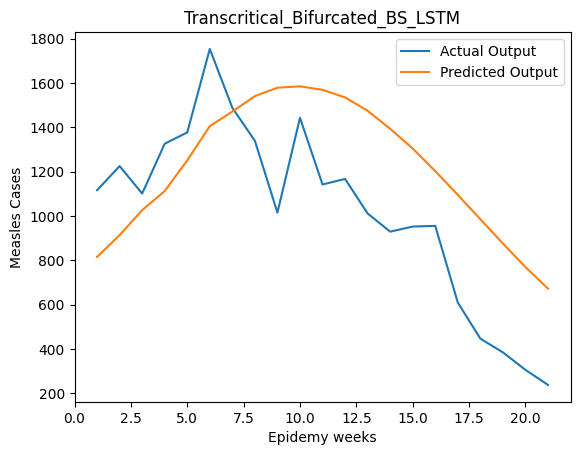

In [8]:
#Transcritical Bifurcated Bayesian Based Single Layered LSTM model with increased input series 1962
Training_inpt_normalize,Training_ouput_normalize = split_function( measles_epidemy_training, 8,3)
testing_inpt_normalize,testing_ouput_normalize = split_function( measles_epidemy_1962_testing,8 ,3)
val_input_normalize,val_ouput_normalize= split_function(  measles_epidemy_1958_to_1961_val, 8,1)
n_features = 1
Training_inpt_normalize = Training_inpt_normalize.reshape((Training_inpt_normalize.shape[0],Training_inpt_normalize.shape[1],n_features))
testing_inpt_normalize = testing_inpt_normalize.reshape(testing_inpt_normalize.shape[0],testing_inpt_normalize.shape[1],n_features)
val_input_normalize =val_input_normalize.reshape(val_input_normalize.shape[0],val_input_normalize.shape[1],n_features)
import matplotlib.pyplot as plt
from kerastuner.tuners import BayesianOptimization
from kerastuner import Objective
def Transcritical_bifurcation(x):
    return tf.keras.activations.sigmoid(2.5-x)
def create_model(hp):
    model = Sequential()
    model.add(LSTM(hp.Int('units',min_value=10,max_value=150,step=10), activation=Transcritical_bifurcation , input_shape=(Training_inpt_normalize.shape[1],n_features), dropout=hp.Choice('dropout',values=[0.1,0.3])))
    model.add(Dense(1))
    model.compile(optimizer= tf.keras.optimizers.Adam(hp.Choice('learning_rate',values=[1e-2,1e-4])), loss= 'mean_squared_error',metrics=['RootMeanSquaredError'],) 
    return model   
tuner = BayesianOptimization(create_model,objective= Objective("val_root_mean_squared_error", direction="min"), overwrite=True,
                                 max_trials=4, executions_per_trial=1, directory='logs',project_name='Bayesian Search')
tuner.search_space_summary()
tuner.search(Training_inpt_normalize,Training_ouput_normalize,epochs=500,validation_data=(val_input_normalize,val_ouput_normalize),verbose=1)
tuner.results_summary()
Bayesian_singleLayer_best_model = tuner.get_best_models()[0]
# Extract Predicted Vaalue for gradient Base LSTM for Longterm visuals

x_input = testing_inpt_normalize[0]
temp_input = list(x_input.ravel())

lst_output = []
i = 0
while i < 21:
    if len(temp_input) > 8:
        
        x_input = array(temp_input[1:])
        
        x_input = x_input.reshape((1,x_input.shape[0],n_features))
        yhat = Bayesian_singleLayer_best_model.predict(x_input, verbose=1)
        
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        lst_output.append(yhat[0][0])
        i += 1
    else:
        
        x_input = x_input.reshape((1,x_input.shape[0],n_features))
        yhat = Bayesian_singleLayer_best_model.predict(x_input, verbose=0)
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i += 1

test_data = np.array(testing_ouput_normalize[:21])
Actual_data = test_data * sd + mn
predict_data = np.array(lst_output) * sd + mn

print("Actual output: ", Actual_data)
print("Predicted output: ", predict_data)
epi_weeks= np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21],dtype=int)

plt.plot(epi_weeks,Actual_data, label='Actual Output')
plt.plot(epi_weeks,predict_data, label='Predicted Output')
plt.xlabel('Epidemy weeks')
plt.ylabel('Measles Cases')
plt.title("Transcritical_Bifurcated_BS_LSTM")
plt.legend()
plt.show()

In [9]:
print('evaluate for the first twenty weeeks:{}'.format(Bayesian_singleLayer_best_model.evaluate(testing_inpt_normalize[:21],testing_ouput_normalize[:21])))

1/1 [==============================] - 1s 1s/step - loss: 0.0366 - root_mean_squared_error: 0.1913
evaluate for the first twenty weeeks:[0.03660238906741142, 0.19131751358509064]


Trial 3 Complete [00h 06m 38s]
val_root_mean_squared_error: 0.2401696890592575

Best val_root_mean_squared_error So Far: 0.2233295440673828
Total elapsed time: 00h 26m 59s
INFO:tensorflow:Oracle triggered exit
Results summary
Results in logs\Bayesian Search
Showing 10 best trials
Trial summary
Hyperparameters:
units: 60
dropout: 0.1
learning_rate: 0.01
Score: 0.2233295440673828
Trial summary
Hyperparameters:
units: 130
dropout: 0.3
learning_rate: 0.01
Score: 0.2349265217781067
Trial summary
Hyperparameters:
units: 10
dropout: 0.1
learning_rate: 0.0001
Score: 0.2401696890592575
1/1 [==============================] - 0s 19ms/step
Actual output:  [ 727.  889. 1358. 1407. 1166. 1111. 2340. 1507. 1886. 2059. 1983. 2025.
 1849. 1571. 1545. 1244.  852.  465.  453.  234.  230.]
Predicted output:  [658.8837  685.66675 714.41876 730.6248  760.3994  819.1455  857.7377
 862.39343 881.2589  893.24335 898.4522  898.09705 886.50256 862.3051
 833.4346  802.16614 762.884   719.4589  672.58795 623.5474 

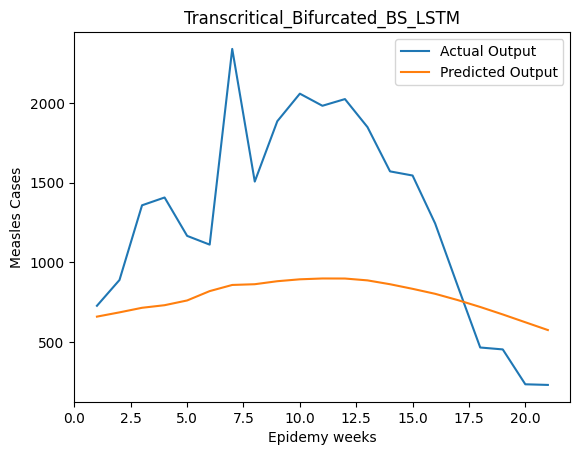

In [24]:
#Transcritical Bifurcated Bayesian Based Single Layered LSTM model with increased input series 1964
Training_inpt_normalize,Training_ouput_normalize = split_function( measles_epidemy_training, 8,3)
testing_inpt_normalize,testing_ouput_normalize = split_function( measles_epidemy_1964_testing,8 ,3)
val_input_normalize,val_ouput_normalize= split_function(  measles_epidemy_1958_to_1961_val, 8,1)
n_features = 1
Training_inpt_normalize = Training_inpt_normalize.reshape((Training_inpt_normalize.shape[0],Training_inpt_normalize.shape[1],n_features))
testing_inpt_normalize = testing_inpt_normalize.reshape(testing_inpt_normalize.shape[0],testing_inpt_normalize.shape[1],n_features)
val_input_normalize =val_input_normalize.reshape(val_input_normalize.shape[0],val_input_normalize.shape[1],n_features)
import matplotlib.pyplot as plt
from kerastuner.tuners import BayesianOptimization
from kerastuner import Objective
def Transcritical_bifurcation(x):
    return tf.keras.activations.sigmoid(2.0-x)
def create_model(hp):
    model = Sequential()
    model.add(LSTM(hp.Int('units',min_value=10,max_value=150,step=10), activation=Transcritical_bifurcation , input_shape=(Training_inpt_normalize.shape[1],n_features), dropout=hp.Choice('dropout',values=[0.1,0.3])))
    model.add(Dense(1))
    model.compile(optimizer= tf.keras.optimizers.Adam(hp.Choice('learning_rate',values=[1e-2,1e-4])), loss= 'mean_squared_error',metrics=['RootMeanSquaredError'],) 
    return model   
tuner = BayesianOptimization(create_model,objective= Objective("val_root_mean_squared_error", direction="min"), overwrite=True,
                                 max_trials=3, executions_per_trial=1, directory='logs',project_name='Bayesian Search')
tuner.search_space_summary()
tuner.search(Training_inpt_normalize,Training_ouput_normalize,epochs=1000,validation_data=(val_input_normalize,val_ouput_normalize),verbose=1)
tuner.results_summary()
Bayesian_singleLayer_best_model = tuner.get_best_models()[0]
# Extract Predicted Vaalue for gradient Base LSTM for Longterm visuals

x_input = testing_inpt_normalize[0]
temp_input = list(x_input.ravel())

lst_output = []
i = 0
while i < 21:
    if len(temp_input) > 8:
        
        x_input = array(temp_input[1:])
        
        x_input = x_input.reshape((1,x_input.shape[0],n_features))
        yhat = Bayesian_singleLayer_best_model.predict(x_input, verbose=1)
        
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        lst_output.append(yhat[0][0])
        i += 1
    else:
        
        x_input = x_input.reshape((1,x_input.shape[0],n_features))
        yhat = Bayesian_singleLayer_best_model.predict(x_input, verbose=0)
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i += 1

test_data = np.array(testing_ouput_normalize[:21])
Actual_data = test_data * sd + mn
predict_data = np.array(lst_output) * sd + mn

print("Actual output: ", Actual_data)
print("Predicted output: ", predict_data)
epi_weeks= np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21],dtype=int)

plt.plot(epi_weeks,Actual_data, label='Actual Output')
plt.plot(epi_weeks,predict_data, label='Predicted Output')
plt.xlabel('Epidemy weeks')
plt.ylabel('Measles Cases')
plt.title("Transcritical_Bifurcated_BS_LSTM")
plt.legend()
plt.show()

In [25]:
print('evaluate for the first twenty weeeks:{}'.format(Bayesian_singleLayer_best_model.evaluate(testing_inpt_normalize[:21],testing_ouput_normalize[:21])))

1/1 [==============================] - 0s 310ms/step - loss: 0.0999 - root_mean_squared_error: 0.3160
evaluate for the first twenty weeeks:[0.0998767763376236, 0.31603288650512695]


In [32]:
#Pitchfork Bifurcated Bayesian Based Single Layered LSTM model with increased input series 1962 data
Training_inpt_normalize,Training_ouput_normalize = split_function( measles_epidemy_training, 8,3)
testing_inpt_normalize,testing_ouput_normalize = split_function( measles_epidemy_1962_testing,8 ,3)
val_input_normalize,val_ouput_normalize= split_function(  measles_epidemy_1958_to_1961_val, 8,1)
n_features = 1
Training_inpt_normalize = Training_inpt_normalize.reshape((Training_inpt_normalize.shape[0],Training_inpt_normalize.shape[1],n_features))
testing_inpt_normalize = testing_inpt_normalize.reshape(testing_inpt_normalize.shape[0],testing_inpt_normalize.shape[1],n_features)
val_input_normalize =val_input_normalize.reshape(val_input_normalize.shape[0],val_input_normalize.shape[1],n_features)
import matplotlib.pyplot as plt
from kerastuner.tuners import BayesianOptimization
from kerastuner import Objective
def Pitchfork_bifurcation(x):
    return tf.math.pow(x,3) - 2.5*x
def create_model(hp):
    model = Sequential()
    model.add(LSTM(hp.Int('units',min_value=10,max_value=150,step=10), activation=Pitchfork_bifurcation, input_shape=(Training_inpt_normalize.shape[1],n_features), dropout=hp.Choice('dropout',values=[0.1,0.3])))
    model.add(Dense(1))
    model.compile(optimizer= tf.keras.optimizers.Adam(hp.Choice('learning_rate',values=[1e-2,1e-4])), loss= 'mean_squared_error',metrics=['RootMeanSquaredError'],) 
    return model   
tuner = BayesianOptimization(create_model,objective= Objective("val_root_mean_squared_error", direction="min"), overwrite=True,
                                 max_trials=3, executions_per_trial=1, directory='logs',project_name='Bayesian Search')
tuner.search_space_summary()
tuner.search(Training_inpt_normalize,Training_ouput_normalize,epochs=100,validation_data=(val_input_normalize,val_ouput_normalize),verbose=1)
tuner.results_summary()
Bayesian_singleLayer_best_model = tuner.get_best_models()[0]
# Extract Predicted Vaalue for gradient Base LSTM for Longterm visuals

x_input = testing_inpt_normalize[0]
temp_input = list(x_input.ravel())

lst_output = []
i = 0
while i < 21:
    if len(temp_input) > 8:
        
        x_input = array(temp_input[1:])
        
        x_input = x_input.reshape((1,x_input.shape[0],n_features))
        yhat = Bayesian_singleLayer_best_model.predict(x_input, verbose=1)
        
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        lst_output.append(yhat[0][0])
        i += 1
    else:
        
        x_input = x_input.reshape((1,x_input.shape[0],n_features))
        yhat = Bayesian_singleLayer_best_model.predict(x_input, verbose=0)
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i += 1

test_data = np.array(testing_ouput_normalize[:21])
Actual_data = test_data * sd + mn
predict_data = np.array(lst_output) * sd + mn

print("Actual output: ", Actual_data)
print("Predicted output: ", predict_data)
epi_weeks= np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21],dtype=int)

plt.plot(epi_weeks,Actual_data, label='Actual Output')
plt.plot(epi_weeks,predict_data, label='Predicted Output')
plt.xlabel('Epidemy weeks')
plt.ylabel('Measles Cases')
plt.title("Pitchfork_Bifurcated_BS_LSTM")
plt.legend()
plt.show()

Search space summary
Default search space size: 3
units (Int)
{'default': None, 'conditions': [], 'min_value': 10, 'max_value': 150, 'step': 10, 'sampling': None}
dropout (Choice)
{'default': 0.1, 'conditions': [], 'values': [0.1, 0.3], 'ordered': True}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.0001], 'ordered': True}

Search: Running Trial #1

Value             |Best Value So Far |Hyperparameter
60                |?                 |units
0.1               |?                 |dropout
0.0001            |?                 |learning_rate

Epoch 1/100
36/36 [==============================] - 3s 23ms/step - loss: nan - root_mean_squared_error: nan - val_loss: nan - val_root_mean_squared_error: nan
Epoch 2/100
36/36 [==============================] - 1s 14ms/step - loss: nan - root_mean_squared_error: nan - val_loss: nan - val_root_mean_squared_error: nan
Epoch 3/100
36/36 [==============================] - 1s 15ms/step - loss: nan - root_mean_squared_err

KeyboardInterrupt: 

In [24]:
print('evaluate for the first twenty weeeks:{}'.format(Bayesian_singleLayer_best_model.evaluate(testing_inpt_normalize[:21],testing_ouput_normalize[:21])))

1/1 [==============================] - 1s 547ms/step - loss: 0.0366 - root_mean_squared_error: 0.1914
evaluate for the first twenty weeeks:[0.03664378449320793, 0.19142566621303558]


In [47]:
#Pitchfork Bifurcated Bayesian Based Single Layered LSTM model with increased input series 1964 data
Training_inpt_normalize,Training_ouput_normalize = split_function( measles_epidemy_training, 8,3)
testing_inpt_normalize,testing_ouput_normalize = split_function( measles_epidemy_1964_testing,8 ,3)
val_input_normalize,val_ouput_normalize= split_function(  measles_epidemy_1958_to_1961_val, 8,1)
n_features = 1
Training_inpt_normalize = Training_inpt_normalize.reshape((Training_inpt_normalize.shape[0],Training_inpt_normalize.shape[1],n_features))
testing_inpt_normalize = testing_inpt_normalize.reshape(testing_inpt_normalize.shape[0],testing_inpt_normalize.shape[1],n_features)
val_input_normalize =val_input_normalize.reshape(val_input_normalize.shape[0],val_input_normalize.shape[1],n_features)
import matplotlib.pyplot as plt
from kerastuner.tuners import BayesianOptimization
from kerastuner import Objective
def Pitchfork_bifurcation(x):
    return tf.math.pow(x,3) - 2.5*x
def create_model(hp):
    model = Sequential()
    model.add(LSTM(hp.Int('units',min_value=10,max_value=150,step=10), activation=Pitchfork_bifurcation, input_shape=(Training_inpt_normalize.shape[1],n_features), dropout=hp.Choice('dropout',values=[0.1,0.3])))
    model.add(Dense(1))
    model.compile(optimizer= tf.keras.optimizers.Adam(hp.Choice('learning_rate',values=[1e-2,1e-4])), loss= 'mean_squared_error',metrics=['RootMeanSquaredError'],) 
    return model   
tuner = BayesianOptimization(create_model,objective= Objective("val_root_mean_squared_error", direction="min"), overwrite=True,
                                 max_trials=3, executions_per_trial=1, directory='logs',project_name='Bayesian Search')
tuner.search_space_summary()
tuner.search(Training_inpt_normalize,Training_ouput_normalize,epochs=400,validation_data=(val_input_normalize,val_ouput_normalize),verbose=1)
tuner.results_summary()
Bayesian_singleLayer_best_model = tuner.get_best_models()[0]
# Extract Predicted Vaalue for gradient Base LSTM for Longterm visuals

x_input = testing_inpt_normalize[0]
temp_input = list(x_input.ravel())

lst_output = []
i = 0
while i < 21:
    if len(temp_input) > 8:
        
        x_input = array(temp_input[1:])
        
        x_input = x_input.reshape((1,x_input.shape[0],n_features))
        yhat = Bayesian_singleLayer_best_model.predict(x_input, verbose=1)
        
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        lst_output.append(yhat[0][0])
        i += 1
    else:
        
        x_input = x_input.reshape((1,x_input.shape[0],n_features))
        yhat = Bayesian_singleLayer_best_model.predict(x_input, verbose=0)
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i += 1

test_data = np.array(testing_ouput_normalize[:21])
Actual_data = test_data * sd + mn
predict_data = np.array(lst_output) * sd + mn

print("Actual output: ", Actual_data)
print("Predicted output: ", predict_data)
epi_weeks= np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21],dtype=int)

plt.plot(epi_weeks,Actual_data, label='Actual Output')
plt.plot(epi_weeks,predict_data, label='Predicted Output')
plt.xlabel('Epidemy weeks')
plt.ylabel('Measles Cases')
plt.title("Pitchfork_Bifurcated_BS_LSTM")
plt.legend()
plt.show()

Search space summary
Default search space size: 3
units (Int)
{'default': None, 'conditions': [], 'min_value': 10, 'max_value': 150, 'step': 10, 'sampling': None}
dropout (Choice)
{'default': 0.1, 'conditions': [], 'values': [0.1, 0.3], 'ordered': True}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.0001], 'ordered': True}

Search: Running Trial #1

Value             |Best Value So Far |Hyperparameter
20                |?                 |units
0.3               |?                 |dropout
0.01              |?                 |learning_rate

Epoch 1/400
36/36 [==============================] - 4s 23ms/step - loss: nan - root_mean_squared_error: nan - val_loss: nan - val_root_mean_squared_error: nan
Epoch 2/400
36/36 [==============================] - 0s 14ms/step - loss: nan - root_mean_squared_error: nan - val_loss: nan - val_root_mean_squared_error: nan
Epoch 3/400
36/36 [==============================] - 1s 14ms/step - loss: nan - root_mean_squared_err

36/36 [==============================] - 0s 13ms/step - loss: nan - root_mean_squared_error: nan - val_loss: nan - val_root_mean_squared_error: nan
Epoch 49/400
36/36 [==============================] - 0s 14ms/step - loss: nan - root_mean_squared_error: nan - val_loss: nan - val_root_mean_squared_error: nan
Epoch 50/400
36/36 [==============================] - 0s 13ms/step - loss: nan - root_mean_squared_error: nan - val_loss: nan - val_root_mean_squared_error: nan
Epoch 51/400
36/36 [==============================] - 0s 13ms/step - loss: nan - root_mean_squared_error: nan - val_loss: nan - val_root_mean_squared_error: nan
Epoch 52/400
20/36 [===============>..............] - ETA: 0s - loss: nan - root_mean_squared_error: nan

KeyboardInterrupt: 

In [26]:
print('evaluate for the first twenty weeeks:{}'.format(Bayesian_singleLayer_best_model.evaluate(testing_inpt_normalize[:21],testing_ouput_normalize[:21])))

1/1 [==============================] - 1s 512ms/step - loss: 0.1187 - root_mean_squared_error: 0.3445
evaluate for the first twenty weeeks:[0.11865963041782379, 0.3444700837135315]


Trial 4 Complete [00h 11m 45s]
val_root_mean_squared_error: 0.23569989204406738

Best val_root_mean_squared_error So Far: 0.21704527735710144
Total elapsed time: 00h 36m 36s
INFO:tensorflow:Oracle triggered exit
Results summary
Results in logs\auto_kerastunning_singlelayer_200epchs
Showing 10 best trials
Trial summary
Hyperparameters:
units: 60
activation: relu
dropout: 0.1
learning_rate: 0.0001
Score: 0.21704527735710144
Trial summary
Hyperparameters:
units: 110
activation: relu
dropout: 0.1
learning_rate: 0.0001
Score: 0.2197822481393814
Trial summary
Hyperparameters:
units: 90
activation: relu
dropout: 0.1
learning_rate: 0.01
Score: 0.2217269241809845
Trial summary
Hyperparameters:
units: 140
activation: tanh
dropout: 0.3
learning_rate: 0.01
Score: 0.23569989204406738
[-0.518538032428581, -0.42428669144658754, -0.28389146477549315, -0.22498437666174723, -0.32610821125701106, -0.3477074768987179, -0.2063304654257277, -0.07190118]
1/1 [==============================] - 0s 33ms/step
[-

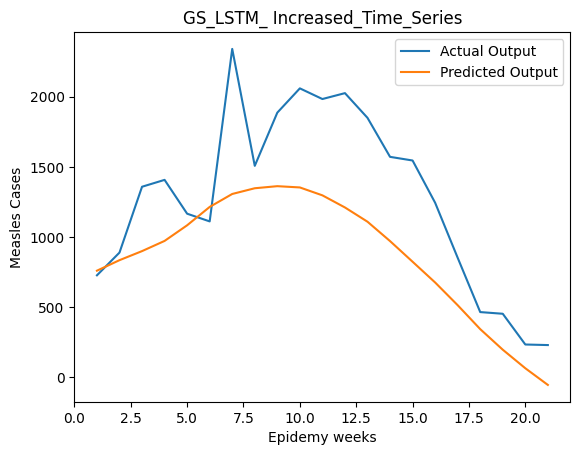

In [15]:
#Inncrease Input series time steps for GS_LSTM WITH 1964 DATA
import keras_tuner
Training_inpt_normalize,Training_ouput_normalize = split_function( measles_epidemy_training, 8,3)
testing_inpt_normalize,testing_ouput_normalize = split_function( measles_epidemy_1964_testing,8 ,3)
val_input_normalize,val_ouput_normalize= split_function(  measles_epidemy_1958_to_1961_val, 8,1)
n_features = 1
Training_inpt_normalize = Training_inpt_normalize.reshape((Training_inpt_normalize.shape[0],Training_inpt_normalize.shape[1],n_features))
testing_inpt_normalize = testing_inpt_normalize.reshape(testing_inpt_normalize.shape[0],testing_inpt_normalize.shape[1],n_features)
val_input_normalize =val_input_normalize.reshape(val_input_normalize.shape[0],val_input_normalize.shape[1],n_features)
def create_model(hp):
    model = Sequential()
    model.add(LSTM(hp.Int('units',min_value=10,max_value=150,step=10), activation= hp.Choice('activation',['relu','tanh']), input_shape=(Training_inpt_normalize.shape[1],n_features), dropout=hp.Choice('dropout',values=[0.1,0.3])))
    model.add(Dense(1))
    model.compile(optimizer= tf.keras.optimizers.Adam(hp.Choice('learning_rate',values=[1e-2,1e-4])), loss= 'mean_squared_error',metrics=['RootMeanSquaredError'],) 
    return model 
#Checking out the search space of the single layer
tuner = keras_tuner.RandomSearch(create_model,objective= keras_tuner.Objective("val_root_mean_squared_error", direction="min"), overwrite=True,
                                 max_trials=4, executions_per_trial=1, directory='logs',project_name='auto_kerastunning_singlelayer_200epchs')
tuner.search_space_summary()
#Seraching for best fit
tuner.search(Training_inpt_normalize,Training_ouput_normalize,epochs=1000,validation_data=(val_input_normalize,val_ouput_normalize))
#Seraching for best fit
measles_timeseries_model = tuner.get_best_models()[0]
# validation split at 600 epochs
tuner.results_summary()
# Extract Predicted Vaalue for gradient Base LSTM for Longterm visuals
import matplotlib.pyplot as plt
x_input = testing_inpt_normalize[0]
temp_input = list(x_input.ravel())

lst_output = []
i = 0
while i < 21:
    if len(temp_input) > 8:
        print(temp_input[1:])
        x_input = array(temp_input[1:])
        x_input= x_input = x_input.reshape((1,x_input.shape[0],n_features))
        yhat = measles_timeseries_model.predict(x_input, verbose=1)
        
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        lst_output.append(yhat[0][0])
        i += 1
    else:
        x_input= x_input = x_input.reshape((1,x_input.shape[0],n_features))
        yhat = measles_timeseries_model.predict(x_input, verbose=0)
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i += 1

test_data = np.array(testing_ouput_normalize[:21])
Actual_data = test_data * sd + mn
predict_data = np.array(lst_output) * sd + mn

print("Actual output: ", Actual_data)
print("Predicted output: ", predict_data)
epi_weeks= np.arange(1,22)

plt.plot(epi_weeks,Actual_data, label='Actual Output')
plt.plot(epi_weeks,predict_data, label='Predicted Output')
plt.xlabel('Epidemy weeks')
plt.ylabel('Measles Cases')
plt.title("GS_LSTM_ Increased_Time_Series")
plt.legend()
plt.show()

In [16]:
print('evaluate for the first twenty weeeks:{}'.format(measles_timeseries_model.evaluate(testing_inpt_normalize[:21],testing_ouput_normalize[:21])))

1/1 [==============================] - 1s 524ms/step - loss: 0.0878 - root_mean_squared_error: 0.2962
evaluate for the first twenty weeeks:[0.08775657415390015, 0.29623734951019287]


In [36]:
#Sadddle Bifurcated GS_LSTM 1964 data
Training_inpt_normalize,Training_ouput_normalize = split_function( measles_epidemy_training, 8,3)
testing_inpt_normalize,testing_ouput_normalize = split_function( measles_epidemy_1964_testing,8 ,3)
val_input_normalize,val_ouput_normalize= split_function(  measles_epidemy_1958_to_1961_val, 8,1)
n_features = 1
Training_inpt_normalize = Training_inpt_normalize.reshape((Training_inpt_normalize.shape[0],Training_inpt_normalize.shape[1],n_features))
testing_inpt_normalize = testing_inpt_normalize.reshape(testing_inpt_normalize.shape[0],testing_inpt_normalize.shape[1],n_features)
val_input_normalize =val_input_normalize.reshape(val_input_normalize.shape[0],val_input_normalize.shape[1],n_features)
import keras_tuner
def saddle_bifurcation(x):
    return tf.square(x)- 2.5

def create_model(hp):
    model = Sequential()
    model.add(LSTM(hp.Int('units',min_value=10,max_value=150,step=10), activation= saddle_bifurcation, input_shape=(Training_inpt_normalize.shape[1],n_features), dropout=hp.Choice('dropout',values=[0.1,0.3])))
    model.add(Dense(1))
    model.compile(optimizer= tf.keras.optimizers.Adam(hp.Choice('learning_rate',values=[1e-2,1e-4])), loss= 'mean_squared_error',metrics=['RootMeanSquaredError'],) 
    return model 
#Checking out the search space of the single layer
tuner = keras_tuner.RandomSearch(create_model,objective= keras_tuner.Objective("val_root_mean_squared_error", direction="min"), overwrite=True,
                                 max_trials=3, executions_per_trial=1, directory='logs',project_name='auto_kerastunning_singlelayer_200epchs')
tuner.search_space_summary()
#Seraching for best fit
tuner.search(Training_inpt_normalize,Training_ouput_normalize,epochs=400,validation_data=(val_input_normalize,val_ouput_normalize))
#Seraching for best fit
measles_timeseries_model = tuner.get_best_models()[0]
# validation split at 600 epochs
tuner.results_summary()
# Extract Predicted Vaalue for gradient Base LSTM for Longterm visuals
import matplotlib.pyplot as plt
x_input = testing_inpt_normalize[0]
temp_input = list(x_input.ravel())

lst_output = []
i = 0
while i < 21:
    if len(temp_input) > 8:
        print(temp_input[1:])
        x_input = array(temp_input[1:])
        x_input= x_input = x_input.reshape((1,x_input.shape[0],n_features))
        yhat = measles_timeseries_model.predict(x_input, verbose=1)
        
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        lst_output.append(yhat[0][0])
        i += 1
    else:
        x_input= x_input = x_input.reshape((1,x_input.shape[0],n_features))
        yhat = measles_timeseries_model.predict(x_input, verbose=0)
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i += 1

test_data = np.array(testing_ouput_normalize[:21])
Actual_data = test_data * sd + mn
predict_data = np.array(lst_output) * sd + mn

print("Actual output: ", Actual_data)
print("Predicted output: ", predict_data)
epi_weeks= np.arange(1,22)

plt.plot(epi_weeks,Actual_data, label='Actual Output')
plt.plot(epi_weeks,predict_data, label='Predicted Output')
plt.xlabel('Epidemy weeks')
plt.ylabel('Measles Cases')
plt.title("Saddle_Bifurcated_GS_LSTM")
plt.legend()
plt.show()

Search space summary
Default search space size: 3
units (Int)
{'default': None, 'conditions': [], 'min_value': 10, 'max_value': 150, 'step': 10, 'sampling': None}
dropout (Choice)
{'default': 0.1, 'conditions': [], 'values': [0.1, 0.3], 'ordered': True}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.0001], 'ordered': True}

Search: Running Trial #1

Value             |Best Value So Far |Hyperparameter
150               |?                 |units
0.3               |?                 |dropout
0.0001            |?                 |learning_rate

Epoch 1/400
36/36 [==============================] - 6s 65ms/step - loss: nan - root_mean_squared_error: nan - val_loss: nan - val_root_mean_squared_error: nan
Epoch 2/400
26/36 [====================>.........] - ETA: 0s - loss: nan - root_mean_squared_error: nan

KeyboardInterrupt: 

In [25]:
print('evaluate for the first twenty weeeks:{}'.format(measles_timeseries_model.evaluate(testing_inpt_normalize[:21],testing_ouput_normalize[:21])))

1/1 [==============================] - 1s 508ms/step - loss: 0.1001 - root_mean_squared_error: 0.3164
evaluate for the first twenty weeeks:[0.1001296415925026, 0.3164326846599579]


In [53]:
#Transcritical Bifurcated GS_LSTM 1964 data
import keras_tuner
def Transcritical_bifurcation(x):
    return tf.keras.activations.sigmoid(0.5-x)

Training_inpt_normalize,Training_ouput_normalize = split_function( measles_epidemy_training, 8,3)
testing_inpt_normalize,testing_ouput_normalize = split_function( measles_epidemy_1964_testing,8 ,3)
val_input_normalize,val_ouput_normalize= split_function(  measles_epidemy_1958_to_1961_val, 8,1)
n_features = 1
Training_inpt_normalize = Training_inpt_normalize.reshape((Training_inpt_normalize.shape[0],Training_inpt_normalize.shape[1],n_features))
testing_inpt_normalize = testing_inpt_normalize.reshape(testing_inpt_normalize.shape[0],testing_inpt_normalize.shape[1],n_features)
val_input_normalize =val_input_normalize.reshape(val_input_normalize.shape[0],val_input_normalize.shape[1],n_features)
def create_model(hp):
    model = Sequential()
    model.add(LSTM(hp.Int('units',min_value=10,max_value=150,step=10), activation= Transcritical_bifurcation, input_shape=(Training_inpt_normalize.shape[1],n_features), dropout=hp.Choice('dropout',values=[0.1,0.3])))
    model.add(Dense(1))
    model.compile(optimizer= tf.keras.optimizers.Adam(hp.Choice('learning_rate',values=[1e-2,1e-4])), loss= 'mean_squared_error',metrics=['RootMeanSquaredError'],) 
    return model 
#Checking out the search space of the single layer
tuner = keras_tuner.RandomSearch(create_model,objective= keras_tuner.Objective("val_root_mean_squared_error", direction="min"), overwrite=True,
                                 max_trials=3, executions_per_trial=1, directory='logs',project_name='auto_kerastunning_singlelayer_200epchs')
tuner.search_space_summary()
#Seraching for best fit
tuner.search(Training_inpt_normalize,Training_ouput_normalize,epochs=700,validation_data=(val_input_normalize,val_ouput_normalize))
#Seraching for best fit
measles_timeseries_model = tuner.get_best_models()[0]
# validation split at 600 epochs
tuner.results_summary()
# Extract Predicted Vaalue for gradient Base LSTM for Longterm visuals
import matplotlib.pyplot as plt
x_input = testing_inpt_normalize[0]
temp_input = list(x_input.ravel())

lst_output = []
i = 0
while i < 21:
    if len(temp_input) > 8:
        print(temp_input[1:])
        x_input = array(temp_input[1:])
        x_input= x_input = x_input.reshape((1,x_input.shape[0],n_features))
        yhat = measles_timeseries_model.predict(x_input, verbose=1)
        
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        lst_output.append(yhat[0][0])
        i += 1
    else:
        x_input= x_input = x_input.reshape((1,x_input.shape[0],n_features))
        yhat = measles_timeseries_model.predict(x_input, verbose=0)
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i += 1

test_data = np.array(testing_ouput_normalize[:21])
Actual_data = test_data * sd + mn
predict_data = np.array(lst_output) * sd + mn

print("Actual output: ", Actual_data)
print("Predicted output: ", predict_data)
epi_weeks= np.arange(1,22)

plt.plot(epi_weeks,Actual_data, label='Actual Output')
plt.plot(epi_weeks,predict_data, label='Predicted Output')
plt.xlabel('Epidemy weeks')
plt.ylabel('Measles Cases')
plt.title("Trans-Critical_Bifurcated_GS_LSTM")
plt.legend()
plt.show()

Trial 1 Complete [00h 07m 07s]
val_root_mean_squared_error: 0.22038814425468445

Best val_root_mean_squared_error So Far: 0.22038814425468445
Total elapsed time: 00h 07m 07s

Search: Running Trial #2

Value             |Best Value So Far |Hyperparameter
90                |40                |units
0.3               |0.1               |dropout
0.01              |0.01              |learning_rate

Epoch 1/700
36/36 [==============================] - 5s 56ms/step - loss: 0.5720 - root_mean_squared_error: 0.7563 - val_loss: 0.0977 - val_root_mean_squared_error: 0.3126
Epoch 2/700
36/36 [==============================] - 1s 32ms/step - loss: 0.3557 - root_mean_squared_error: 0.5964 - val_loss: 0.1230 - val_root_mean_squared_error: 0.3507
Epoch 3/700
36/36 [==============================] - 2s 52ms/step - loss: 0.3269 - root_mean_squared_error: 0.5718 - val_loss: 0.0808 - val_root_mean_squared_error: 0.2842
Epoch 4/700
36/36 [==============================] - 1s 39ms/step - loss: 0.3065 - root

36/36 [==============================] - 1s 25ms/step - loss: 0.2353 - root_mean_squared_error: 0.4851 - val_loss: 0.0629 - val_root_mean_squared_error: 0.2509
Epoch 47/700
36/36 [==============================] - 1s 25ms/step - loss: 0.2191 - root_mean_squared_error: 0.4681 - val_loss: 0.0671 - val_root_mean_squared_error: 0.2591
Epoch 48/700
36/36 [==============================] - 1s 31ms/step - loss: 0.2011 - root_mean_squared_error: 0.4484 - val_loss: 0.0627 - val_root_mean_squared_error: 0.2505
Epoch 49/700
36/36 [==============================] - 1s 25ms/step - loss: 0.2270 - root_mean_squared_error: 0.4765 - val_loss: 0.0611 - val_root_mean_squared_error: 0.2472
Epoch 50/700
36/36 [==============================] - 1s 26ms/step - loss: 0.2214 - root_mean_squared_error: 0.4705 - val_loss: 0.0663 - val_root_mean_squared_error: 0.2574
Epoch 51/700
36/36 [==============================] - 1s 32ms/step - loss: 0.2404 - root_mean_squared_error: 0.4903 - val_loss: 0.0727 - val_root_me

36/36 [==============================] - 1s 28ms/step - loss: 0.1979 - root_mean_squared_error: 0.4448 - val_loss: 0.0762 - val_root_mean_squared_error: 0.2760
Epoch 94/700
36/36 [==============================] - 1s 25ms/step - loss: 0.1900 - root_mean_squared_error: 0.4359 - val_loss: 0.1109 - val_root_mean_squared_error: 0.3330
Epoch 95/700
36/36 [==============================] - 1s 27ms/step - loss: 0.1759 - root_mean_squared_error: 0.4194 - val_loss: 0.1277 - val_root_mean_squared_error: 0.3573
Epoch 96/700
36/36 [==============================] - 1s 24ms/step - loss: 0.1860 - root_mean_squared_error: 0.4312 - val_loss: 0.1281 - val_root_mean_squared_error: 0.3580
Epoch 97/700
36/36 [==============================] - 1s 26ms/step - loss: 0.1984 - root_mean_squared_error: 0.4455 - val_loss: 0.1349 - val_root_mean_squared_error: 0.3673
Epoch 98/700
36/36 [==============================] - 1s 25ms/step - loss: 0.1799 - root_mean_squared_error: 0.4242 - val_loss: 0.0992 - val_root_me

36/36 [==============================] - 1s 24ms/step - loss: 0.1691 - root_mean_squared_error: 0.4113 - val_loss: 0.0970 - val_root_mean_squared_error: 0.3114
Epoch 141/700
36/36 [==============================] - 1s 27ms/step - loss: 0.1682 - root_mean_squared_error: 0.4102 - val_loss: 0.1143 - val_root_mean_squared_error: 0.3381
Epoch 142/700
36/36 [==============================] - 1s 24ms/step - loss: 0.1430 - root_mean_squared_error: 0.3781 - val_loss: 0.1390 - val_root_mean_squared_error: 0.3729
Epoch 143/700
36/36 [==============================] - 1s 26ms/step - loss: 0.1735 - root_mean_squared_error: 0.4166 - val_loss: 0.1146 - val_root_mean_squared_error: 0.3386
Epoch 144/700
36/36 [==============================] - 1s 26ms/step - loss: 0.1630 - root_mean_squared_error: 0.4037 - val_loss: 0.1159 - val_root_mean_squared_error: 0.3405
Epoch 145/700
36/36 [==============================] - 1s 29ms/step - loss: 0.1557 - root_mean_squared_error: 0.3945 - val_loss: 0.1300 - val_ro

36/36 [==============================] - 1s 23ms/step - loss: 0.1517 - root_mean_squared_error: 0.3895 - val_loss: 0.1194 - val_root_mean_squared_error: 0.3455
Epoch 188/700
36/36 [==============================] - 1s 23ms/step - loss: 0.1759 - root_mean_squared_error: 0.4194 - val_loss: 0.1180 - val_root_mean_squared_error: 0.3436
Epoch 189/700
36/36 [==============================] - 1s 27ms/step - loss: 0.1299 - root_mean_squared_error: 0.3605 - val_loss: 0.1103 - val_root_mean_squared_error: 0.3321
Epoch 190/700
36/36 [==============================] - 1s 26ms/step - loss: 0.1307 - root_mean_squared_error: 0.3615 - val_loss: 0.1147 - val_root_mean_squared_error: 0.3386
Epoch 191/700
36/36 [==============================] - 1s 23ms/step - loss: 0.1429 - root_mean_squared_error: 0.3781 - val_loss: 0.1046 - val_root_mean_squared_error: 0.3234
Epoch 192/700
36/36 [==============================] - 1s 23ms/step - loss: 0.1358 - root_mean_squared_error: 0.3686 - val_loss: 0.1073 - val_ro

36/36 [==============================] - 1s 23ms/step - loss: 0.1464 - root_mean_squared_error: 0.3827 - val_loss: 0.1213 - val_root_mean_squared_error: 0.3483
Epoch 235/700
36/36 [==============================] - 1s 23ms/step - loss: 0.1470 - root_mean_squared_error: 0.3834 - val_loss: 0.1208 - val_root_mean_squared_error: 0.3475
Epoch 236/700
36/36 [==============================] - 1s 23ms/step - loss: 0.1365 - root_mean_squared_error: 0.3694 - val_loss: 0.1245 - val_root_mean_squared_error: 0.3528
Epoch 237/700
36/36 [==============================] - 1s 23ms/step - loss: 0.1391 - root_mean_squared_error: 0.3730 - val_loss: 0.1074 - val_root_mean_squared_error: 0.3277
Epoch 238/700
36/36 [==============================] - 1s 23ms/step - loss: 0.1485 - root_mean_squared_error: 0.3854 - val_loss: 0.0951 - val_root_mean_squared_error: 0.3084
Epoch 239/700
36/36 [==============================] - 1s 23ms/step - loss: 0.1683 - root_mean_squared_error: 0.4103 - val_loss: 0.0991 - val_ro

36/36 [==============================] - 1s 25ms/step - loss: 0.1123 - root_mean_squared_error: 0.3351 - val_loss: 0.1096 - val_root_mean_squared_error: 0.3311
Epoch 282/700
36/36 [==============================] - 1s 24ms/step - loss: 0.1460 - root_mean_squared_error: 0.3821 - val_loss: 0.1144 - val_root_mean_squared_error: 0.3383
Epoch 283/700
36/36 [==============================] - 1s 23ms/step - loss: 0.1436 - root_mean_squared_error: 0.3789 - val_loss: 0.1198 - val_root_mean_squared_error: 0.3461
Epoch 284/700
36/36 [==============================] - 1s 30ms/step - loss: 0.1226 - root_mean_squared_error: 0.3501 - val_loss: 0.0937 - val_root_mean_squared_error: 0.3061
Epoch 285/700
36/36 [==============================] - 1s 23ms/step - loss: 0.1380 - root_mean_squared_error: 0.3715 - val_loss: 0.1009 - val_root_mean_squared_error: 0.3176
Epoch 286/700
36/36 [==============================] - 1s 27ms/step - loss: 0.1111 - root_mean_squared_error: 0.3333 - val_loss: 0.1240 - val_ro

36/36 [==============================] - 1s 31ms/step - loss: 0.1234 - root_mean_squared_error: 0.3513 - val_loss: 0.0958 - val_root_mean_squared_error: 0.3096
Epoch 329/700
36/36 [==============================] - 1s 34ms/step - loss: 0.1243 - root_mean_squared_error: 0.3526 - val_loss: 0.0972 - val_root_mean_squared_error: 0.3118
Epoch 330/700
36/36 [==============================] - 1s 31ms/step - loss: 0.1408 - root_mean_squared_error: 0.3752 - val_loss: 0.1071 - val_root_mean_squared_error: 0.3273
Epoch 331/700
36/36 [==============================] - 1s 33ms/step - loss: 0.1284 - root_mean_squared_error: 0.3583 - val_loss: 0.1084 - val_root_mean_squared_error: 0.3292
Epoch 332/700
36/36 [==============================] - 1s 30ms/step - loss: 0.1254 - root_mean_squared_error: 0.3541 - val_loss: 0.1076 - val_root_mean_squared_error: 0.3280
Epoch 333/700
36/36 [==============================] - 1s 31ms/step - loss: 0.1340 - root_mean_squared_error: 0.3660 - val_loss: 0.1079 - val_ro

36/36 [==============================] - 1s 25ms/step - loss: 0.0948 - root_mean_squared_error: 0.3079 - val_loss: 0.1215 - val_root_mean_squared_error: 0.3486
Epoch 376/700
36/36 [==============================] - 1s 23ms/step - loss: 0.1166 - root_mean_squared_error: 0.3415 - val_loss: 0.1064 - val_root_mean_squared_error: 0.3262
Epoch 377/700
36/36 [==============================] - 1s 23ms/step - loss: 0.0988 - root_mean_squared_error: 0.3143 - val_loss: 0.1280 - val_root_mean_squared_error: 0.3577
Epoch 378/700
36/36 [==============================] - 1s 23ms/step - loss: 0.1103 - root_mean_squared_error: 0.3322 - val_loss: 0.1096 - val_root_mean_squared_error: 0.3310
Epoch 379/700
36/36 [==============================] - 1s 23ms/step - loss: 0.1151 - root_mean_squared_error: 0.3392 - val_loss: 0.1156 - val_root_mean_squared_error: 0.3400
Epoch 380/700
36/36 [==============================] - 1s 27ms/step - loss: 0.1042 - root_mean_squared_error: 0.3228 - val_loss: 0.1107 - val_ro

36/36 [==============================] - 1s 32ms/step - loss: 0.0983 - root_mean_squared_error: 0.3136 - val_loss: 0.0974 - val_root_mean_squared_error: 0.3121
Epoch 423/700
36/36 [==============================] - 1s 35ms/step - loss: 0.1013 - root_mean_squared_error: 0.3183 - val_loss: 0.1272 - val_root_mean_squared_error: 0.3567
Epoch 424/700
36/36 [==============================] - 2s 42ms/step - loss: 0.0991 - root_mean_squared_error: 0.3148 - val_loss: 0.1155 - val_root_mean_squared_error: 0.3398
Epoch 425/700
36/36 [==============================] - 1s 41ms/step - loss: 0.1342 - root_mean_squared_error: 0.3663 - val_loss: 0.1024 - val_root_mean_squared_error: 0.3200
Epoch 426/700
36/36 [==============================] - 1s 40ms/step - loss: 0.1085 - root_mean_squared_error: 0.3294 - val_loss: 0.1236 - val_root_mean_squared_error: 0.3515
Epoch 427/700
36/36 [==============================] - 1s 34ms/step - loss: 0.0985 - root_mean_squared_error: 0.3138 - val_loss: 0.0952 - val_ro

KeyboardInterrupt: 

In [51]:
print('evaluate for the first twenty weeeks:{}'.format(measles_timeseries_model.evaluate(testing_inpt_normalize[:21],testing_ouput_normalize[:21])))

1/1 [==============================] - 1s 1s/step - loss: 0.1077 - root_mean_squared_error: 0.3281
evaluate for the first twenty weeeks:[0.10767993330955505, 0.32814621925354004]


Trial 3 Complete [00h 14m 22s]
val_root_mean_squared_error: nan

Best val_root_mean_squared_error So Far: 0.7484567761421204
Total elapsed time: 00h 22m 28s
INFO:tensorflow:Oracle triggered exit
Results summary
Results in logs\auto_kerastunning_singlelayer_200epchs
Showing 10 best trials
Trial summary
Hyperparameters:
units: 20
dropout: 0.1
learning_rate: 0.0001
Score: 0.7484567761421204
Trial summary
Hyperparameters:
units: 20
dropout: 0.3
learning_rate: 0.01
Score: nan
Trial summary
Hyperparameters:
units: 130
dropout: 0.1
learning_rate: 0.0001
Score: nan
[-0.518538032428581, -0.42428669144658754, -0.28389146477549315, -0.22498437666174723, -0.32610821125701106, -0.3477074768987179, -0.2063304654257277, 0.25778806]
1/1 [==============================] - 0s 25ms/step
[-0.42428669144658754, -0.28389146477549315, -0.22498437666174723, -0.32610821125701106, -0.3477074768987179, -0.2063304654257277, 0.25778806, 0.20791201]
1/1 [==============================] - 0s 28ms/step
[-0.2838914647

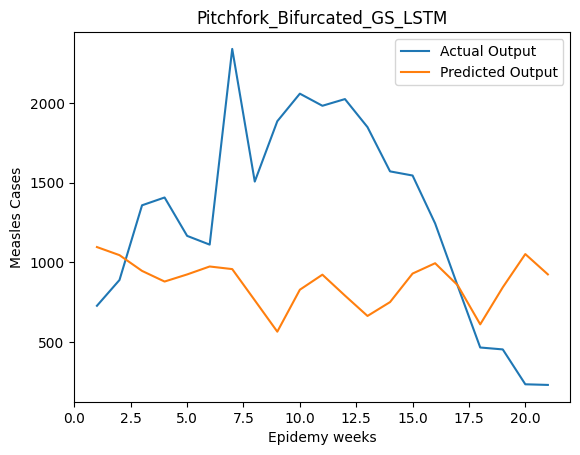

In [86]:
#Pitchfork Bifurcation GS_LSTM 1964 data
import keras_tuner
Training_inpt_normalize,Training_ouput_normalize = split_function( measles_epidemy_training, 8,3)
testing_inpt_normalize,testing_ouput_normalize = split_function( measles_epidemy_1964_testing,8 ,3)
val_input_normalize,val_ouput_normalize= split_function(  measles_epidemy_1958_to_1961_val, 8,1)
n_features = 1
Training_inpt_normalize = Training_inpt_normalize.reshape((Training_inpt_normalize.shape[0],Training_inpt_normalize.shape[1],n_features))
testing_inpt_normalize = testing_inpt_normalize.reshape(testing_inpt_normalize.shape[0],testing_inpt_normalize.shape[1],n_features)
val_input_normalize =val_input_normalize.reshape(val_input_normalize.shape[0],val_input_normalize.shape[1],n_features)
def Pitchfork_bifurcation(x):
    return tf.math.pow(x,3) - 2.5*x
def create_model(hp):
    model = Sequential()
    model.add(LSTM(hp.Int('units',min_value=10,max_value=150,step=10), activation= Pitchfork_bifurcation, input_shape=(Training_inpt_normalize.shape[1],n_features), dropout=hp.Choice('dropout',values=[0.1,0.3])))
    model.add(Dense(1))
    model.compile(optimizer= tf.keras.optimizers.Adam(hp.Choice('learning_rate',values=[1e-2,1e-4])), loss= 'mean_squared_error',metrics=['RootMeanSquaredError'],) 
    return model 
#Checking out the search space of the single layer
tuner = keras_tuner.RandomSearch(create_model,objective= keras_tuner.Objective("val_root_mean_squared_error", direction="min"), overwrite=True,
                                 max_trials=3, executions_per_trial=1, directory='logs',project_name='auto_kerastunning_singlelayer_200epchs')
tuner.search_space_summary()
#Seraching for best fit
tuner.search(Training_inpt_normalize,Training_ouput_normalize,epochs=600,validation_data=(val_input_normalize,val_ouput_normalize))
#Seraching for best fit
measles_timeseries_model = tuner.get_best_models()[0]
# validation split at 600 epochs
tuner.results_summary()
# Extract Predicted Vaalue for gradient Base LSTM for Longterm visuals
import matplotlib.pyplot as plt
x_input = testing_inpt_normalize[0]
temp_input = list(x_input.ravel())

lst_output = []
i = 0
while i < 21:
    if len(temp_input) > 8:
        print(temp_input[1:])
        x_input = array(temp_input[1:])
        x_input= x_input = x_input.reshape((1,x_input.shape[0],n_features))
        yhat = measles_timeseries_model.predict(x_input, verbose=1)
        
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        lst_output.append(yhat[0][0])
        i += 1
    else:
        x_input= x_input = x_input.reshape((1,x_input.shape[0],n_features))
        yhat = measles_timeseries_model.predict(x_input, verbose=0)
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i += 1

test_data = np.array(testing_ouput_normalize[:21])
Actual_data = test_data * sd + mn
predict_data = np.array(lst_output) * sd + mn

print("Actual output: ", Actual_data)
print("Predicted output: ", predict_data)
epi_weeks= np.arange(1,22)

plt.plot(epi_weeks,Actual_data, label='Actual Output')
plt.plot(epi_weeks,predict_data, label='Predicted Output')
plt.xlabel('Epidemy weeks')
plt.ylabel('Measles Cases')
plt.title("Pitchfork_Bifurcated_GS_LSTM")
plt.legend()
plt.show()

In [87]:
print('evaluate for the first twenty weeeks:{}'.format(measles_timeseries_model.evaluate(testing_inpt_normalize[:21],testing_ouput_normalize[:21])))

1/1 [==============================] - 1s 599ms/step - loss: 0.8697 - root_mean_squared_error: 0.9326
evaluate for the first twenty weeeks:[0.8696945905685425, 0.9325741529464722]
